In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from datetime import datetime
import xarray as xr
import netCDF4 as nc
import pandas as pd
import glob
import math
import subprocess
from matplotlib import colormaps

from matplotlib.colors import ListedColormap
import plotly.graph_objs as go

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import mplcursors  

from metpy.plots import SkewT
from metpy.units import units
from metpy.calc import dewpoint_from_relative_humidity

import numpy as np
from scipy.integrate import trapezoid


/home/b/b382718/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/numba/__init__.py:149: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.4)
  import scipy


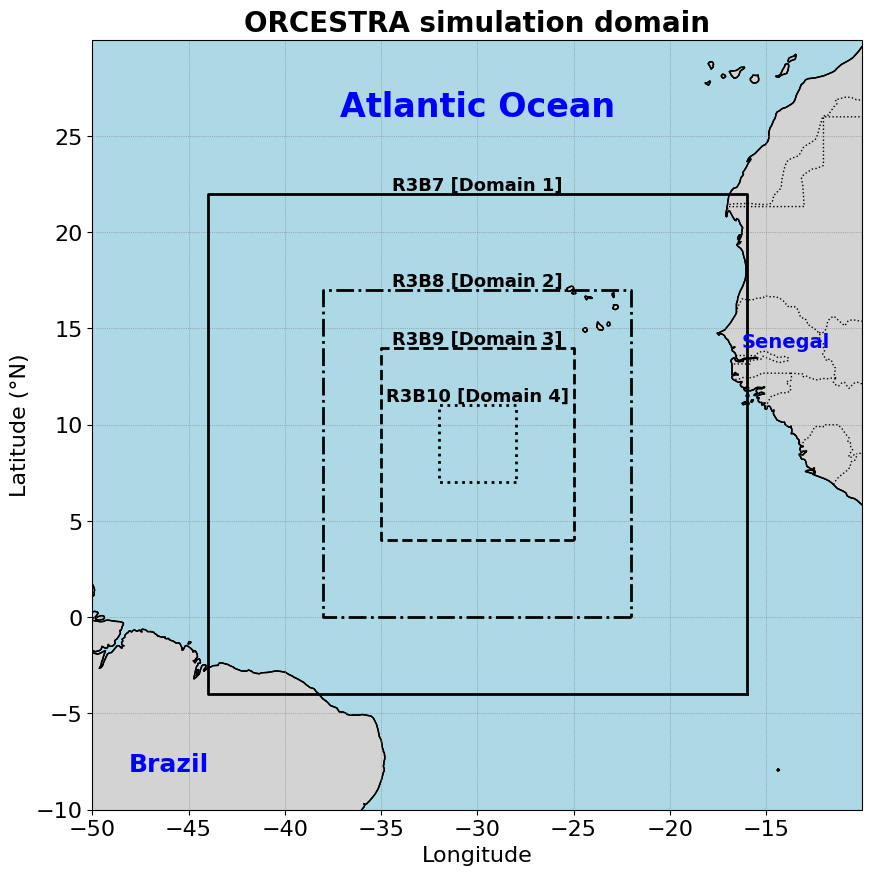

In [43]:
## ORCESTRA 3 Sept 2024 domain

lon1 = [-16., -44.];
lat1 = [-4., 22.];

lon2 = [-22., -38.];
lat2 = [-0., 17.];
#lat2 = [-0.85, 17.];

lon3 = [-25., -35.];
lat3 = [4, 14.];

lon4 = [-28., -32.];
lat4 = [7., 11.];


fig, ax = plt.subplots(figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and features for context
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')


ax.plot([lon1[0], lon1[1], lon1[1], lon1[0], lon1[0]], 
        [lat1[0], lat1[0], lat1[1], lat1[1], lat1[0]], 
        color='black', linewidth=2, linestyle='-', transform=ccrs.PlateCarree())

ax.plot([lon2[0], lon2[1], lon2[1], lon2[0], lon2[0]], 
        [lat2[0], lat2[0], lat2[1], lat2[1], lat2[0]], 
        color='black', linewidth=2, linestyle='-.', transform=ccrs.PlateCarree())

ax.plot([lon3[0], lon3[1], lon3[1], lon3[0], lon3[0]], 
        [lat3[0], lat3[0], lat3[1], lat3[1], lat3[0]], 
        color='black', linewidth=2, linestyle='--', transform=ccrs.PlateCarree())

ax.plot([lon4[0], lon4[1], lon4[1], lon4[0], lon4[0]], 
        [lat4[0], lat4[0], lat4[1], lat4[1], lat4[0]], 
        color='black', linewidth=2, linestyle=':', transform=ccrs.PlateCarree())

ax.text(-30., 22.2, "R3B7 [Domain 1]", transform=ccrs.PlateCarree(), fontsize=13, ha='center', color='k', fontweight='bold')
ax.text(-30., 17.2, "R3B8 [Domain 2]", transform=ccrs.PlateCarree(), fontsize=13, ha='center', color='k', fontweight='bold')
ax.text(-30., 14.2, "R3B9 [Domain 3]", transform=ccrs.PlateCarree(), fontsize=13, ha='center', color='k', fontweight='bold')
ax.text(-30., 11.2, "R3B10 [Domain 4]", transform=ccrs.PlateCarree(), fontsize=13, ha='center', color='k', fontweight='bold')

ax.set_xlim(-50., -10.)
ax.set_ylim(-10., 30.)
ax.set_xticks(range(-50, -10, 5))  
ax.set_yticks(range(-10, 30, 5))
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude (°N)", fontsize=16)
ax.grid(True, linestyle=':', linewidth=0.5, color='grey')
ax.set_title('ORCESTRA simulation domain', fontsize=20, fontweight='bold')

# Add oceans and continents features
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.text(-30, 26, "Atlantic Ocean", transform=ccrs.PlateCarree(), fontsize=24, fontweight='bold', ha='center', color='blue')
ax.text(-14, 14, "Senegal", transform=ccrs.PlateCarree(), fontsize=14, fontweight='bold', ha='center', color='blue')
ax.text(-46, -8, "Brazil", transform=ccrs.PlateCarree(), fontsize=18, fontweight='bold', ha='center', color='blue')

plt.show()

In [ ]:

ds_4sip = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/latent_heat/control/orcestra_2mom_sip/NWP_*.nc');
ds_nosip = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/latent_heat/nosip/orcestra_2mom_nosip/NWP_*.nc');
ds_norf = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/latent_heat/norf/orcestra_2mom_norf/NWP_*.nc');
ds_nohm = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/latent_heat/nohm/orcestra_2mom_nohm/NWP_*.nc');
ds_nobr = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/latent_heat/nobr/orcestra_2mom_nobr/NWP_*.nc');
ds_nosb = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/latent_heat/nosb/orcestra_2mom_nosb/NWP_*.nc');


In [5]:

ds_nosip_effrad['w_vel'] = -1.*ds_nosip_effrad.omega/(9.8*ds_nosip_effrad.rho)
ds_nosip_effrad['tempc'] = ds_nosip_effrad.temp-273.16;
ds_nosip_effrad['lwc_gperm3']  = ds_nosip_effrad.qc*ds_nosip_effrad.rho*1.e3 # kgperm3 to gperm3
ds_nosip_effrad['ciwc_gperm3'] = ds_nosip_effrad.qi*ds_nosip_effrad.rho*1.e3 # kgperm3 to gperm3
ds_nosip_effrad['tqi'] = ds_nosip_effrad.qi+ds_nosip_effrad.qs+ds_nosip_effrad.qg+ds_nosip_effrad.qh
ds_nosip_effrad['tq'] = ds_nosip_effrad.qc+ds_nosip_effrad.qi+ds_nosip_effrad.qs+ds_nosip_effrad.qg+ds_nosip_effrad.qh
ds_nosip_effrad['tiwc_gperm3'] = (ds_nosip_effrad.qi+ds_nosip_effrad.qs+ds_nosip_effrad.qg+ds_nosip_effrad.qh)*ds_nosip_effrad.rho*1.e3 # kgperm3 to gperm3
ds_nosip_effrad['cdnc_percm3'] = ds_nosip_effrad.qnc*ds_nosip_effrad.rho*1.e-6  # perkg to percm3
ds_nosip_effrad['inc_perl'] = (ds_nosip_effrad.qni+ds_nosip_effrad.qns+ds_nosip_effrad.qng+ds_nosip_effrad.qnh)*ds_nosip_effrad.rho*1.e-3 # perkg to perl

ds_sip_effrad['w_vel'] = -1.*ds_sip_effrad.omega/(9.8*ds_sip_effrad.rho)
ds_sip_effrad['tempc'] = ds_sip_effrad.temp-273.16;
ds_sip_effrad['lwc_gperm3']  = ds_sip_effrad.qc*ds_sip_effrad.rho*1.e3 # kgperm3 to gperm3
ds_sip_effrad['ciwc_gperm3'] = ds_sip_effrad.qi*ds_sip_effrad.rho*1.e3 # kgperm3 to gperm3
ds_sip_effrad['tqi'] = ds_sip_effrad.qi+ds_sip_effrad.qs+ds_sip_effrad.qg+ds_sip_effrad.qh
ds_sip_effrad['tq'] = ds_sip_effrad.qc+ds_sip_effrad.qi+ds_sip_effrad.qs+ds_sip_effrad.qg+ds_sip_effrad.qh
ds_sip_effrad['tiwc_gperm3'] = (ds_sip_effrad.qi+ds_sip_effrad.qs+ds_sip_effrad.qg+ds_sip_effrad.qh)*ds_sip_effrad.rho*1.e3 # kgperm3 to gperm3
ds_sip_effrad['cdnc_percm3'] = ds_sip_effrad.qnc*ds_sip_effrad.rho*1.e-6  # perkg to percm3
ds_sip_effrad['inc_perl'] = (ds_sip_effrad.qni+ds_sip_effrad.qns+ds_sip_effrad.qng+ds_sip_effrad.qnh)*ds_sip_effrad.rho*1.e-3 # perkg to perl


In [3]:

ds_nosip['w_vel'] = -1.*ds_nosip.omega/(9.8*ds_nosip.rho)
ds_nosip['tempc'] = ds_nosip.temp-273.16;
ds_nosip['lwc_gperm3']  = ds_nosip.qc*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tqi'] = ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
ds_nosip['tq'] = ds_nosip.qc+ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
ds_nosip['ciwc_gperm3'] = ds_nosip.qi*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tiwc_gperm3'] = (ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh)*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['cdnc_percm3'] = ds_nosip.qnc*ds_nosip.rho*1.e-6  # perkg to percm3
ds_nosip['inc_perl'] = (ds_nosip.qni+ds_nosip.qns+ds_nosip.qng+ds_nosip.qnh)*ds_nosip.rho*1.e-3 # perkg to perl

ds_4sip['w_vel'] = -1.*ds_4sip.omega/(9.8*ds_4sip.rho)
ds_4sip['tempc'] = ds_4sip.temp-273.16;
ds_4sip['lwc_gperm3']  = ds_4sip.qc*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tqi'] = ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['tq'] = ds_4sip.qc+ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['ciwc_gperm3'] = ds_4sip.qi*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tiwc_gperm3'] = (ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh)*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['cdnc_percm3'] = ds_4sip.qnc*ds_4sip.rho*1.e-6  # perkg to percm3
ds_4sip['inc_perl'] = (ds_4sip.qni+ds_4sip.qns+ds_4sip.qng+ds_4sip.qnh)*ds_4sip.rho*1.e-3 # perkg to perl

ds_norf['w_vel'] = -1.*ds_norf.omega/(9.8*ds_norf.rho)
ds_norf['tempc'] = ds_norf.temp-273.16;
ds_norf['lwc_gperm3']  = ds_norf.qc*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['tqi'] = ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh
ds_norf['tq'] = ds_norf.qc+ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh
ds_norf['ciwc_gperm3'] = ds_norf.qi*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['tiwc_gperm3'] = (ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh)*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['cdnc_percm3'] = ds_norf.qnc*ds_norf.rho*1.e-6  # perkg to percm3
ds_norf['inc_perl'] = (ds_norf.qni+ds_norf.qns+ds_norf.qng+ds_norf.qnh)*ds_norf.rho*1.e-3 # perkg to perl

ds_nohm['w_vel'] = -1.*ds_nohm.omega/(9.8*ds_nohm.rho)
ds_nohm['tempc'] = ds_nohm.temp-273.16;
ds_nohm['lwc_gperm3']  = ds_nohm.qc*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['tqi'] = ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh
ds_nohm['tq'] = ds_nohm.qc+ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh
ds_nohm['ciwc_gperm3'] = ds_nohm.qi*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['tiwc_gperm3'] = (ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh)*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['cdnc_percm3'] = ds_nohm.qnc*ds_nohm.rho*1.e-6  # perkg to percm3
ds_nohm['inc_perl'] = (ds_nohm.qni+ds_nohm.qns+ds_nohm.qng+ds_nohm.qnh)*ds_nohm.rho*1.e-3 # perkg to perl

ds_nobr['w_vel'] = -1.*ds_nobr.omega/(9.8*ds_nobr.rho)
ds_nobr['tempc'] = ds_nobr.temp-273.16;
ds_nobr['lwc_gperm3']  = ds_nobr.qc*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['tqi'] = ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh
ds_nobr['tq'] = ds_nobr.qc+ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh
ds_nobr['ciwc_gperm3'] = ds_nobr.qi*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['tiwc_gperm3'] = (ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh)*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['cdnc_percm3'] = ds_nobr.qnc*ds_nobr.rho*1.e-6  # perkg to percm3
ds_nobr['inc_perl'] = (ds_nobr.qni+ds_nobr.qns+ds_nobr.qng+ds_nobr.qnh)*ds_nobr.rho*1.e-3 # perkg to perl

ds_nosb['w_vel'] = -1.*ds_nosb.omega/(9.8*ds_nosb.rho)
ds_nosb['tempc'] = ds_nosb.temp-273.16;
ds_nosb['lwc_gperm3']  = ds_nosb.qc*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['tqi'] = ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh
ds_nosb['tq'] = ds_nosb.qc+ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh
ds_nosb['ciwc_gperm3'] = ds_nosb.qi*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['tiwc_gperm3'] = (ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh)*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['cdnc_percm3'] = ds_nosb.qnc*ds_nosb.rho*1.e-6  # perkg to percm3
ds_nosb['inc_perl'] = (ds_nosb.qni+ds_nosb.qns+ds_nosb.qng+ds_nosb.qnh)*ds_nosb.rho*1.e-3 # perkg to perl

In [4]:

grid_orc = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/latent_heat/control/orcestra_2mom_sip/domain4_DOM04.nc');


clon_deg = np.degrees(grid_orc.clon)
clat_deg = np.degrees(grid_orc.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([-30., 9.])
#print(okla_x), print(okla_y)
dx_deg = 2.; dy_deg = 2.0
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)

-32.03759442634206
-27.96236307373933
6.967468001138239
11.031985309167817
-32.0
-28.0
11.0
7.0


(None, None)

In [5]:

window_cell = (
    (grid_orc.clat >= np.deg2rad(bottom_bound))
    & (grid_orc.clat <= np.deg2rad(top_bound))
    & (grid_orc.clon >= np.deg2rad(left_bound))
    & (grid_orc.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)


# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_orc.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_orc.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)

vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}


def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid



window_vertex_indices :: [    4     7    15 ... 37370 37371 37372]
window_edge_indices :: [    63     64     65 ... 111329 111330 111331]


In [6]:

new_grid_orc = reindex_grid(grid_orc, selected_indices, vars_to_renumber)
mask=np.isin(ds_4sip['ncells'], selected_indices.cell)

ds_nosip_new = ds_nosip.sel(ncells=mask)
ds_4sip_new = ds_4sip.sel(ncells=mask)
ds_norf_new = ds_norf.sel(ncells=mask)
ds_nohm_new = ds_nohm.sel(ncells=mask)
ds_nobr_new = ds_nobr.sel(ncells=mask)
ds_nosb_new = ds_nosb.sel(ncells=mask)


In [7]:

def calc_dewpoint(tempc, rh):
    dewpoint = tempc - ((100. - rh)/5.)
    return dewpoint


def calc_tdew(t, rh):        # Magnus-Tetens approximation
    a = 17.27; b = 237.7;
    alpha = (a*t/(b+t)) + np.log(rh/100)
    td = b*alpha/(a-alpha)
    return td
    
def calc_vir_temp(tc, q):
    #virt_tempk_wk = t/(1. - (ev/p)*(1-0.622))
    temp = tc + (1-0.622*q)
    return temp
    
def calculate_lcl(pressure, temperature, dewpoint):
    l = np.argmin(np.abs(temperature - dewpoint))
    return pressure[l], temperature[l]

def calc_lcl(t, td):
    lcl = td + 125.*(t-td)
    return lcl
    
def e_sat_hpa(tc):
    e_sat_pa = 6.112*np.exp((17.67*tc)/(tc+243.5))
    return e_sat_pa

def calc_parcel_temp(pres, ht, q_sat, tk_lcl):
    grav = 9.8  # acceleration due to gravity [m/s^2]
    eps = 0.622  # ratio of the gas constants for water vapor and dry air
    Rd = 287.  # specific gas constant for dry air [J/(kg*K)]
    cp = 1005.  # specific heat capacity at constant pressure for dry air [J/(kg*K)]
    lv = 2.5e6  # latent heat of vaporization [J/kg]
    Rv = 461.  # specific gas constant for water vapor [J/(kg*K)]

    tk_parcel = np.zeros(len(ht))  
    del_t_par = np.zeros(len(ht))  

    tk_parcel[0] = tk_lcl + 273.15 
    
    for i in range(1, len(ht)):
        dht = ht[i] - ht[i - 1]  
        qs = q_sat[i]  
        term_a = 1. + lv * qs / (Rd * tk_parcel[i - 1])
        term_b = (lv ** 2.) * eps * qs
        term_c = Rd * (tk_parcel[i - 1]) ** 2.
        
        del_t_par[i] = grav * term_a / (cp + (term_b / term_c))

        tk_parcel[i] = tk_parcel[i - 1] - del_t_par[i] * dht
        
    tempc = tk_parcel - 273.15
    return tempc

import numpy as np



def calc_cape(pres, t_env, t_par, tv_env, tv_par):
    """
    Calculate Convective Available Potential Energy (CAPE).
    
    Parameters:
        pres (array): Pressure levels (hPa or Pa).
        t_env (array): Environmental temperature (°C).
        t_par (array): Parcel temperature (°C).
        tv_env (array): Environmental virtual temperature (°C).
        tv_par (array): Parcel virtual temperature (°C).
    
    Returns:
        cape (float): CAPE value (J/kg).
    """
    Rd = 287.0  # gas constant for dry air (J/kg/K)
    
    # Convert temperatures to Kelvin
    tk_env = t_env + 273.15
    tk_v_env = tv_env + 273.15
    tk_par = t_par + 273.15
    tk_v_par = tv_par + 273.15
    
    cape = 0.0
    
    # Loop through pressure levels
    for i in range(1, len(pres)):
        # Check if parcel is warmer than the environment
        if tk_v_par[i] > tk_v_env[i]:
            # Calculate logarithmic pressure difference
            dlnp = np.log(pres[i-1] / pres[i])
            cape = cape + Rd * (tk_v_par[i] - tk_v_env[i]) * dlnp
    return cape
        

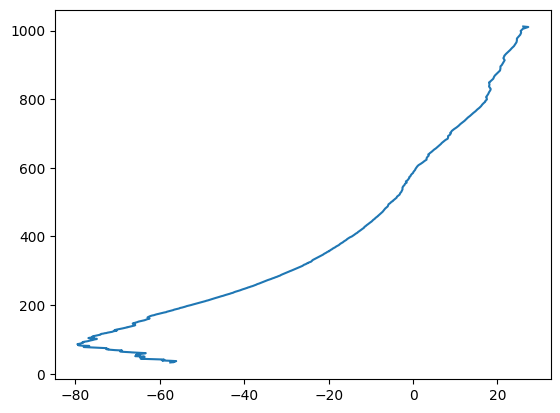

In [20]:
file_path = '/work/bk1415/b382718/output/orcestra/observations/wyoming_sonde/sonde_orcestra_20240903_1200UTC'
column_names = ['pres', 'height', 'temp', 'Tdew', 'relhum', 'qv', 'w_dir', 'w_wind', 'theta', 'theta_e', 'theta_v']


# Specify invalid values (strings or other markers for missing data)
invalid_values = ['-----------------------------------------------------------------------------', '9999.0', '999.0']

# Read the data and replace invalid values with NaN
ds_sonde = pd.read_csv(file_path, sep='\s+', skiprows=6, names=column_names, na_values=invalid_values)

# drop rows with NaN values if needed
ds_sonde.dropna(inplace=True)


temp_sonde = ds_sonde.temp.values
pres_sonde = ds_sonde.pres.values
tdew_sonde = ds_sonde.Tdew.values
rh_sonde = ds_sonde.relhum.values
qv_sonde = ds_sonde.qv.values
w_sonde = ds_sonde.w_wind.values
ht_sonde = ds_sonde.height.values

plt.plot(temp_sonde, pres_sonde)

In [12]:
ds_4sip.time[24]

<xarray.DataArray 'time' ()>
array('2024-09-03T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2024-09-03T12:00:00
Attributes:
    standard_name:  time
    axis:           T

Tenv    ::  [ 25.472301   25.102497   24.697054   24.264956   23.847887   23.441639
  23.044283   22.65701    22.262733   21.851585   21.42618    20.985214
  20.5164     20.013956   19.469633   18.894772   18.294472   17.667616
  17.003273   16.33308    15.616732   14.869071   14.097094   13.298925
  12.463171   11.583893   10.66444     9.718272    8.737001    7.729309
   6.6857643   5.6324406   4.5390754   3.3691444   2.157193    0.9753825
  -0.1675019  -1.4445887  -2.7727835  -4.1448     -5.607413   -7.155437
  -8.803791  -10.689388  -12.701304  -14.897587  -17.16448   -19.48239
 -21.997797  -24.785824  -27.889805  -31.305443  -34.981346  -38.979004
 -43.344913  -48.040936  -53.05474   -58.342712  -63.43048   -67.92141
 -72.30739   -76.134026  -78.61002   -70.58618   -63.699135 ]
Tparcel ::  [ 2.34416389e+01  2.33515918e+01  2.32197732e+01  2.30573637e+01
  2.28685845e+01  2.26558342e+01  2.24206675e+01  2.21641810e+01
  2.18870746e+01  2.15897641e+01  2.12725122e+01  2.09354437e+01


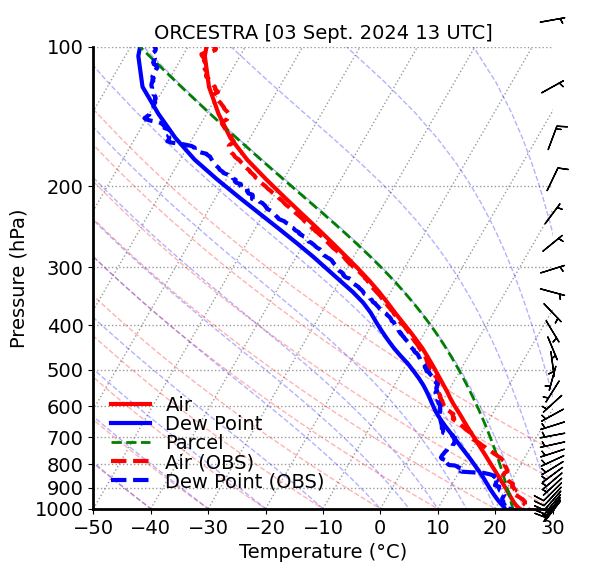

In [22]:

ds_skewt = ds_4sip.sel(time=ds_4sip.time[24])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

   
temp_dew = calc_dewpoint(tempc, rel_hum)
#temp_dew = calc_tdew(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

#----- Calculate parcel properties
e_sat = e_sat_hpa(avg_tempc)
q_sat = 0.622*e_sat/(avg_pres-e_sat)

lcl_pressure, lcl_temp = calculate_lcl(avg_pres, avg_tempc, avg_dewtempc)
#lcl_temp = calc_lcl(avg_tempc[0], avg_dewtempc)
parcel_temp = calc_parcel_temp(avg_pres, avg_ht, 1.5*q_sat, lcl_temp)
Tv_env = calc_vir_temp(avg_tempc, avg_qv)
Tv_parcel = calc_vir_temp(parcel_temp, 1.5*q_sat)
parcel_cape = calc_cape(avg_pres, avg_tempc, parcel_temp, Tv_env, Tv_parcel)
print('Tenv    :: ', avg_tempc)
print('Tparcel :: ', parcel_temp)
print('LCL :: ', lcl_temp)
print('CAPE :: ',parcel_cape)
#------

# Create the Skew-T plot
fontsize=14;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(8, 6))
skew = SkewT(fig)

# Plot temperature and dew point on the Skew-T
skew.plot(avg_pres, avg_tempc, 'r-', label='Air', linewidth=lnwdth)
#skew.plot(avg_pres, calc_dewpoint(avg_tempc, avg_rh), 'b-.', label='Dew Point', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point', linewidth=lnwdth)
skew.plot(avg_pres, parcel_temp, 'g--', label='Parcel', linewidth=lnwdth-1)

skew.plot(pres_sonde* units.hPa, temp_sonde* units.degC, 'r--', label='Air (OBS)', linewidth=lnwdth)
skew.plot(pres_sonde* units.hPa, tdew_sonde* units.degC, 'b--', label='Dew Point (OBS)', linewidth=lnwdth)

# Add wind barbs 
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = avg_u  # Zonal wind component
    v_wind = avg_v  # Meridional wind component
    skew.plot_barbs(avg_pres[::2], u_wind[::2], v_wind[::2], length=6, color='black', pivot='middle')

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-50, 30)
ax.set_ylim(1000., 100)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.title('ORCESTRA [03 Sept. 2024 13 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()

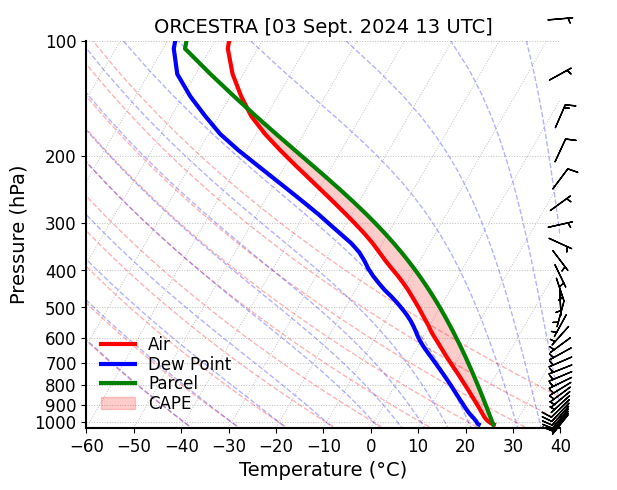

In [87]:
ds_skewt = ds_4sip.sel(time=ds_4sip.time[26])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

   
temp_dew = calc_dewpoint(tempc, rel_hum)
#temp_dew = calc_tdew(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

# Create the Skew-T plot
fontsize=14;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(8, 5))
skew = SkewT(fig)

skew.plot(avg_pres, avg_tempc, 'r-', label='Air', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point', linewidth=lnwdth)

skew.plot_dry_adiabats(linewidth=1, alpha=alpha, linestyle='--')
skew.plot_moist_adiabats(linewidth=1, alpha=alpha, linestyle='--')

moist_adiabats = skew.moist_adiabats

# Now, we'll plot parcel path (that follows moist adiabatic line between LFC and LNB)
# We basically skip calculation of parcel temperature and CAPE and make use of the SKEWT plot itself

adiabat_profiles = []
for path in moist_adiabats.get_paths():
    temp_pres = path.vertices
    # We now interpolate temp_pres on available pressure levels
    adiabat_temp = np.interp(avg_pres, 
                           temp_pres[:,1][::-1],  # Pressure values
                           temp_pres[:,0][::-1])  # Temperature values
    adiabat_profiles.append(adiabat_temp)

# Find intersections between environmental temp and moist adiabats (these intersection points are LFC and LNB)
crossing_points = []
for i in range(len(avg_pres)-1):
    for j, adiabat in enumerate(adiabat_profiles):
        if ((avg_tempc[i] > adiabat[i] and avg_tempc[i+1] <= adiabat[i+1]) or 
            (avg_tempc[i] < adiabat[i] and avg_tempc[i+1] >= adiabat[i+1])):
            crossing_points.append((i, j))

# Process crossing points to find LFC and LNB
if len(crossing_points) >= 2:
    # Sort by pressure (descending)
    crossing_points.sort(key=lambda x: avg_pres[x[0]], reverse=True)
    
    lfc_idx, lfc_adiabat_idx = crossing_points[0]
    lnb_idx, lnb_adiabat_idx = crossing_points[-1]
    
    # Create parcel temperature line
    parcel_temp = np.full_like(avg_tempc, np.nan)
    parcel_temp[lfc_idx:lnb_idx+1] = adiabat_profiles[lfc_adiabat_idx][lfc_idx:lnb_idx+1]
    
    # Plot parcel path
    skew.plot(avg_pres, parcel_temp, 'g-', linewidth=lnwdth, label='Parcel')
    
    # Shade CAPE area
    skew.ax.fill_betweenx(avg_pres[lfc_idx:lnb_idx+1],
                        avg_tempc[lfc_idx:lnb_idx+1],
                        parcel_temp[lfc_idx:lnb_idx+1],
                        where=parcel_temp[lfc_idx:lnb_idx+1] > avg_tempc[lfc_idx:lnb_idx+1],
                        color='red', alpha=0.2, label='CAPE')

    # Mark LFC and LNB
    skew.plot(avg_pres[lfc_idx], avg_tempc[lfc_idx], 'k', markersize=10, markeredgewidth=2)#, label='LFC')
    skew.plot(avg_pres[lnb_idx], avg_tempc[lnb_idx], 'k', markersize=10, markeredgewidth=2)#, label='LNB')
    
    # Add text labels
    #plt.text(avg_tempc[lfc_idx]-2, avg_pres[lfc_idx]-10, 'LFC', 
    #        fontsize=fontsize-2, ha='right', va='top')
    #plt.text(avg_tempc[lnb_idx]+2, avg_pres[lnb_idx]+10, 'LNB', 
    #        fontsize=fontsize-2, ha='left', va='bottom')

# Add wind barbs if available
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = avg_u  # Zonal wind component
    v_wind = avg_v  # Meridional wind component
    skew.plot_barbs(avg_pres[::2], u_wind[::2], v_wind[::2], length=6, color='black', pivot='middle')

# Configure plot appearance
ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-60, 40)
ax.set_ylim(avg_pres[0]+20, 100)
ax.tick_params(axis='both', labelsize=fontsize-2)

plt.title('ORCESTRA [03 Sept. 2024 13 UTC]', fontsize=fontsize)#, pad=20)

plt.legend(frameon=False, handlelength=2, labelspacing=0.1, fontsize=fontsize-2, loc='lower left')#, bbox_to_anchor=(0.7, 0.95))

plt.grid(True, linestyle=':', linewidth=0.7, color='grey', alpha=0.5)

# Clean up borders
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


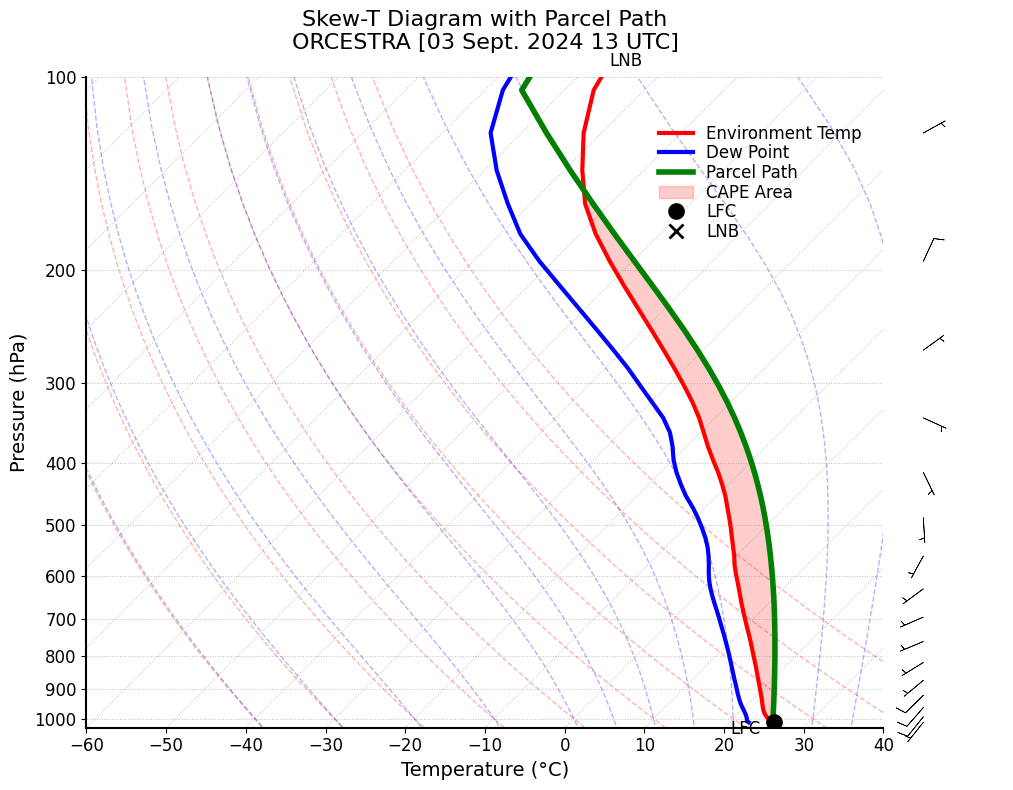

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT

# Assuming you've already calculated these arrays from your dataset:
# avg_pres, avg_tempc, avg_dewtempc, etc.

# Create the Skew-T plot
fontsize = 14
lnwdth = 3
alpha = 0.3

fig = plt.figure(figsize=(10, 8))
skew = SkewT(fig, rotation=45)

# Plot environmental temperature and dew point
skew.plot(avg_pres, avg_tempc, 'r-', label='Environment Temp', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point', linewidth=lnwdth)

# Add adiabats (must plot them first to access later)
skew.plot_dry_adiabats(linewidth=1, alpha=alpha, linestyle='--')
skew.plot_moist_adiabats(linewidth=1, alpha=alpha, linestyle='--')

# Get moist adiabats from the plot
moist_adiabats = skew.moist_adiabats

# Extract temperature values from adiabat paths
adiabat_profiles = []
for path in moist_adiabats.get_paths():
    temp_pres = path.vertices
    # Interpolate to our pressure levels (pressure is y-axis)
    adiabat_temp = np.interp(avg_pres, 
                           temp_pres[:,1][::-1],  # Pressure values
                           temp_pres[:,0][::-1])  # Temperature values
    adiabat_profiles.append(adiabat_temp)

# Find intersections between environmental temp and moist adiabats
crossing_points = []
for i in range(len(avg_pres)-1):
    for j, adiabat in enumerate(adiabat_profiles):
        if ((avg_tempc[i] > adiabat[i] and avg_tempc[i+1] <= adiabat[i+1]) or 
            (avg_tempc[i] < adiabat[i] and avg_tempc[i+1] >= adiabat[i+1])):
            crossing_points.append((i, j))

# Process crossing points to find LFC and LNB
if len(crossing_points) >= 2:
    # Sort by pressure (descending)
    crossing_points.sort(key=lambda x: avg_pres[x[0]], reverse=True)
    
    lfc_idx, lfc_adiabat_idx = crossing_points[0]
    lnb_idx, lnb_adiabat_idx = crossing_points[-1]
    
    # Create parcel temperature line
    parcel_temp = np.full_like(avg_tempc, np.nan)
    parcel_temp[lfc_idx:lnb_idx+1] = adiabat_profiles[lfc_adiabat_idx][lfc_idx:lnb_idx+1]
    
    # Plot parcel path
    skew.plot(avg_pres, parcel_temp, 'g-', linewidth=lnwdth+1, label='Parcel Path')
    
    # Shade CAPE area
    skew.ax.fill_betweenx(avg_pres[lfc_idx:lnb_idx+1],
                        avg_tempc[lfc_idx:lnb_idx+1],
                        parcel_temp[lfc_idx:lnb_idx+1],
                        where=parcel_temp[lfc_idx:lnb_idx+1] > avg_tempc[lfc_idx:lnb_idx+1],
                        color='red', alpha=0.2, label='CAPE Area')
    
    # Mark LFC and LNB
    skew.plot(avg_pres[lfc_idx], avg_tempc[lfc_idx], 'ko', 
             markersize=10, markeredgewidth=2, label='LFC')
    skew.plot(avg_pres[lnb_idx], avg_tempc[lnb_idx], 'kx', 
             markersize=10, markeredgewidth=2, label='LNB')
    
    # Add text labels
    plt.text(avg_tempc[lfc_idx]-2, avg_pres[lfc_idx]-10, 'LFC', 
            fontsize=fontsize-2, ha='right', va='top')
    plt.text(avg_tempc[lnb_idx]+2, avg_pres[lnb_idx]+10, 'LNB', 
            fontsize=fontsize-2, ha='left', va='bottom')

# Add wind barbs if available
if 'avg_u' in locals() and 'avg_v' in locals():
    n = max(1, len(avg_pres)//15)  # Plot every nth level
    skew.plot_barbs(avg_pres[::n], avg_u[::n], avg_v[::n], 
                   xloc=1.05, length=6, linewidth=0.5)

# Configure plot appearance
ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-60, 40)
ax.set_ylim(avg_pres[0]+20, 100)
ax.tick_params(axis='both', labelsize=fontsize-2)

plt.title('Skew-T Diagram with Parcel Path\nORCESTRA [03 Sept. 2024 13 UTC]', 
         fontsize=fontsize+2, pad=20)

plt.legend(frameon=False, handlelength=2, labelspacing=0.1, 
          fontsize=fontsize-2, loc='upper left', bbox_to_anchor=(0.7, 0.95))

plt.grid(True, linestyle=':', linewidth=0.7, color='grey', alpha=0.5)

# Clean up borders
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


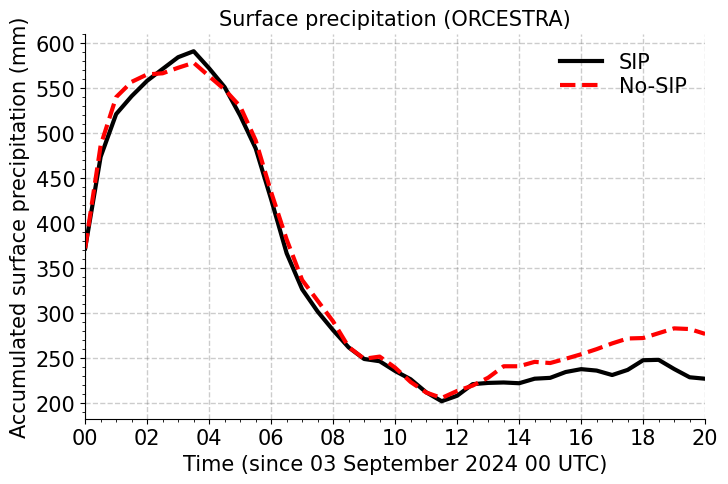

In [21]:

filt_cape = xr.where(ds_nosip_effrad_new.cape_ml > 0., ds_nosip_effrad_new.cape_ml, np.nan)
cape_nosip = filt_cape.mean('ncells')

filt_cape = xr.where(ds_sip_effrad_new.cape_ml > 0., ds_sip_effrad_new.cape_ml, np.nan)
cape_sip = filt_cape.mean('ncells')

fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 5))

plt.plot(ds_sip_new.time, cape_sip, "k-", label="SIP", linewidth = lnwdth)
plt.plot(ds_nosip_new.time, cape_nosip, "r--", label="No-SIP", linewidth = lnwdth)

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.4)
plt.minorticks_on()
plt.xlabel('Time (since 03 September 2024 00 UTC)', fontsize=fontsize)
plt.ylabel('Accumulated surface precipitation (mm)', fontsize=fontsize)
start_date = datetime(2024, 9, 3, 0, 0)
end_date = datetime(2024, 9, 3, 20, 0)
plt.xlim(start_date, end_date)
#plt.ylim(0, 50)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Surface precipitation (ORCESTRA)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='upper right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [100]:

mean_ht_nosip = ds_nosip.z_mc.mean(dim=('time','ncells'))
mean_tempc_nosip = ds_nosip.tempc.mean(dim=('time','ncells'))

mean_ht_4sip = ds_4sip.z_mc.mean(dim=('time','ncells'))
mean_tempc_4sip = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_ht_norf = ds_norf.z_mc.mean(dim=('time','ncells'))
mean_tempc_norf = ds_norf.tempc.mean(dim=('time','ncells'))

mean_ht_nohm = ds_nohm.z_mc.mean(dim=('time','ncells'))
mean_tempc_nohm = ds_nohm.tempc.mean(dim=('time','ncells'))

mean_ht_nobr = ds_nobr.z_mc.mean(dim=('time','ncells'))
mean_tempc_nobr = ds_nobr.tempc.mean(dim=('time','ncells'))

#mean_ht_nosb = ds_nosb.z_mc.mean(dim=('time','ncells'))
#mean_tempc_nosb = ds_nosb.tempc.mean(dim=('time','ncells'))

# Latent heating rate with No SIP
filt_lhr = xr.where((ds_nosip.tq > 1.e-6) & (ds_nosip.w_vel > w_thres), ds_nosip.d_lhr, np.nan)
lhr_kpers_nosip = (1./1800.) * np.gradient(ds_nosip.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nosip = lhr_kpers_nosip * 86400.
mean_lhr_kperd_nosip = np.mean(lhr_kperd_nosip, axis=(0,2))

# Latent heating rate with 4-SIP
filt_lhr = xr.where((ds_4sip.tq > 1.e-6) & (ds_4sip.w_vel > w_thres), ds_4sip.d_lhr, np.nan)
lhr_kpers_4sip = (1./1800.) * np.gradient(ds_4sip.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip = lhr_kpers_4sip * 86400.
mean_lhr_kperd_4sip = np.mean(lhr_kperd_4sip, axis=(0,2))

# Latent heating rate with No Raindrop Shattering (RF)
filt_lhr = xr.where((ds_norf.tq > 1.e-6) & (ds_norf.w_vel > w_thres), ds_norf.d_lhr, np.nan)
lhr_kpers_norf = (1./1800.) * np.gradient(ds_norf.d_lhr, axis=0) # w.r.t. time
lhr_kperd_norf = lhr_kpers_norf * 86400.
mean_lhr_kperd_norf = np.mean(lhr_kperd_norf, axis=(0,2))

# Latent heating rate with No Hallett-Mossop (HM)
filt_lhr = xr.where((ds_nohm.tq > 1.e-6) & (ds_nohm.w_vel > w_thres), ds_nohm.d_lhr, np.nan)
lhr_kpers_nohm = (1./1800.) * np.gradient(ds_nohm.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nohm = lhr_kpers_nohm * 86400.
mean_lhr_kperd_nohm = np.mean(lhr_kperd_nohm, axis=(0,2))

# Latent heating rate with No ice-ice collision breakup (BR)
filt_lhr = xr.where((ds_nobr.tq > 1.e-6) & (ds_nobr.w_vel > w_thres), ds_nobr.d_lhr, np.nan)
lhr_kpers_nobr = (1./1800.) * np.gradient(ds_nobr.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nobr = lhr_kpers_nobr * 86400.
mean_lhr_kperd_nobr = np.mean(lhr_kperd_nobr, axis=(0,2))
#
## Latent heating rate with No Sublimation (SB)
#filt_lhr = xr.where((ds_nosb.tq > 1.e-6) & (ds_nosb.w_vel > w_thres), ds_nosb.d_lhr, np.nan)
#lhr_kpers_nosb = (1./1800.) * np.gradient(ds_nosb.d_lhr, axis=0) # w.r.t. time
#lhr_kperd_nosb = lhr_kpers_nosb * 86400.
#mean_lhr_kperd_nosb = np.mean(lhr_kperd_nosb, axis=(0,2))


# Change in lhr w.r.t. control
del_lhr_kperd_nosip = mean_lhr_kperd_4sip-mean_lhr_kperd_nosip
del_lhr_kperd_norf = mean_lhr_kperd_4sip-mean_lhr_kperd_norf
del_lhr_kperd_nohm = mean_lhr_kperd_4sip-mean_lhr_kperd_nohm
del_lhr_kperd_nobr = mean_lhr_kperd_4sip-mean_lhr_kperd_nobr
#del_lhr_kperd_nosb = mean_lhr_kperd_4sip-mean_lhr_kperd_nosb


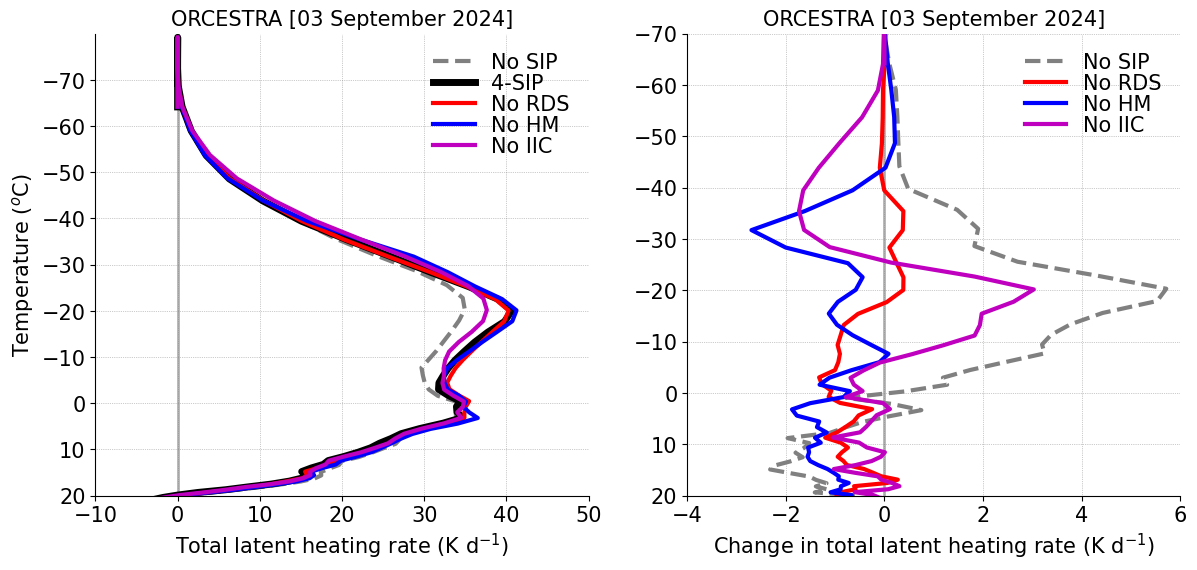

In [101]:

fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_lhr_kperd_nosip, mean_tempc_nosip, '--', color='grey', linewidth=lnwdth, label='No SIP')
plt.plot(mean_lhr_kperd_4sip, mean_tempc_4sip, 'k-', linewidth=lnwdth+2, label='4-SIP')
plt.plot(mean_lhr_kperd_norf, mean_tempc_norf, 'r-', linewidth=lnwdth, label='No RDS')
plt.plot(mean_lhr_kperd_nohm, mean_tempc_nohm, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_lhr_kperd_nobr, mean_tempc_nobr, 'm-', linewidth=lnwdth, label='No IIC')
#plt.plot(mean_lhr_kperd_nosb, mean_tempc_nosb, 'g-', linewidth=lnwdth, label='No SB')

plt.xlim(-10, 50)
plt.ylim(20, -80)
plt.xticks([-10, 0, 10, 20, 30, 40, 50], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xlabel('Total latent heating rate (K d$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('ORCESTRA [03 September 2024]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)


plt.subplot(1,2,2)
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(del_lhr_kperd_nosip, mean_tempc_nosip, '--', color='grey', linewidth=lnwdth, label='No SIP')
plt.plot(del_lhr_kperd_norf, mean_tempc_norf, 'r-', linewidth=lnwdth, label='No RDS')
plt.plot(del_lhr_kperd_nohm, mean_tempc_nohm, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(del_lhr_kperd_nobr, mean_tempc_nobr, 'm-', linewidth=lnwdth, label='No IIC')
#plt.plot(del_lhr_kperd_nosb, mean_tempc_nosb, 'g-', linewidth=lnwdth, label='No SB')

plt.xlim(-4, 6)
plt.ylim(20, -70)
plt.xticks([-4, -2, 0, 2, 4, 6], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xlabel('Change in total latent heating rate (K d$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('ORCESTRA [03 September 2024]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)
plt.show()

plt.show()


In [10]:
ds_4sip

<xarray.Dataset>
Dimensions:         (time: 41, ncells: 73960, vertices: 3, height: 65, bnds: 2,
                     height_2: 66, plev: 1, plev_2: 1, plev_3: 1)
Coordinates:
  * time            (time) datetime64[ns] 2024-09-03 ... 2024-09-03T20:00:00
    clon            (ncells) float64 dask.array<chunksize=(73960,), meta=np.ndarray>
    clat            (ncells) float64 dask.array<chunksize=(73960,), meta=np.ndarray>
  * height          (height) float64 1.0 2.0 3.0 4.0 5.0 ... 62.0 63.0 64.0 65.0
  * height_2        (height_2) float64 1.0 2.0 3.0 4.0 ... 63.0 64.0 65.0 66.0
  * plev            (plev) float64 800.0
  * plev_2          (plev_2) float64 400.0
  * plev_3          (plev_3) float64 0.0
Dimensions without coordinates: ncells, vertices, bnds
Data variables: (12/100)
    clon_bnds       (time, ncells, vertices) float64 dask.array<chunksize=(1, 73960, 3), meta=np.ndarray>
    clat_bnds       (time, ncells, vertices) float64 dask.array<chunksize=(1, 73960, 3), meta=np.ndarray>
    height_bnds     (time, height, bnds) float64 dask.array<chunksize=(1, 65, 2), meta=np.ndarray>
    plev_bnds       (time, plev, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_2_bnds     (time, plev_2, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_3_bnds     (time, plev_3, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    ...              ...
    tqi             (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    tq              (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    ciwc_gperm3     (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    tiwc_gperm3     (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    cdnc_percm3     (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    inc_perl        (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 2.4.0 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  99
    uuidOfHGrid:          572c63b4-5951-d138-93bd-61b05c102860
    uuidOfVGrid:          567425a0-32bf-151c-3811-4389b7cd21e0
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               version: 2024.10; revision: 2a8abec3cefd1c9db62f378...
    history:              /home/b/b382718/icon_orcestra_4sip/icon-oct2024/bin...
    references:           see MPIM/DWD publications
    comment:              Deepak Waman (b382718) on l30683 (Linux 4.18.0-513....

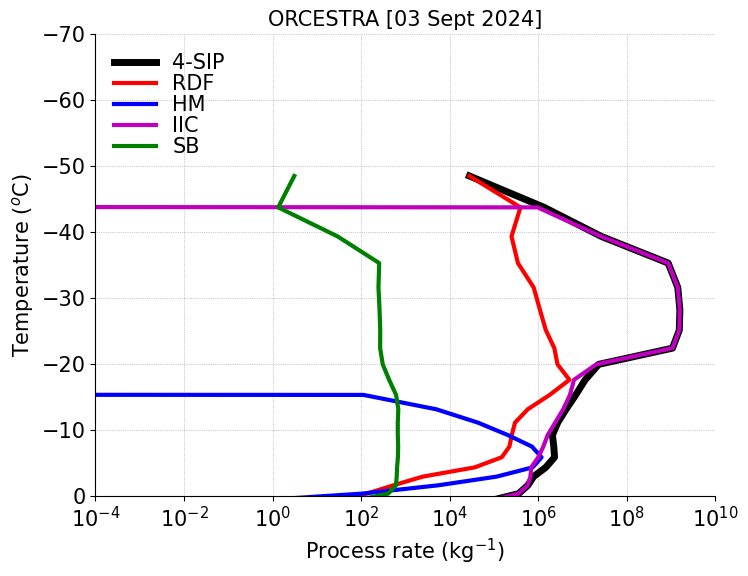

In [22]:

thres_q = 1.e-12
qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_sec, np.nan)
dqi_sec_tot = qi_filt.mean(dim=('time','ncells'))

qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_ds, np.nan)
dqi_rf_tot = qi_filt.mean(dim=('time','ncells'))

qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_rs, np.nan)
dqi_hm_tot = qi_filt.mean(dim=('time','ncells'))

qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_br, np.nan)
dqi_br_tot = qi_filt.mean(dim=('time','ncells'))

qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_snow_sbf, np.nan)
dqi_snow_sb = qi_filt.mean(dim=('time','ncells'))

qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_graup_sbf, np.nan)
dqi_graup_sb = qi_filt.mean(dim=('time','ncells'))

dqi_tot_sb = dqi_snow_sb + dqi_graup_sb

qi_filt = xr.where(ds_4sip.d_qi_homhet > thres_q, ds_4sip.d_qi_homhet, np.nan)
dqi_homhet_tot = qi_filt.mean(dim=('time', 'ncells'))


avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))




dqi_sec_tot = dqi_sec_tot.values #where(avg_tempc > -50)
dqi_rf_tot = dqi_rf_tot.values   #where(avg_tempc > -50)
dqi_hm_tot = dqi_hm_tot.values   #where(avg_tempc > -50)
dqi_br_tot = dqi_br_tot.values   #where(avg_tempc > -50)
dqi_tot_sb = dqi_tot_sb.values   #where(avg_tempc > -50)
dqi_homhet_tot = dqi_homhet_tot.values
avg_tempc = avg_tempc.values

fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(dqi_sec_tot, avg_tempc, 'k-', linewidth=lnwdth+2, label='4-SIP')
plt.plot(dqi_rf_tot, avg_tempc, 'r-', linewidth=lnwdth, label='RDF')
plt.plot(dqi_hm_tot, avg_tempc, 'b-', linewidth=lnwdth, label='HM')
plt.plot(dqi_br_tot, avg_tempc, 'm-', linewidth=lnwdth, label='IIC')
plt.plot(dqi_tot_sb, avg_tempc, 'g-', linewidth=lnwdth, label='SB')
#plt.plot(dqi_homhet_tot, avg_tempc, 'c-', linewidth=lnwdth, label='Hom-Het')

plt.xscale('log')
plt.xlim(1.e-4, 1.e10)
plt.ylim(0, -70)
#plt.xticks([-4, -2, 0, 2, 4, 6, 8, 10], fontsize=fontsize)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Process rate (kg$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('ORCESTRA [03 Sept 2024]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper left')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)
plt.show()


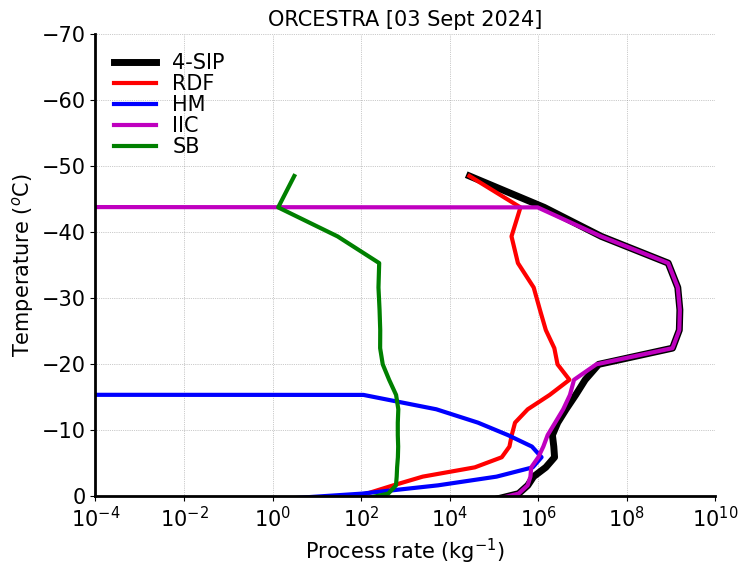

In [26]:

thres_q = 1.e-12
qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_sec, np.nan)
dqi_sec_tot = qi_filt.mean(dim=('time','ncells'))

qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_ds, np.nan)
dqi_rf_tot = qi_filt.mean(dim=('time','ncells'))

qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_rs, np.nan)
dqi_hm_tot = qi_filt.mean(dim=('time','ncells'))

qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_br, np.nan)
dqi_br_tot = qi_filt.mean(dim=('time','ncells'))

qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_snow_sbf, np.nan)
dqi_snow_sb = qi_filt.mean(dim=('time','ncells'))

qi_filt = xr.where(ds_4sip.dqi_sec > thres_q, ds_4sip.dqni_graup_sbf, np.nan)
dqi_graup_sb = qi_filt.mean(dim=('time','ncells'))

dqi_tot_sb = dqi_snow_sb + dqi_graup_sb

qi_filt = xr.where(ds_4sip.d_qi_homhet > thres_q, ds_4sip.d_qi_homhet, np.nan)
dqi_homhet_tot = qi_filt.mean(dim=('time', 'ncells'))


avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))


dqi_sec_tot = dqi_sec_tot.where(avg_tempc > -50)
dqi_rf_tot = dqi_rf_tot.where(avg_tempc > -50)
dqi_hm_tot = dqi_hm_tot.where(avg_tempc > -50)
dqi_br_tot = dqi_br_tot.where(avg_tempc > -50)
dqi_tot_sb = dqi_tot_sb.where(avg_tempc > -50)

dqi_sec_tot = dqi_sec_tot.values #where(avg_tempc > -50)
dqi_rf_tot = dqi_rf_tot.values   #where(avg_tempc > -50)
dqi_hm_tot = dqi_hm_tot.values   #where(avg_tempc > -50)
dqi_br_tot = dqi_br_tot.values   #where(avg_tempc > -50)
dqi_tot_sb = dqi_tot_sb.values   #where(avg_tempc > -50)
dqi_homhet_tot = dqi_homhet_tot.values
avg_tempc = avg_tempc.values

fontsize=15;
lnwdth=3;
alpha=0.6;
st = 3
plt.figure(figsize=(8, 6))
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(dqi_sec_tot, avg_tempc, 'k-', linewidth=lnwdth+2, label='4-SIP')
plt.plot(dqi_rf_tot, avg_tempc, 'r-', linewidth=lnwdth, label='RDF')
plt.plot(dqi_hm_tot, avg_tempc, 'b-', linewidth=lnwdth, label='HM')
plt.plot(dqi_br_tot, avg_tempc, 'm-', linewidth=lnwdth, label='IIC')
plt.plot(dqi_tot_sb, avg_tempc, 'g-', linewidth=lnwdth, label='SB')
#plt.plot(dqi_homhet_tot, avg_tempc, 'c-', linewidth=lnwdth, label='Hom-Het')

plt.xscale('log')
plt.xlim(1.e-4, 1.e10)
plt.ylim(0, -70)
#plt.xticks([-4, -2, 0, 2, 4, 6, 8, 10], fontsize=fontsize)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Process rate (kg$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('ORCESTRA [03 Sept 2024]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper left')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()


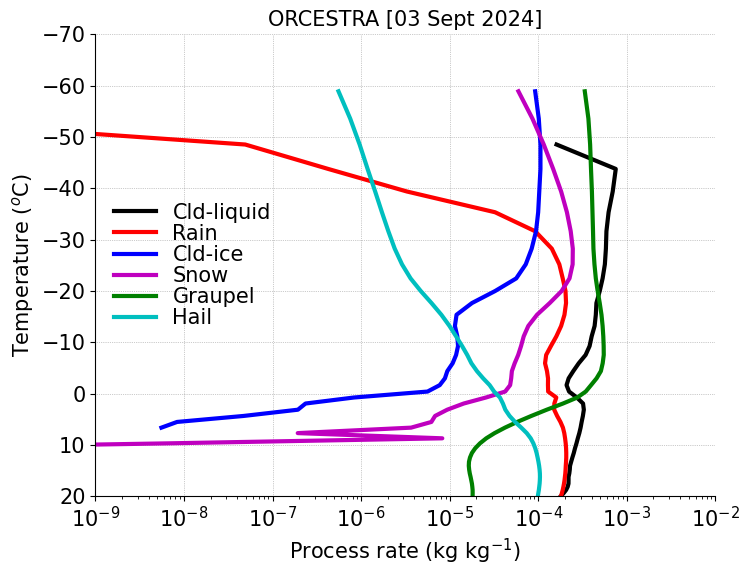

In [25]:

thres_q = 1.e-12
filt_q = xr.where(ds_4sip.qr > thres_q, ds_4sip.qr, np.nan)
avg_qr = filt_q.mean(dim=('time','ncells'))

filt_q = xr.where(ds_4sip.qc > thres_q, ds_4sip.qc, np.nan)
avg_qc = filt_q.mean(dim=('time','ncells'))

filt_q = xr.where(ds_4sip.qi > thres_q, ds_4sip.qi, np.nan)
avg_qi = filt_q.mean(dim=('time','ncells'))

filt_q = xr.where(ds_4sip.qs > thres_q, ds_4sip.qs, np.nan)
avg_qs = filt_q.mean(dim=('time','ncells'))

filt_q = xr.where(ds_4sip.qg > thres_q, ds_4sip.qg, np.nan)
avg_qg = filt_q.mean(dim=('time','ncells'))

filt_q = xr.where(ds_4sip.qh > thres_q, ds_4sip.qh, np.nan)
avg_qh = filt_q.mean(dim=('time','ncells'))

avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

avg_qr = avg_qr.where(avg_tempc > -60)
avg_qc = avg_qc.where(avg_tempc > -60)
avg_qi = avg_qi.where(avg_tempc > -60)
avg_qs = avg_qs.where(avg_tempc > -60)
avg_qg = avg_qg.where(avg_tempc > -60)
avg_qh = avg_qh.where(avg_tempc > -60)

avg_qr = avg_qr.values
avg_qc = avg_qc.values
avg_qi = avg_qi.values
avg_qs = avg_qs.values
avg_qg = avg_qg.values
avg_qh = avg_qh.values

avg_tempc = avg_tempc.values

fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(avg_qc, avg_tempc, 'k-', linewidth=lnwdth, label='Cld-liquid')
plt.plot(avg_qr, avg_tempc, 'r-', linewidth=lnwdth, label='Rain')
plt.plot(avg_qi, avg_tempc, 'b-', linewidth=lnwdth, label='Cld-ice')
plt.plot(avg_qs, avg_tempc, 'm-', linewidth=lnwdth, label='Snow')
plt.plot(avg_qg, avg_tempc, 'g-', linewidth=lnwdth, label='Graupel')
plt.plot(avg_qh, avg_tempc, 'c-', linewidth=lnwdth, label='Hail')

plt.xscale('log')
plt.xlim(1.e-9, 1.e-2)
plt.ylim(20, -70)
#plt.xticks([-4, -2, 0, 2, 4, 6, 8, 10], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Process rate (kg kg$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('ORCESTRA [03 Sept 2024]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)
plt.show()


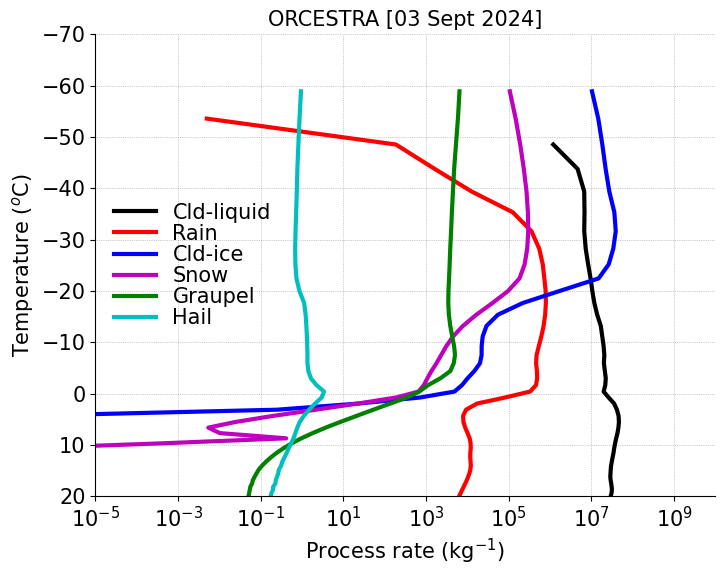

In [24]:

thres_q = 1.e-12
filt_q = xr.where(ds_4sip.qr > thres_q, ds_4sip.qnr, np.nan)
avg_qnr = filt_q.mean(dim=('time','ncells'))

filt_q = xr.where(ds_4sip.qc > thres_q, ds_4sip.qnc, np.nan)
avg_qnc = filt_q.mean(dim=('time','ncells'))

filt_q = xr.where(ds_4sip.qi > thres_q, ds_4sip.qni, np.nan)
avg_qni = filt_q.mean(dim=('time','ncells'))

filt_q = xr.where(ds_4sip.qs > thres_q, ds_4sip.qns, np.nan)
avg_qns = filt_q.mean(dim=('time','ncells'))

filt_q = xr.where(ds_4sip.qg > thres_q, ds_4sip.qng, np.nan)
avg_qng = filt_q.mean(dim=('time','ncells'))

filt_q = xr.where(ds_4sip.qh > thres_q, ds_4sip.qnh, np.nan)
avg_qnh = filt_q.mean(dim=('time','ncells'))

avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

avg_qnr = avg_qnr.where(avg_tempc > -60)
avg_qnc = avg_qnc.where(avg_tempc > -60)
avg_qni = avg_qni.where(avg_tempc > -60)
avg_qns = avg_qns.where(avg_tempc > -60)
avg_qng = avg_qng.where(avg_tempc > -60)
avg_qnh = avg_qnh.where(avg_tempc > -60)

avg_qnr = avg_qnr.values
avg_qnc = avg_qnc.values
avg_qni = avg_qni.values
avg_qns = avg_qns.values
avg_qng = avg_qng.values
avg_qnh = avg_qnh.values

avg_tempc = avg_tempc.values

fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(avg_qnc, avg_tempc, 'k-', linewidth=lnwdth, label='Cld-liquid')
plt.plot(avg_qnr, avg_tempc, 'r-', linewidth=lnwdth, label='Rain')
plt.plot(avg_qni, avg_tempc, 'b-', linewidth=lnwdth, label='Cld-ice')
plt.plot(avg_qns, avg_tempc, 'm-', linewidth=lnwdth, label='Snow')
plt.plot(avg_qng, avg_tempc, 'g-', linewidth=lnwdth, label='Graupel')
plt.plot(avg_qnh, avg_tempc, 'c-', linewidth=lnwdth, label='Hail')

plt.xscale('log')
plt.xlim(1.e-5, 1.e10)
plt.ylim(20, -70)
#plt.xticks([-4, -2, 0, 2, 4, 6, 8, 10], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Process rate (kg$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('ORCESTRA [03 Sept 2024]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)
plt.show()


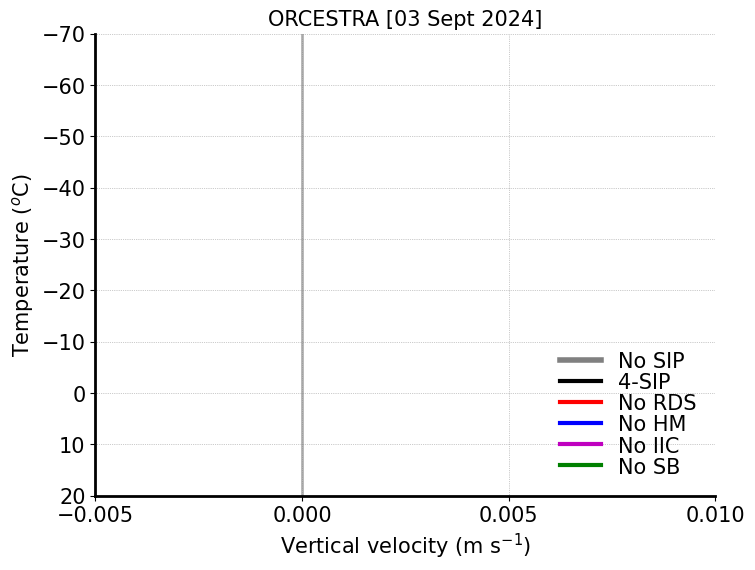

In [27]:

mean_w_up_nosip = ds_nosip.w_vel.where(ds_nosip.w_vel > 0.).mean(dim=('time','ncells'))
mean_w_up_4sip = ds_4sip.w_vel.where(ds_nosip.w_vel > 0.).mean(dim=('time','ncells'))
mean_w_up_norf = ds_norf.w_vel.where(ds_nosip.w_vel > 0.).mean(dim=('time','ncells'))
mean_w_up_nohm = ds_nohm.w_vel.where(ds_nosip.w_vel > 0.).mean(dim=('time','ncells'))
mean_w_up_nobr = ds_nobr.w_vel.where(ds_nosip.w_vel > 0.).mean(dim=('time','ncells'))
mean_w_up_nosb = ds_nosb.w_vel.where(ds_nosip.w_vel > 0.).mean(dim=('time','ncells'))

mean_w_dn_nosip = ds_nosip.w_vel.where(ds_nosip.w_vel < 0.).mean(dim=('time','ncells'))
mean_w_dn_4sip = ds_4sip.w_vel.where(ds_nosip.w_vel < 0.).mean(dim=('time','ncells'))
mean_w_dn_norf = ds_norf.w_vel.where(ds_nosip.w_vel < 0.).mean(dim=('time','ncells'))
mean_w_dn_nohm = ds_nohm.w_vel.where(ds_nosip.w_vel < 0.).mean(dim=('time','ncells'))
mean_w_dn_nobr = ds_nobr.w_vel.where(ds_nosip.w_vel < 0.).mean(dim=('time','ncells'))
mean_w_dn_nosb = ds_nosb.w_vel.where(ds_nosip.w_vel < 0.).mean(dim=('time','ncells'))

mean_w_net_nosip = ds_nosip.w_vel.mean(dim=('time','ncells'))
mean_w_net_4sip = ds_4sip.w_vel.mean(dim=('time','ncells'))
mean_w_net_norf = ds_norf.w_vel.mean(dim=('time','ncells'))
mean_w_net_nohm = ds_nohm.w_vel.mean(dim=('time','ncells'))
mean_w_net_nobr = ds_nobr.w_vel.mean(dim=('time','ncells'))
mean_w_net_nosb = ds_nosb.w_vel.mean(dim=('time','ncells'))

mean_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_w_net_nosip = mean_w_net_nosip.where(mean_tempc > -60)
mean_w_net_4sip = mean_w_net_4sip.where(mean_tempc > -60)
mean_w_net_norf = mean_w_net_norf.where(mean_tempc > -60)
mean_w_net_nohm = mean_w_net_nohm.where(mean_tempc > -60)
mean_w_net_nobr = mean_w_net_nobr.where(mean_tempc > -60)
mean_w_net_nosb = mean_w_net_nosb.where(mean_tempc > -60)

mean_w_up_nosip = mean_w_up_nosip.where(mean_tempc > -60)
mean_w_up_4sip = mean_w_up_4sip.where(mean_tempc > -60)
mean_w_up_norf = mean_w_up_norf.where(mean_tempc > -60)
mean_w_up_nohm = mean_w_up_nohm.where(mean_tempc > -60)
mean_w_up_nobr = mean_w_up_nobr.where(mean_tempc > -60)
mean_w_up_nosb = mean_w_up_nosb.where(mean_tempc > -60)

mean_w_dn_nosip = mean_w_dn_nosip.where(mean_tempc > -60)
mean_w_dn_4sip = mean_w_dn_4sip.where(mean_tempc > -60)
mean_w_dn_norf = mean_w_dn_norf.where(mean_tempc > -60)
mean_w_dn_nohm = mean_w_dn_nohm.where(mean_tempc > -60)
mean_w_dn_nobr = mean_w_dn_nobr.where(mean_tempc > -60)
mean_w_dn_nosb = mean_w_dn_nosb.where(mean_tempc > -60)

mean_w_net_nosip = mean_w_net_nosip.values
mean_w_net_4sip = mean_w_net_4sip.values
mean_w_net_norf = mean_w_net_norf.values
mean_w_net_nohm = mean_w_net_nohm.values
mean_w_net_nobr = mean_w_net_nobr.values
mean_w_net_nosb = mean_w_net_nosb.values

mean_w_up_nosip = mean_w_up_nosip.values
mean_w_up_4sip = mean_w_up_4sip.values
mean_w_up_norf = mean_w_up_norf.values
mean_w_up_nohm = mean_w_up_nohm.values
mean_w_up_nobr = mean_w_up_nobr.values
mean_w_up_nosb = mean_w_up_nosb.values

mean_w_dn_nosip = mean_w_dn_nosip.values
mean_w_dn_4sip = mean_w_dn_4sip.values
mean_w_dn_norf = mean_w_dn_norf.values
mean_w_dn_nohm = mean_w_dn_nohm.values
mean_w_dn_nobr = mean_w_dn_nobr.values
mean_w_dn_nosb = mean_w_dn_nosb.values

fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(16, 5))
#plt.subplot(1,2,1)
#plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_w_net_nosip, mean_tempc, '-', color='grey', linewidth=lnwdth+1, label='No SIP')
plt.plot(mean_w_net_4sip, mean_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_w_net_norf, mean_tempc, 'r-', linewidth=lnwdth, label='No RDS')
plt.plot(mean_w_net_nohm, mean_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_w_net_nobr, mean_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_w_net_nosb, mean_tempc, 'g-', linewidth=lnwdth, label='No SB')

#plt.xlim(-0.005, 0.01)
plt.ylim(20, -70)
plt.xticks(fontsize=fontsize)
#plt.xticks([-0.005, 0., 0.005, 0.01], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xlabel('Vertical velocity (m s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('ORCESTRA [03 Sept 2024]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()



In [49]:

acc_precip_sip = ds_sip_new.tot_prec.mean('ncells')
acc_precip_nosip = ds_nosip_new.tot_prec.mean('ncells')

filt_cond = (ds_sip_new.tq > 1.e-6) & (ds_sip_new.w_vel > 0.)
filt_wvel = xr.where(filt_cond, ds_sip_new.w_vel, np.nan)
avg_wvel_up_sip = filt_wvel.mean(dim=('time','ncells'))

filt_cond = (ds_sip_new.tq > 1.e-6) & (ds_sip_new.w_vel < 0.)
filt_wvel = xr.where(filt_cond, ds_sip_new.w_vel, np.nan)
avg_wvel_dn_sip = filt_wvel.mean(dim=('time','ncells'))

filt_cond = (ds_nosip_new.tq > 1.e-6) & (ds_nosip_new.w_vel > 0.)
filt_wvel = xr.where(filt_cond, ds_nosip_new.w_vel, np.nan)
avg_wvel_up_nosip = filt_wvel.mean(dim=('time','ncells'))

filt_cond = (ds_nosip_new.tq > 1.e-6) & (ds_nosip_new.w_vel < 0.)
filt_wvel = xr.where(filt_cond, ds_nosip_new.w_vel, np.nan)
avg_wvel_dn_nosip = filt_wvel.mean(dim=('time','ncells'))

del_prec_sip = ds_sip_new.tot_prec.diff('time')
del_prec_nosip = ds_nosip_new.tot_prec.diff('time')
precip_rate_sip = del_prec_sip/0.5            # output is over 30 min
precip_rate_nosip = del_prec_nosip/0.5

precip_rate_sip = precip_rate_sip.mean('ncells')
precip_rate_nosip = precip_rate_nosip.mean('ncells')
#print(acc_precip_sip.max().values)
#print(acc_precip_nosip.max().values)

#print(ds_sip_new.w_vel.max().values)
#print(ds_nosip_new.w_vel.max().values)

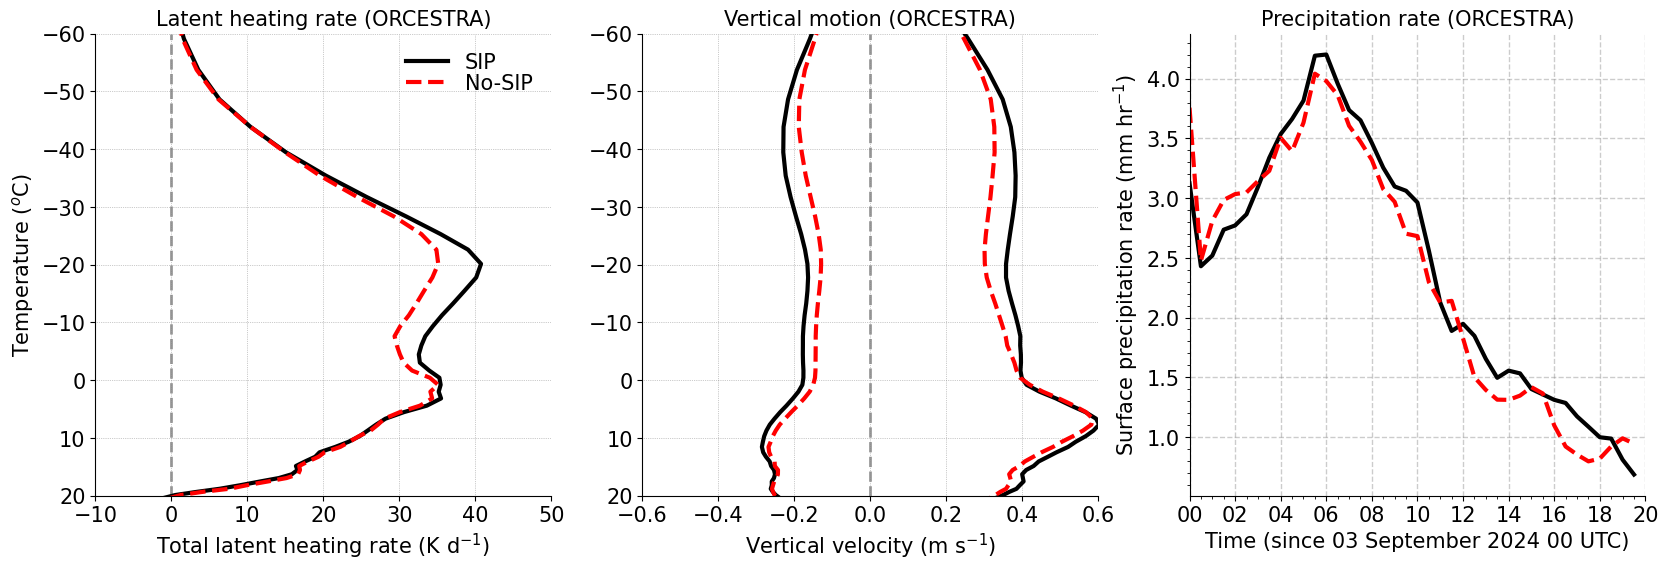

In [50]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=2, alpha=0.8)
plt.plot(mean_lhr_kperday_sip, mean_temp-273.15, '-', color='black', linewidth=lnwdth, label='SIP')
plt.plot(mean_lhr_kperday_nosip, mean_temp-273.15, '--', color='red', linewidth=lnwdth, label='No-SIP')

plt.xlim(-10, 50)
plt.ylim(20, -60)
plt.xticks([-10, 0, 10, 20, 30, 40, 50], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xlabel('Total latent heating rate (K d$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Latent heating rate (ORCESTRA)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1, 3, 2)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=2, alpha=0.8)

plt.plot(avg_wvel_up_sip, mean_temp-273.15, '-', color='black', linewidth=lnwdth, label='SIP')
plt.plot(avg_wvel_up_nosip, mean_temp-273.15, '--', color='red', linewidth=lnwdth, label='No-SIP')
plt.plot(avg_wvel_dn_sip, mean_temp-273.15, '-', color='black', linewidth=lnwdth)
plt.plot(avg_wvel_dn_nosip, mean_temp-273.15, '--', color='red', linewidth=lnwdth)

plt.xlim(-0.6, 0.6)
plt.ylim(20, -60)
plt.xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Vertical velocity (m s$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Vertical motion (ORCESTRA)', fontsize=fontsize)
#plt.legend()
#plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#precip_rate_sip
plt.subplot(1, 3, 3)
plt.plot(ds_sip_new.time[:-1], precip_rate_sip, "k-", label="SIP", linewidth = lnwdth)
plt.plot(ds_nosip_new.time[:-1], precip_rate_nosip, "r--", label="No-SIP", linewidth = lnwdth)

#plt.plot(ds_sip_new.time, acc_precip_sip, "k-", label="SIP", linewidth = lnwdth)
#plt.plot(ds_nosip_new.time, acc_precip_nosip, "r--", label="No-SIP", linewidth = lnwdth)

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.4)
plt.minorticks_on()
plt.xlabel('Time (since 03 September 2024 00 UTC)', fontsize=fontsize)
plt.ylabel('Surface precipitation rate (mm hr$^{-1}$)', fontsize=fontsize)
start_date = datetime(2024, 9, 3, 0, 0)
end_date = datetime(2024, 9, 3, 20, 0)
plt.xlim(start_date, end_date)
#plt.ylim(0, 50)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Precipitation rate (ORCESTRA)', fontsize=fontsize)
#plt.legend()
#plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout to ensure there is no overlap between subplots
#plt.tight_layout()

plt.show()


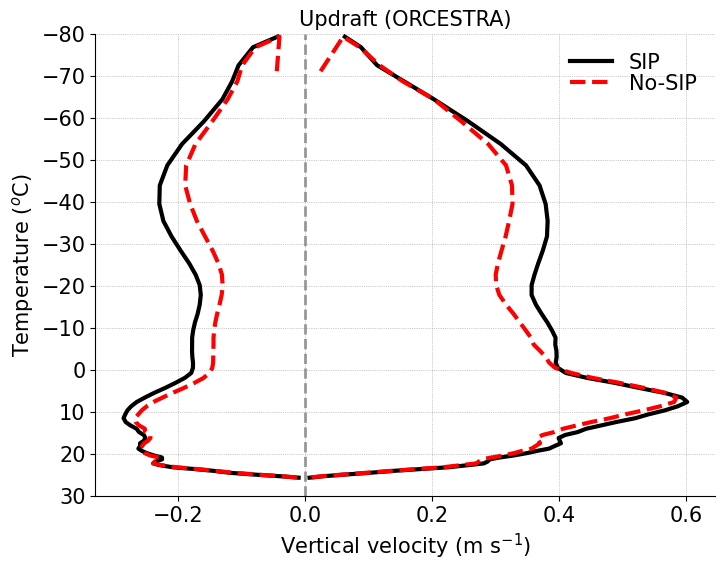

In [73]:
fontsize=15;
lnwdth=3;
alpha=0.6;


plt.figure(figsize=(8, 6))
plt.axvline(x=0, color='grey', linestyle='--', linewidth=2, alpha=0.8)

plt.plot(avg_wvel_up_sip, mean_temp-273.15, '-', color='black', linewidth=lnwdth, label='SIP')
plt.plot(avg_wvel_up_nosip, mean_temp-273.15, '--', color='red', linewidth=lnwdth, label='No-SIP')
plt.plot(avg_wvel_dn_sip, mean_temp-273.15, '-', color='black', linewidth=lnwdth)#, label='SIP')
plt.plot(avg_wvel_dn_nosip, mean_temp-273.15, '--', color='red', linewidth=lnwdth)#, label='No-SIP')
#plt.xlim(-20, 50)
plt.ylim(30,-80)
#plt.xticks([-20, -10, 0, 10, 20, 30, 40, 50], fontsize=fontsize)
plt.yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Vertical velocity (m s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Updraft (ORCESTRA)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

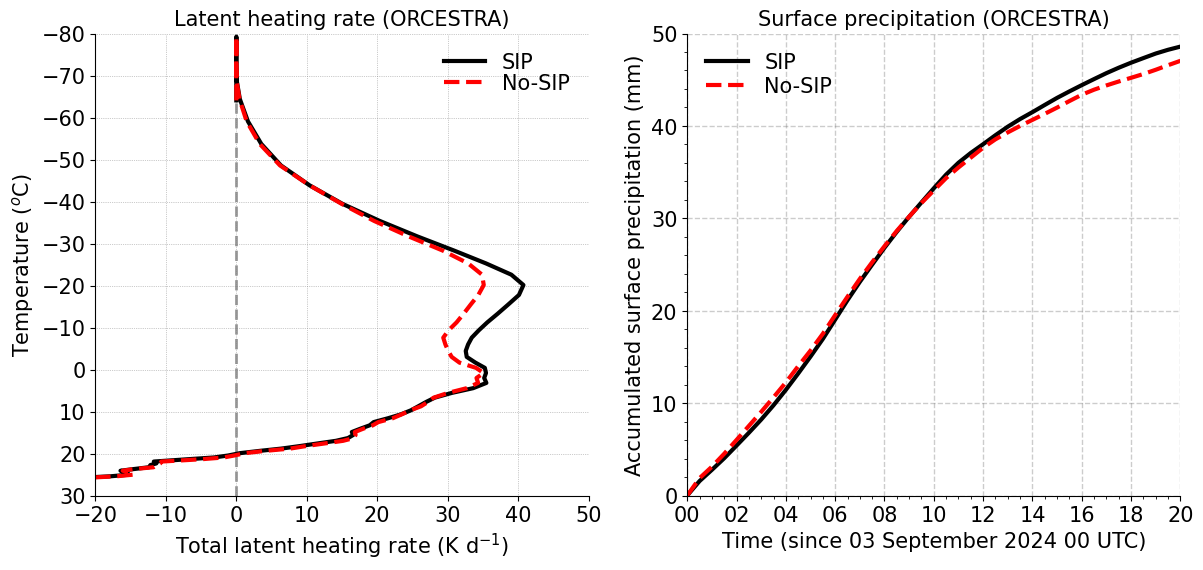

In [60]:

fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=2, alpha=0.8)
#plt.text(45., 20, "(a)", fontsize=22, ha='center', color='k')#, fontweight='bold')

plt.plot(mean_lhr_kperday_sip, mean_temp-273.15, '-', color='black', linewidth=lnwdth, label='SIP')
plt.plot(mean_lhr_kperday_nosip, mean_temp-273.15, '--', color='red', linewidth=lnwdth, label='No-SIP')

plt.xlim(-20, 50)
plt.ylim(30,-80)
plt.xticks([-20, -10, 0, 10, 20, 30, 40, 50], fontsize=fontsize)
plt.yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.yscale('log')
plt.xlabel('Total latent heating rate (K d$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Latent heating rate (ORCESTRA)', fontsize=fontsize)
plt.legend()
# Increase the length of dashes in the legend
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig('/work/bb1163/b382718/ICON_ANALYSIS/dcmex/plots/dcmex_inp_teflon.jpg', dpi=600, bbox_inches='tight')

plt.subplot(1,2,2)
#plt.text(1., 1, "(b)", fontsize=22, ha='center', color='k')#, fontweight='bold')

plt.plot(ds_sip_new.time, acc_precip_sip, "k-", label="SIP", linewidth = lnwdth)
plt.plot(ds_nosip_new.time, acc_precip_nosip, "r--", label="No-SIP", linewidth = lnwdth)

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.4)
plt.minorticks_on()
plt.xlabel('Time (since 03 September 2024 00 UTC)', fontsize=fontsize)
plt.ylabel('Accumulated surface precipitation (mm)', fontsize=fontsize)
start_date = datetime(2024, 9, 3, 0, 0)  # Start at 00 UTC on 10 May 2011
end_date = datetime(2024, 9, 3, 20, 0)
plt.xlim(start_date, end_date)
plt.ylim(0, 50)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Surface precipitation (ORCESTRA)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [25]:

#### No SIP (Generalized estimation for effective particle size, not dependent on number conc.)
toa_sw_up_nosip = ds_nosip_effrad_new.swflx_up[:,0,:]
toa_sw_up_clr_nosip = ds_nosip_effrad_new.swflx_up_clr[:,0,:]
toa_lw_up_nosip = ds_nosip_effrad_new.lwflx_up[:,0,:]
toa_lw_up_clr_nosip = ds_nosip_effrad_new.lwflx_up_clr[:,0,:]

toa_sw_dn_nosip = ds_nosip_effrad_new.swflx_dn[:,0,:]
toa_sw_dn_clr_nosip = ds_nosip_effrad_new.swflx_dn_clr[:,0,:]
toa_lw_dn_nosip = ds_nosip_effrad_new.lwflx_dn[:,0,:]
toa_lw_dn_clr_nosip = ds_nosip_effrad_new.lwflx_dn_clr[:,0,:]

#### SIP (Generalized estimation for effective particle size, not dependent on number conc.)
toa_sw_up_sip = ds_sip_effrad_new.swflx_up[:,0,:]
toa_sw_up_clr_sip = ds_sip_effrad_new.swflx_up_clr[:,0,:]
toa_lw_up_sip = ds_sip_effrad_new.lwflx_up[:,0,:]
toa_lw_up_clr_sip = ds_sip_effrad_new.lwflx_up_clr[:,0,:]

toa_sw_dn_sip = ds_sip_effrad_new.swflx_dn[:,0,:]
toa_sw_dn_clr_sip = ds_sip_effrad_new.swflx_dn_clr[:,0,:]
toa_lw_dn_sip = ds_sip_effrad_new.lwflx_dn[:,0,:]
toa_lw_dn_clr_sip = ds_sip_effrad_new.lwflx_dn_clr[:,0,:]

#CRE_sw = (Qcld_sw_dn - Qcld_sw_up) - (Qclear_sw_dn - Qclear_sw_up)

#toa_cre_sw_1mom = (toa_sw_dn_1mom-toa_sw_up_1mom) - (toa_sw_dn_clr_1mom-toa_sw_up_clr_1mom)
toa_cre_sw_nosip = (toa_sw_dn_nosip-toa_sw_up_nosip) - (toa_sw_dn_clr_nosip-toa_sw_up_clr_nosip)
toa_cre_sw_sip = (toa_sw_dn_sip-toa_sw_up_sip) - (toa_sw_dn_clr_sip-toa_sw_up_clr_sip)

#toa_cre_lw_1mom = (toa_lw_dn_1mom-toa_lw_up_1mom) - (toa_lw_dn_clr_1mom-toa_lw_up_clr_1mom)
toa_cre_lw_nosip = (toa_sw_dn_nosip-toa_lw_up_nosip) - (toa_sw_dn_clr_nosip-toa_lw_up_clr_nosip)
toa_cre_lw_sip = (toa_sw_dn_sip-toa_lw_up_sip) - (toa_sw_dn_clr_sip-toa_lw_up_clr_sip)

#toa_net_cre_1mom = toa_cre_sw_1mom+toa_cre_lw_1mom
toa_net_cre_nosip = toa_cre_sw_nosip+toa_cre_lw_nosip
toa_net_cre_sip = toa_cre_sw_sip+toa_cre_lw_sip

#del_toa_sw_cre_efrad = toa_cre_sw_nosip_efrad-toa_cre_sw_nosip
#del_toa_lw_cre_efrad = toa_cre_lw_nosip_efrad-toa_cre_lw_nosip



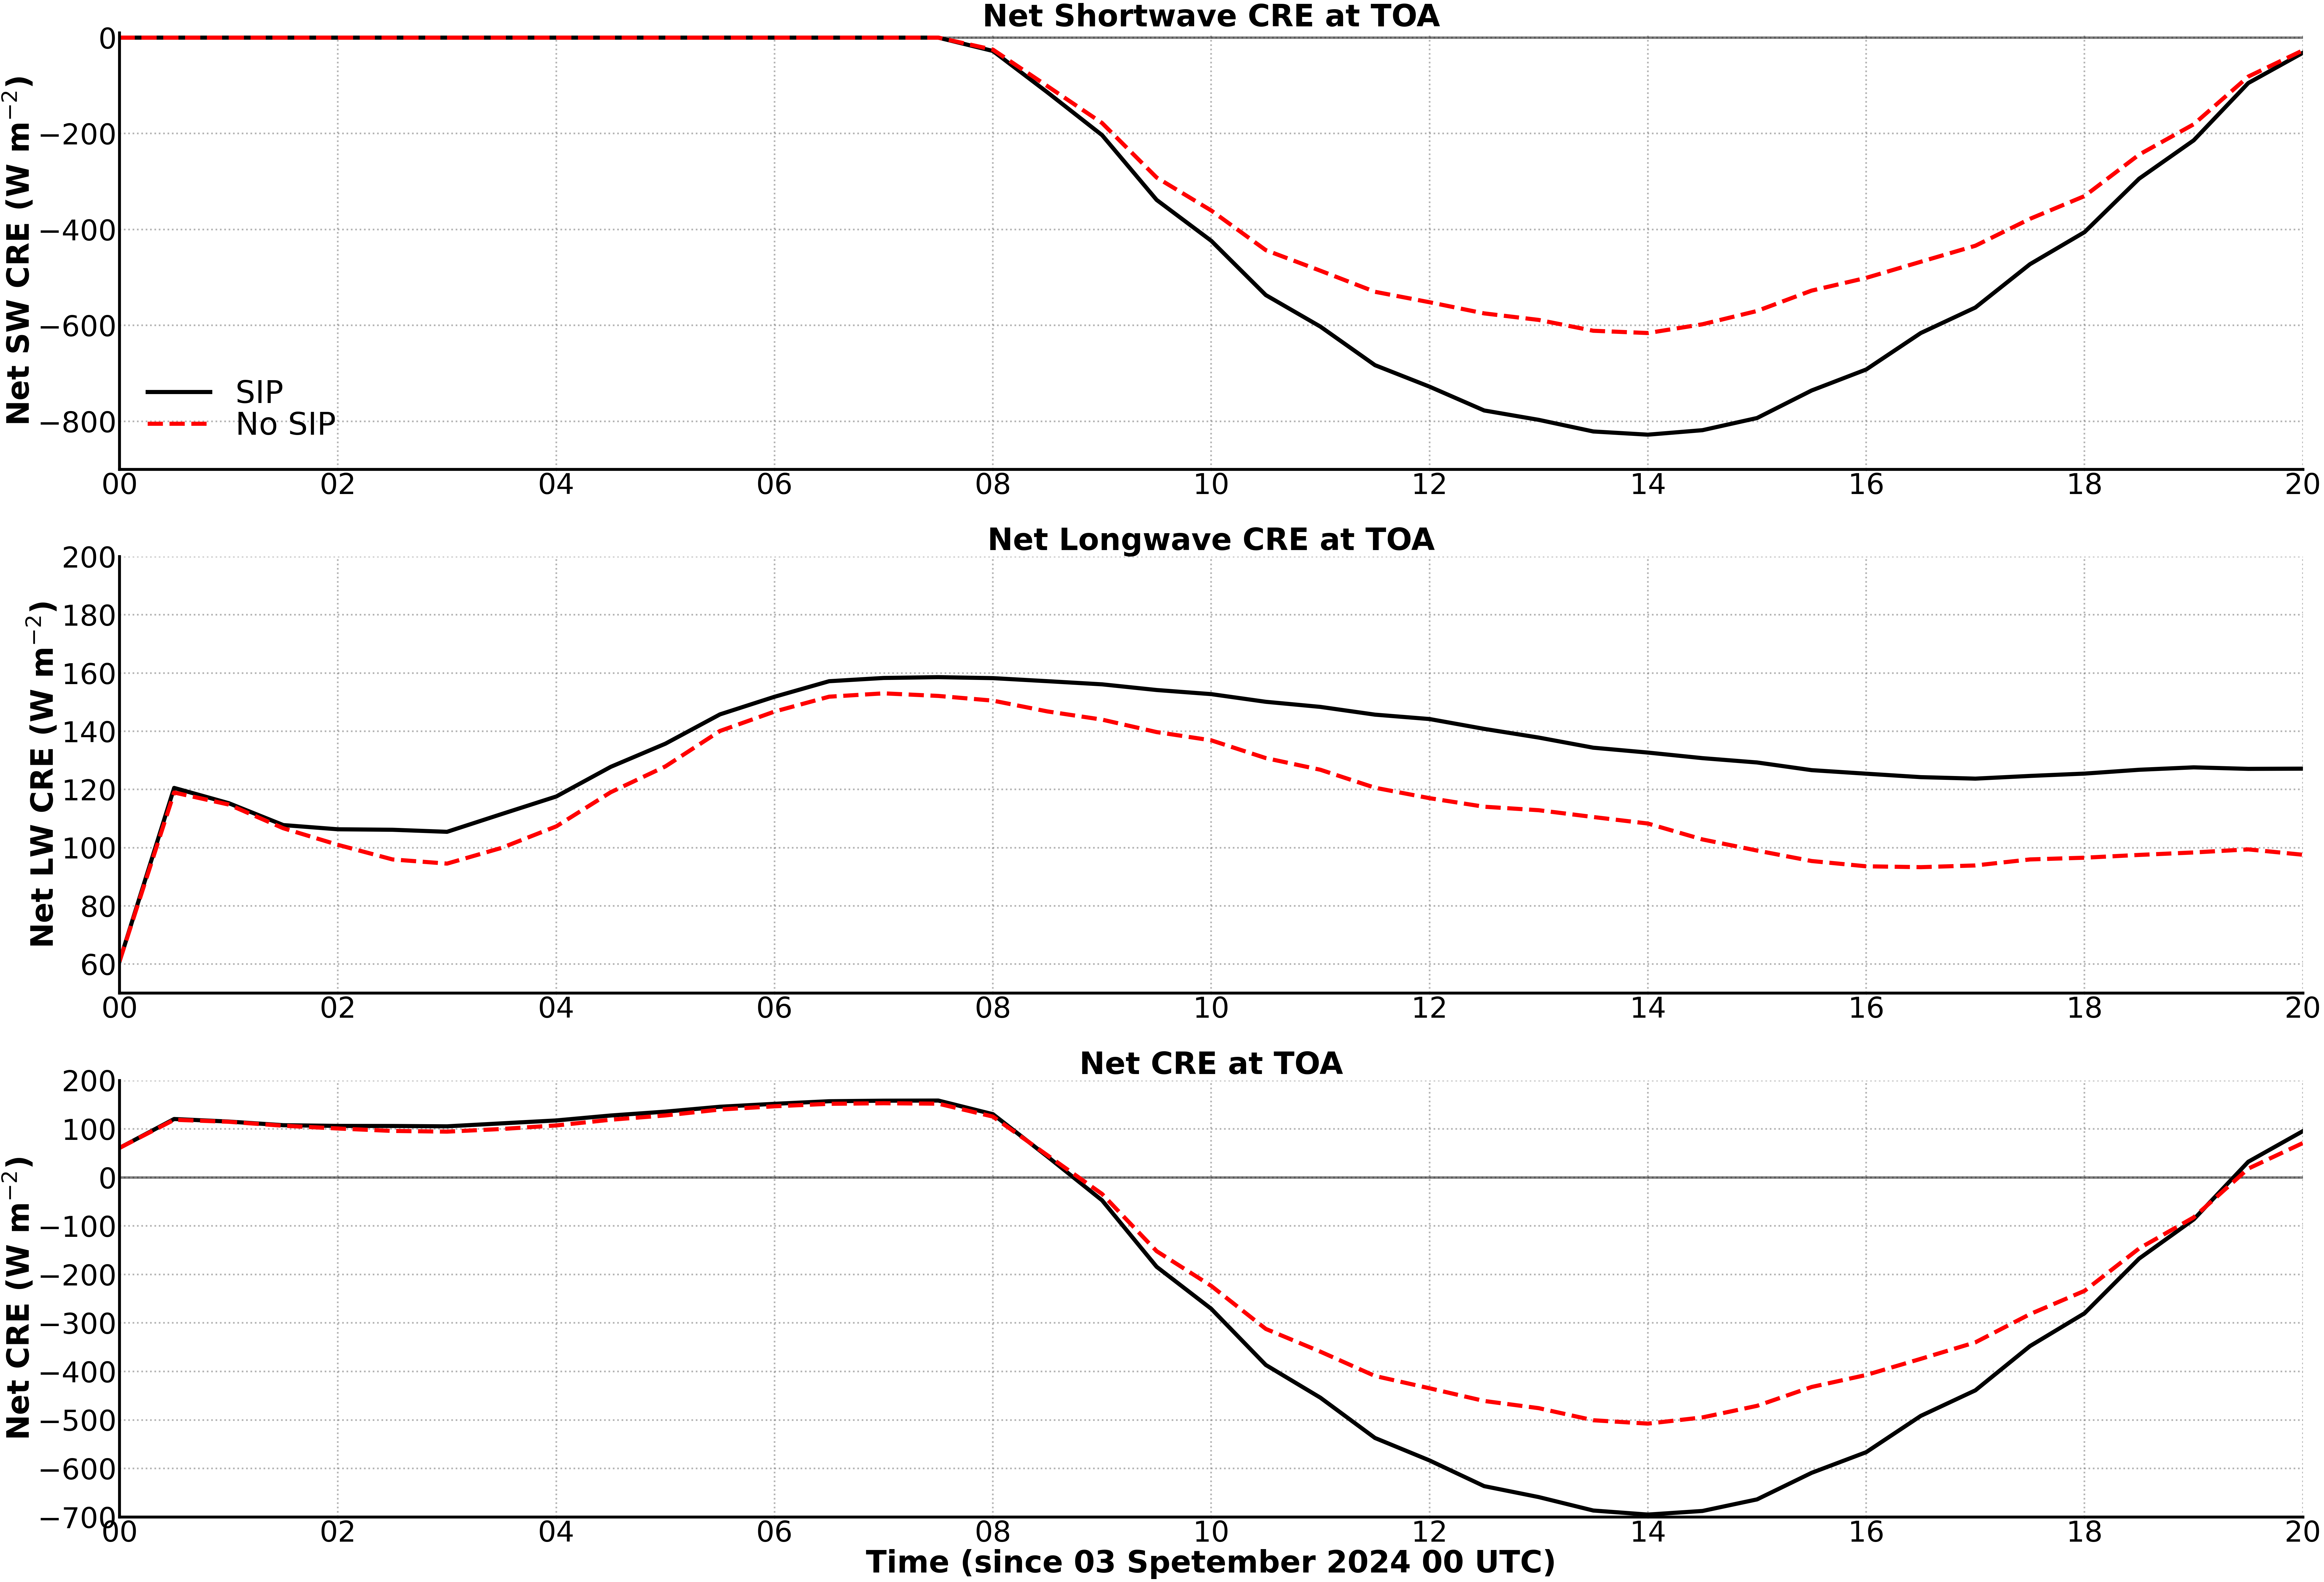

In [45]:

#plt.figure(figsize=(16, 5))
plt.figure(figsize=(95, 65))

lnwdth=10
fontsize=70
plt.subplot(3,1,1)

plt.axhline(y=0, color='k', linestyle='-', linewidth=6, alpha=0.5)

plt.plot(ds_sip_effrad_new.time, toa_cre_sw_sip.mean('ncells'), 'k-', linewidth=lnwdth, label='SIP')
plt.plot(ds_nosip_effrad_new.time, toa_cre_sw_nosip.mean('ncells'), 'r--', linewidth=lnwdth, label='No SIP')
#plt.xlabel('Time (since 03 Spetember 2024 00 UTC)', fontsize=fontsize)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)   
plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-900,10)
plt.yticks(fontsize=fontsize)
plt.ylabel('Net SW CRE (W m$^{-2}$)', fontsize=fontsize+4, fontweight='bold')
plt.title('Net Shortwave CRE at TOA', fontsize=fontsize+4, fontweight='bold')
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize+6, loc='lower left')
plt.grid(True, linestyle=':', linewidth=4, color='grey',alpha=0.6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(7)
plt.gca().spines['bottom'].set_linewidth(7)

plt.subplot(3,1,2)
#plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_sip_effrad_new.time, toa_cre_lw_sip.mean('ncells'), 'k-', linewidth=lnwdth, label='SIP')
plt.plot(ds_nosip_effrad_new.time, toa_cre_lw_nosip.mean('ncells'), 'r--', linewidth=lnwdth, label='No SIP')
#plt.xlabel('Time (since 03 Spetember 2024 00 UTC)', fontsize=fontsize+4)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)   
plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(50,200)
plt.yticks(fontsize=fontsize)
plt.ylabel('Net LW CRE (W m$^{-2}$)', fontsize=fontsize+4, fontweight='bold')
plt.title('Net Longwave CRE at TOA', fontsize=fontsize+4, fontweight='bold')
#plt.legend()
#plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=4, color='grey',alpha=0.6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(7)
plt.gca().spines['bottom'].set_linewidth(7)

plt.subplot(3,1,3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=6, alpha=0.5)

#plt.plot(ds_1mom.time, toa_net_cre_1mom.mean('ncells'), 'r-', linewidth=linewidth, label='1-moment')
plt.plot(ds_sip_effrad_new.time, toa_net_cre_sip.mean('ncells'), 'k-', linewidth=lnwdth, label='SIP')
plt.plot(ds_nosip_effrad_new.time, toa_net_cre_nosip.mean('ncells'), 'r--', linewidth=lnwdth, label='No SIP')
plt.xlabel('Time (since 03 Spetember 2024 00 UTC)', fontsize=fontsize+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)   
plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-700,200)
plt.yticks(fontsize=fontsize)
plt.ylabel('Net CRE (W m$^{-2}$)', fontsize=fontsize+4, fontweight='bold')
plt.title('Net CRE at TOA', fontsize=fontsize+4, fontweight='bold')
#plt.legend()
#plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=4, color='grey',alpha=0.6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(7)
plt.gca().spines['bottom'].set_linewidth(7)
#plt.tight_layout()
plt.show()

In [5]:


#### 1-moment
toa_sw_up_1mom = ds_1mom.swflx_up[:,0,:]
toa_sw_up_clr_1mom = ds_1mom.swflx_up_clr[:,0,:]
toa_lw_up_1mom = ds_1mom.lwflx_up[:,0,:]
toa_lw_up_clr_1mom = ds_1mom.lwflx_up_clr[:,0,:]

toa_sw_dn_1mom = ds_1mom.swflx_dn[:,0,:]
toa_sw_dn_clr_1mom = ds_1mom.swflx_dn_clr[:,0,:]
toa_lw_dn_1mom = ds_1mom.lwflx_dn[:,0,:]
toa_lw_dn_clr_1mom = ds_1mom.lwflx_dn_clr[:,0,:]

#### No SIP (Generalized estimation for effective particle size, not dependent on number conc.)
toa_sw_up_nosip = ds_nosip.swflx_up[:,0,:]
toa_sw_up_clr_nosip = ds_nosip.swflx_up_clr[:,0,:]
toa_lw_up_nosip = ds_nosip.lwflx_up[:,0,:]
toa_lw_up_clr_nosip = ds_nosip.lwflx_up_clr[:,0,:]

toa_sw_dn_nosip = ds_nosip.swflx_dn[:,0,:]
toa_sw_dn_clr_nosip = ds_nosip.swflx_dn_clr[:,0,:]
toa_lw_dn_nosip = ds_nosip.lwflx_dn[:,0,:]
toa_lw_dn_clr_nosip = ds_nosip.lwflx_dn_clr[:,0,:]

#### No SIP (Effective particle size is being estimated from number conc.)
toa_sw_up_nosip_efrad = ds_nosip_effrad.swflx_up[:,0,:]
toa_sw_up_clr_nosip_efrad = ds_nosip_effrad.swflx_up_clr[:,0,:]
toa_lw_up_nosip_efrad = ds_nosip_effrad.lwflx_up[:,0,:]
toa_lw_up_clr_nosip_efrad = ds_nosip_effrad.lwflx_up_clr[:,0,:]

toa_sw_dn_nosip_efrad = ds_nosip_effrad.swflx_dn[:,0,:]
toa_sw_dn_clr_nosip_efrad = ds_nosip_effrad.swflx_dn_clr[:,0,:]
toa_lw_dn_nosip_efrad = ds_nosip_effrad.lwflx_dn[:,0,:]
toa_lw_dn_clr_nosip_efrad = ds_nosip_effrad.lwflx_dn_clr[:,0,:]

#CRE_sw = (Qcld_sw_dn - Qcld_sw_up) - (Qclear_sw_dn - Qclear_sw_up)

toa_cre_sw_1mom = (toa_sw_dn_1mom-toa_sw_up_1mom) - (toa_sw_dn_clr_1mom-toa_sw_up_clr_1mom)
toa_cre_sw_nosip = (toa_sw_dn_nosip-toa_sw_up_nosip) - (toa_sw_dn_clr_nosip-toa_sw_up_clr_nosip)
toa_cre_sw_nosip_efrad = (toa_sw_dn_nosip_efrad-toa_sw_up_nosip_efrad) - (toa_sw_dn_clr_nosip_efrad-toa_sw_up_clr_nosip_efrad)

toa_cre_lw_1mom = (toa_lw_dn_1mom-toa_lw_up_1mom) - (toa_lw_dn_clr_1mom-toa_lw_up_clr_1mom)
toa_cre_lw_nosip = (toa_sw_dn_nosip-toa_lw_up_nosip) - (toa_sw_dn_clr_nosip-toa_lw_up_clr_nosip)
toa_cre_lw_nosip_efrad = (toa_lw_dn_nosip_efrad-toa_lw_up_nosip_efrad) - (toa_lw_dn_clr_nosip_efrad-toa_lw_up_clr_nosip_efrad)

toa_net_cre_1mom = toa_cre_sw_1mom+toa_cre_lw_1mom
toa_net_cre_nosip = toa_cre_sw_nosip+toa_cre_lw_nosip
toa_net_cre_nosip_efrad = toa_cre_sw_nosip_efrad+toa_cre_lw_nosip_efrad

del_toa_sw_cre_efrad = toa_cre_sw_nosip_efrad-toa_cre_sw_nosip
del_toa_lw_cre_efrad = toa_cre_lw_nosip_efrad-toa_cre_lw_nosip
del_toa_net_cre_efrad = toa_net_cre_nosip_efrad-toa_net_cre_nosip



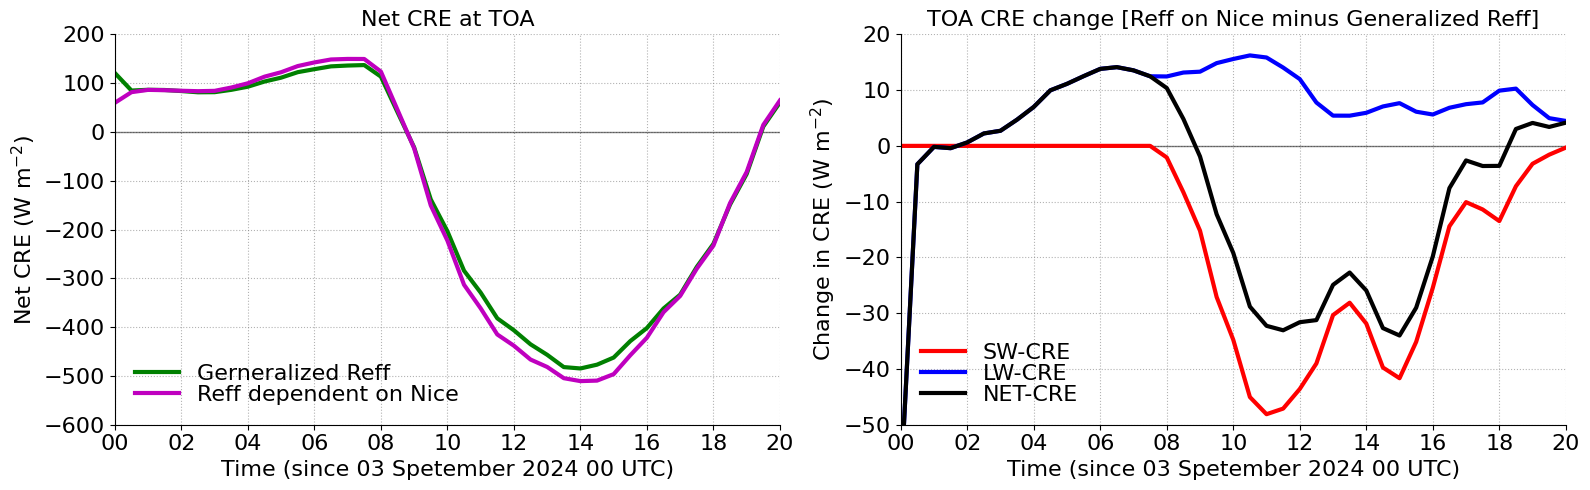

In [6]:

plt.figure(figsize=(16, 5))
linewidth=3
fontsize=16
plt.subplot(1,2,1)

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

#plt.plot(ds_1mom.time, toa_net_cre_1mom.mean('ncells'), 'r-', linewidth=linewidth, label='1-moment')
plt.plot(ds_nosip.time, toa_net_cre_nosip.mean('ncells'), 'g-', linewidth=linewidth, label='Gerneralized Reff')
plt.plot(ds_nosip_effrad.time, toa_net_cre_nosip_efrad.mean('ncells'), 'm-', linewidth=linewidth, label='Reff dependent on Nice')
plt.xlabel('Time (since 03 Spetember 2024 00 UTC)', fontsize=fontsize)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)   
plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-600,200)
plt.yticks(fontsize=fontsize)
plt.ylabel('Net CRE (W m$^{-2}$)', fontsize=fontsize)
plt.title('Net CRE at TOA', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', color='grey',alpha=0.6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1,2,2)

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_nosip_effrad.time, del_toa_sw_cre_efrad.mean('ncells'), 'r-', linewidth=linewidth, label='SW-CRE')
plt.plot(ds_nosip_effrad.time, del_toa_lw_cre_efrad.mean('ncells'), 'b-', linewidth=linewidth, label='LW-CRE')
plt.plot(ds_nosip_effrad.time, del_toa_net_cre_efrad.mean('ncells'), 'k-', linewidth=linewidth, label='NET-CRE')

plt.xlabel('Time (since 03 Spetember 2024 00 UTC)', fontsize=fontsize)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)  
plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-50,20)
plt.yticks(fontsize=fontsize)
plt.ylabel('Change in CRE (W m$^{-2}$)', fontsize=fontsize)
plt.title('TOA CRE change [Reff on Nice minus Generalized Reff]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, ncols=1, loc='lower left')
plt.grid(True, linestyle=':', color='grey',alpha=0.6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [45]:
print(ds_sip.ddt_temp_radsw.min().values)
print(ds_sip.ddt_temp_radsw.max().values)

0.0
0.0012396787


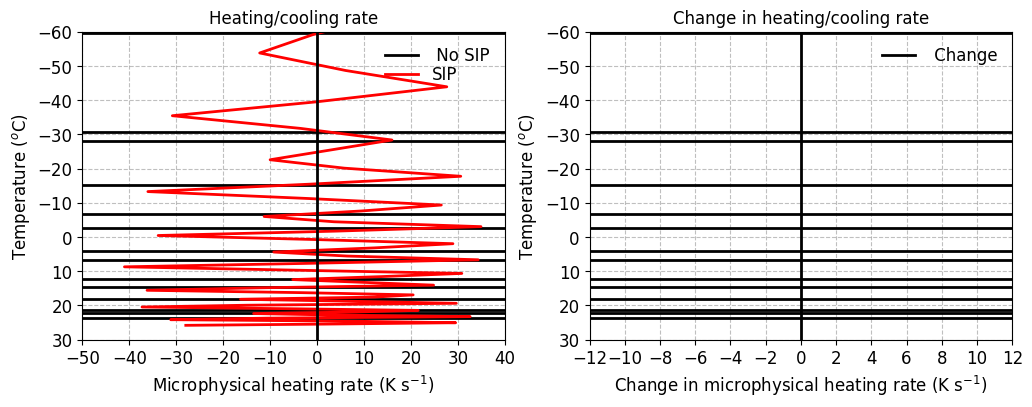

In [6]:


filt_ddt_gscp = xr.where(ds_nosip.tot_qcld > 1.e-5, ds_nosip.d_lhr, np.nan)
mean_microph_ddt_nosip = filt_ddt_gscp.mean(dim=('time','ncells'))
mean_tempc_nosip = ds_nosip.tempc.mean(dim=('time','ncells'))

filt_ddt_gscp = xr.where(ds_sip.tot_qcld > 1.e-5, ds_sip.ddt_temp_gscp, np.nan)
mean_microph_ddt_sip = filt_ddt_gscp.mean(dim=('time','ncells'))
mean_tempc_sip = ds_sip.tempc.mean(dim=('time','ncells'))

del_microph_ddt = mean_microph_ddt_sip-mean_microph_ddt_nosip

# Plotting
plt.figure(figsize=(12, 4))
deg_faint_errbar = 0.6
lnwdth=2
fontsize=12
plt.subplot(1,2,1)
plt.plot(mean_microph_ddt_nosip,mean_tempc_nosip, 'k-', label=' No SIP', linewidth = lnwdth)
plt.plot(mean_microph_ddt_sip,mean_tempc_sip, 'r-', label='SIP', linewidth = lnwdth)

plt.axvline(x=0, color='k', linestyle='-', linewidth=2)

plt.xlim(-50, 40)
plt.xticks([-50, -40, -30, -20, -10, 0, 10, 20, 30, 40], fontsize=fontsize)
plt.ylim(30, -60)
plt.yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xlabel('Microphysical heating rate (K s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Heating/cooling rate', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.grid(True, linestyle='--', alpha=0.5, color='grey')

plt.subplot(1,2,2)

plt.plot(del_microph_ddt,mean_tempc_nosip, 'k-', label=' Change', linewidth = lnwdth)
plt.axvline(x=0, color='k', linestyle='-', linewidth=2)

plt.xlim(-12, 12)
plt.xticks([-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12], fontsize=fontsize)
plt.ylim(30, -60)
plt.yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xlabel('Change in microphysical heating rate (K s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Change in heating/cooling rate', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.grid(True, linestyle='--', alpha=0.5, color='grey')

plt.show()


In [48]:
ds_sip

<xarray.Dataset>
Dimensions:         (time: 41, ncells: 73960, vertices: 3, height: 65, bnds: 2,
                     height_2: 66, plev: 1, plev_2: 1, plev_3: 1)
Coordinates:
  * time            (time) datetime64[ns] 2024-09-03 ... 2024-09-03T20:00:00
    clon            (ncells) float64 dask.array<chunksize=(73960,), meta=np.ndarray>
    clat            (ncells) float64 dask.array<chunksize=(73960,), meta=np.ndarray>
  * height          (height) float64 1.0 2.0 3.0 4.0 5.0 ... 62.0 63.0 64.0 65.0
  * height_2        (height_2) float64 1.0 2.0 3.0 4.0 ... 63.0 64.0 65.0 66.0
  * plev            (plev) float64 800.0
  * plev_2          (plev_2) float64 400.0
  * plev_3          (plev_3) float64 0.0
Dimensions without coordinates: ncells, vertices, bnds
Data variables: (12/85)
    clon_bnds       (time, ncells, vertices) float64 dask.array<chunksize=(1, 73960, 3), meta=np.ndarray>
    clat_bnds       (time, ncells, vertices) float64 dask.array<chunksize=(1, 73960, 3), meta=np.ndarray>
    height_bnds     (time, height, bnds) float64 dask.array<chunksize=(1, 65, 2), meta=np.ndarray>
    plev_bnds       (time, plev, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_2_bnds     (time, plev_2, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_3_bnds     (time, plev_3, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    ...              ...
    tot_qcld        (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    lwc_gperm3      (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    ciwc_gperm3     (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    tiwc_gperm3     (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    cdnc_percm3     (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    inc_perl        (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 2.4.0 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  99
    uuidOfHGrid:          572c63b4-5951-d138-93bd-61b05c102860
    uuidOfVGrid:          567425a0-32bf-151c-3811-4389b7cd21e0
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               version: 2024.10; revision: 885c4646a69d44aa9e9fdf4...
    history:              /home/b/b382718/tdf_sip_lfr/icon-oct2024/bin/icon a...
    references:           see MPIM/DWD publications
    comment:              Deepak Waman (b382718) on l40493 (Linux 4.18.0-513....

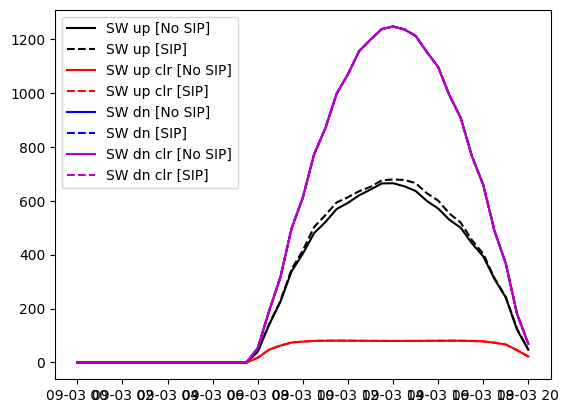

In [7]:

#### 1-moment
toa_sw_up_1mom = ds_1mom.swflx_up[:,0,:]
toa_sw_up_clr_1mom = ds_1mom.swflx_up_clr[:,0,:]
toa_lw_up_1mom = ds_1mom.lwflx_up[:,0,:]
toa_lw_up_clr_1mom = ds_1mom.lwflx_up_clr[:,0,:]

toa_sw_dn_1mom = ds_1mom.swflx_dn[:,0,:]
toa_sw_dn_clr_1mom = ds_1mom.swflx_dn_clr[:,0,:]
toa_lw_dn_1mom = ds_1mom.lwflx_dn[:,0,:]
toa_lw_dn_clr_1mom = ds_1mom.lwflx_dn_clr[:,0,:]

#### SIP
toa_sw_up_sip = ds_sip.swflx_up[:,0,:]
toa_sw_up_clr_sip = ds_sip.swflx_up_clr[:,0,:]
toa_lw_up_sip = ds_sip.lwflx_up[:,0,:]
toa_lw_up_clr_sip = ds_sip.lwflx_up_clr[:,0,:]

toa_sw_dn_sip = ds_sip.swflx_dn[:,0,:]
toa_sw_dn_clr_sip = ds_sip.swflx_dn_clr[:,0,:]
toa_lw_dn_sip = ds_sip.lwflx_dn[:,0,:]
toa_lw_dn_clr_sip = ds_sip.lwflx_dn_clr[:,0,:]

#### No SIP
toa_sw_up_nosip = ds_nosip.swflx_up[:,0,:]
toa_sw_up_clr_nosip = ds_nosip.swflx_up_clr[:,0,:]
toa_lw_up_nosip = ds_nosip.lwflx_up[:,0,:]
toa_lw_up_clr_nosip = ds_nosip.lwflx_up_clr[:,0,:]

toa_sw_dn_nosip = ds_nosip.swflx_dn[:,0,:]
toa_sw_dn_clr_nosip = ds_nosip.swflx_dn_clr[:,0,:]
toa_lw_dn_nosip = ds_nosip.lwflx_dn[:,0,:]
toa_lw_dn_clr_nosip = ds_nosip.lwflx_dn_clr[:,0,:]

#CRE_sw = (Qcld_sw_dn - Qcld_sw_up) - (Qclear_sw_dn - Qclear_sw_up)

toa_cre_sw_1mom = (toa_sw_dn_1mom-toa_sw_up_1mom) - (toa_sw_dn_clr_1mom-toa_sw_up_clr_1mom)
toa_cre_sw_nosip = (toa_sw_dn_nosip-toa_sw_up_nosip) - (toa_sw_dn_clr_nosip-toa_sw_up_clr_nosip)
toa_cre_sw_sip = (toa_sw_dn_sip-toa_sw_up_sip) - (toa_sw_dn_clr_sip-toa_sw_up_clr_sip)

toa_cre_lw_1mom = (toa_lw_dn_1mom-toa_lw_up_1mom) - (toa_lw_dn_clr_1mom-toa_lw_up_clr_1mom)
toa_cre_lw_nosip = (toa_sw_dn_nosip-toa_lw_up_nosip) - (toa_sw_dn_clr_nosip-toa_lw_up_clr_nosip)
toa_cre_lw_sip = (toa_lw_dn_sip-toa_lw_up_sip) - (toa_lw_dn_clr_sip-toa_lw_up_clr_sip)

toa_net_cre_1mom = toa_cre_sw_1mom+toa_cre_lw_1mom
toa_net_cre_nosip = toa_cre_sw_nosip+toa_cre_lw_nosip
toa_net_cre_sip = toa_cre_sw_sip+toa_cre_lw_sip

del_toa_sw_cre = toa_cre_sw_sip-toa_cre_sw_nosip
del_toa_lw_cre = toa_cre_lw_sip-toa_cre_lw_nosip
del_toa_net_cre = toa_net_cre_sip-toa_net_cre_nosip

plt.plot(ds_nosip.time,toa_sw_up_nosip.mean('ncells'), 'k-', label='SW up [No SIP]')
plt.plot(ds_sip.time,toa_sw_up_sip.mean('ncells'), 'k--', label='SW up [SIP]')
plt.plot(ds_nosip.time,toa_sw_up_clr_nosip.mean('ncells'), 'r-', label='SW up clr [No SIP]')
plt.plot(ds_sip.time,toa_sw_up_clr_sip.mean('ncells'), 'r--', label='SW up clr [SIP]')
plt.plot(ds_nosip.time,toa_sw_dn_nosip.mean('ncells'), 'b-', label='SW dn [No SIP]')
plt.plot(ds_sip.time,toa_sw_dn_sip.mean('ncells'), 'b--', label='SW dn [SIP]')
plt.plot(ds_nosip.time,toa_sw_dn_clr_nosip.mean('ncells'), 'm-', label='SW dn clr [No SIP]')
plt.plot(ds_sip.time,toa_sw_dn_clr_sip.mean('ncells'), 'm--', label='SW dn clr [SIP]')
plt.legend()
#plt.plot(ds_sip.time,toa_cre_sw_sip.mean('ncells')-toa_cre_sw_nosip.mean('ncells'), 'k-', label='SW-CRE @ TOA')
#plt.plot(ds_sip.time,toa_cre_lw_sip.mean('ncells')-toa_cre_lw_nosip.mean('ncells'), 'r-', label='LW-CRE @ TOA')

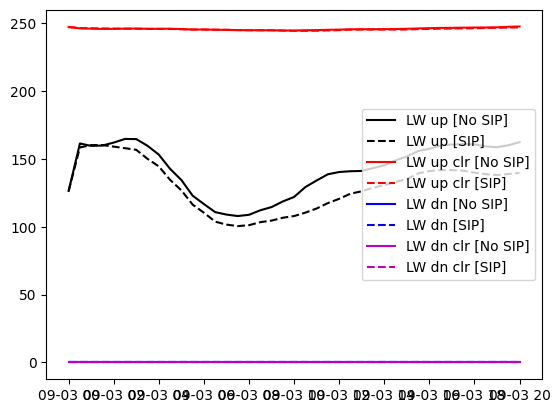

In [69]:
plt.plot(ds_nosip.time,toa_lw_up_nosip.mean('ncells'), 'k-', label='LW up [No SIP]')
plt.plot(ds_sip.time,toa_lw_up_sip.mean('ncells'), 'k--', label='LW up [SIP]')
plt.plot(ds_nosip.time,toa_lw_up_clr_nosip.mean('ncells'), 'r-', label='LW up clr [No SIP]')
plt.plot(ds_sip.time,toa_lw_up_clr_sip.mean('ncells'), 'r--', label='LW up clr [SIP]')
plt.plot(ds_nosip.time,toa_lw_dn_nosip.mean('ncells'), 'b-', label='LW dn [No SIP]')
plt.plot(ds_sip.time,toa_lw_dn_sip.mean('ncells'), 'b--', label='LW dn [SIP]')
plt.plot(ds_nosip.time,toa_lw_dn_clr_nosip.mean('ncells'), 'm-', label='LW dn clr [No SIP]')
plt.plot(ds_sip.time,toa_lw_dn_clr_sip.mean('ncells'), 'm--', label='LW dn clr [SIP]')
plt.legend()

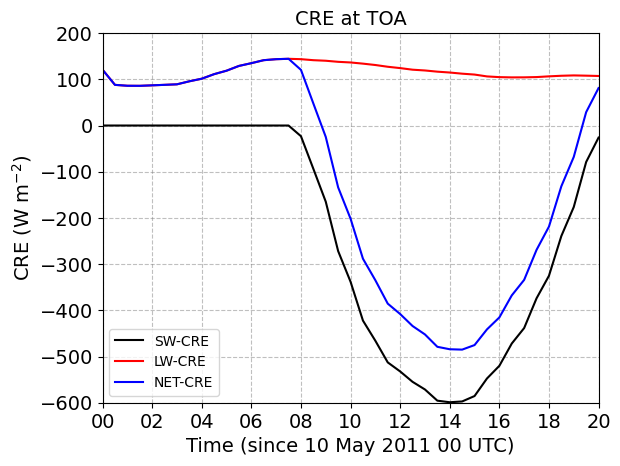

In [82]:
plt.plot(ds_sip.time, toa_cre_sw_sip.mean('ncells'), 'k-', label='SW-CRE')
plt.plot(ds_sip.time, toa_cre_lw_sip.mean('ncells'), 'r-', label='LW-CRE')
plt.plot(ds_sip.time, toa_net_cre_sip.mean('ncells'), 'b-', label='NET-CRE')
plt.xlabel('Time (since 10 May 2011 00 UTC)', fontsize=14)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0)  # Start at 00 UTC on 10 May 2011
end_date = datetime(2024, 9, 3, 20, 0)   # End at 12 UTC on 12 May 2011
plt.xlim(start_date, end_date)
plt.xticks(fontsize=14)
plt.ylim(-600,200)
plt.yticks(fontsize=14)
plt.ylabel('CRE (W m$^{-2}$)', fontsize=14)
plt.title('CRE at TOA', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', color='grey',alpha=0.5)

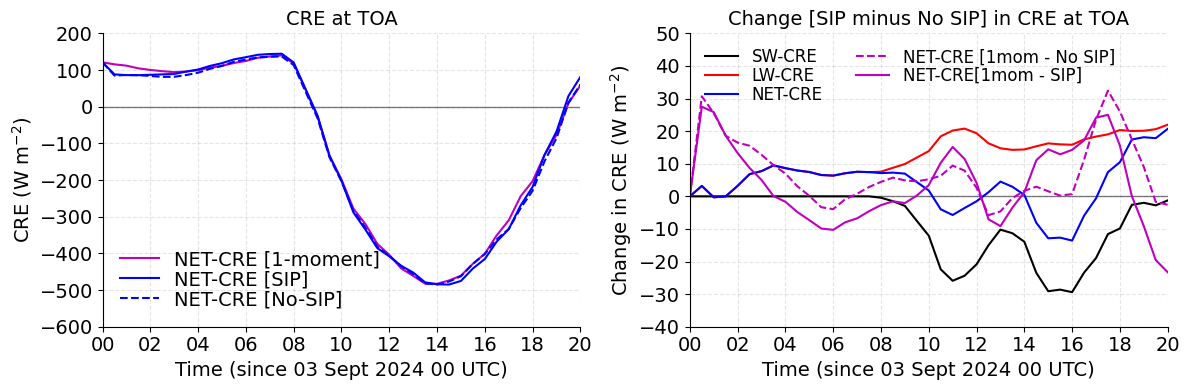

In [9]:

plt.figure(figsize=(12, 4))
linewidth=2
fontsize=14
plt.subplot(1,2,1)

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_1mom.time, toa_net_cre_1mom.mean('ncells'), 'm-', label='NET-CRE [1-moment]')
#plt.plot(ds_sip.time, toa_cre_sw_sip.mean('ncells'), 'k-', label='SW-CRE [SIP]')
#plt.plot(ds_sip.time, toa_cre_lw_sip.mean('ncells'), 'r-', label='LW-CRE [SIP]')
plt.plot(ds_sip.time, toa_net_cre_sip.mean('ncells'), 'b-', label='NET-CRE [SIP]')
#plt.plot(ds_sip.time, toa_cre_sw_nosip.mean('ncells'), 'k--', label='SW-CRE [No-SIP]')
#plt.plot(ds_sip.time, toa_cre_lw_nosip.mean('ncells'), 'r--', label='LW-CRE [No-SIP]')
plt.plot(ds_sip.time, toa_net_cre_nosip.mean('ncells'), 'b--', label='NET-CRE [No-SIP]')
plt.xlabel('Time (since 03 Sept 2024 00 UTC)', fontsize=14)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)   
plt.xlim(start_date, end_date)
plt.xticks(fontsize=14)
plt.ylim(-600,200)
plt.yticks(fontsize=14)
plt.ylabel('CRE (W m$^{-2}$)', fontsize=14)
plt.title('CRE at TOA', fontsize=14)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle='--', color='grey',alpha=0.2)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1,2,2)

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_sip.time, del_toa_sw_cre.mean('ncells'), 'k-', label='SW-CRE')
plt.plot(ds_sip.time, del_toa_lw_cre.mean('ncells'), 'r-', label='LW-CRE')
plt.plot(ds_sip.time, del_toa_net_cre.mean('ncells'), 'b-', label='NET-CRE')
plt.plot(ds_sip.time, toa_net_cre_1mom.mean('ncells')-toa_net_cre_nosip.mean('ncells'), 'm--', label='NET-CRE [1mom - No SIP]')
plt.plot(ds_sip.time, toa_net_cre_1mom.mean('ncells')-toa_net_cre_sip.mean('ncells'), 'm-', label='NET-CRE[1mom - SIP]')



plt.xlabel('Time (since 03 Sept 2024 00 UTC)', fontsize=14)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)  
plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-40,50)
plt.yticks(fontsize=fontsize)
plt.ylabel('Change in CRE (W m$^{-2}$)', fontsize=fontsize)
plt.title('Change [SIP minus No SIP] in CRE at TOA', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize-2, ncols=2, loc='upper left')
plt.grid(True, linestyle='--', color='grey',alpha=0.2)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [88]:

sw_up_sip = ds_sip.swflx_up
sw_up_clr_sip = ds_sip.swflx_up_clr
lw_up_sip = ds_sip.lwflx_up
lw_up_clr_sip = ds_sip.lwflx_up_clr

sw_dn_sip = ds_sip.swflx_dn
sw_dn_clr_sip = ds_sip.swflx_dn_clr
lw_dn_sip = ds_sip.lwflx_dn
lw_dn_clr_sip = ds_sip.lwflx_dn_clr

sw_up_nosip = ds_nosip.swflx_up
sw_up_clr_nosip = ds_nosip.swflx_up_clr
lw_up_nosip = ds_nosip.lwflx_up
lw_up_clr_nosip = ds_nosip.lwflx_up_clr

sw_dn_nosip = ds_nosip.swflx_dn
sw_dn_clr_nosip = ds_nosip.swflx_dn_clr
lw_dn_nosip = ds_nosip.lwflx_dn
lw_dn_clr_nosip = ds_nosip.lwflx_dn_clr

#CRE_sw = (Qcld_sw_dn - Qcld_sw_up) - (Qclear_sw_dn - Qclear_sw_up)

cre_sw_nosip = (sw_dn_nosip-sw_up_nosip) - (sw_dn_clr_nosip-sw_up_clr_nosip)
cre_sw_sip = (sw_dn_sip-sw_up_sip) - (sw_dn_clr_sip-sw_up_clr_sip)

cre_lw_nosip = (sw_dn_nosip-lw_up_nosip) - (sw_dn_clr_nosip-lw_up_clr_nosip)
cre_lw_sip = (lw_dn_sip-lw_up_sip) - (lw_dn_clr_sip-lw_up_clr_sip)

net_cre_nosip = cre_sw_nosip+cre_lw_nosip
net_cre_sip = cre_sw_sip+cre_lw_sip

del_sw_cre = cre_sw_sip-cre_sw_nosip
del_lw_cre = cre_lw_sip-cre_lw_nosip
del_net_cre = net_cre_sip-net_cre_nosip


In [ ]:

mean_cre_sw_sip = cre_sw_sip.mean(dim=('time','ncells'))
mean_cre_lw_sip = cre_lw_sip.mean(dim=('time','ncells'))
mean_cre_net_sip = net_cre_sip.mean(dim=('time','ncells'))

mean_cre_sw_nosip = cre_sw_nosip.mean(dim=('time','ncells'))
mean_cre_lw_nosip = cre_lw_nosip.mean(dim=('time','ncells'))
mean_cre_net_nosip = net_cre_nosip.mean(dim=('time','ncells'))

mean_tempc_sip = ds_sip.tempc.mean(dim=('time','ncells'))


mean_del_sw_cre = mean_cre_sw_sip-mean_cre_sw_nosip
mean_del_lw_cre = mean_cre_lw_sip-mean_cre_lw_nosip
mean_del_net_cre = mean_cre_net_sip-mean_cre_net_nosip

plt.figure(figsize=(12, 4))
linewidth=2
fontsize=14
plt.subplot(1,2,1)
plt.plot(mean_cre_sw_sip[:-1], mean_tempc_sip, 'k-', label='SW-CRE  [SIP]')
plt.plot(mean_cre_lw_sip[:-1], mean_tempc_sip, 'r-', label='LW-CRE [SIP]')
plt.plot(mean_cre_net_sip[:-1], mean_tempc_sip, 'b-', label='NET-CRE [SIP]')
plt.plot(mean_cre_sw_nosip[:-1], mean_tempc_sip, 'k--', label='SW-CRE  [No-SIP]')
plt.plot(mean_cre_lw_nosip[:-1], mean_tempc_sip, 'r--', label='LW-CRE [No-SIP]')
plt.plot(mean_cre_net_nosip[:-1],mean_tempc_sip, 'b--', label='NET-CRE [No-SIP]')

plt.xticks(fontsize=fontsize)
plt.xlim(-500,200)
plt.ylim(30,-60)
plt.yticks(fontsize=14)
plt.xlabel('CRE (W m$^{-2}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle='--', color='grey',alpha=0.5)

plt.subplot(1,2,2)
plt.plot(mean_del_sw_cre[:-1], mean_tempc_sip, 'k-', label='SW-CRE')
plt.plot(mean_del_lw_cre[:-1], mean_tempc_sip, 'r-', label='LW-CRE')
plt.plot(mean_del_net_cre[:-1], mean_tempc_sip, 'b-', label='NET-CRE')

#plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.xlim(-50,300)
plt.ylim(30,-60)
plt.yticks(fontsize=fontsize)
plt.xlabel('Change in CRE (W m$^{-2}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Change [SIP minus No SIP] in CRE', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper left')
plt.grid(True, linestyle='--', color='grey',alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3863367/1962754006.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')


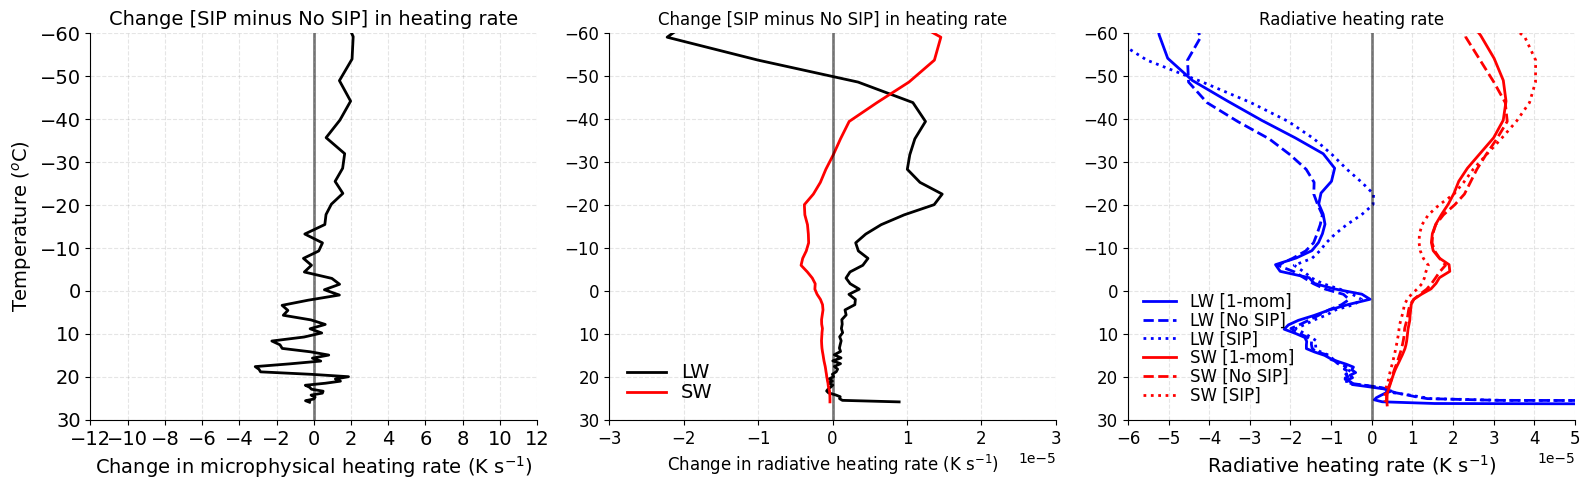

In [143]:
### Microphysical temperature tendency
mean_microph_ddt_1mom = ds_1mom.ddt_temp_gscp.mean(dim=('time','ncells'))
mean_microph_ddt_nosip = ds_nosip.ddt_temp_gscp.mean(dim=('time','ncells'))
mean_microph_ddt_sip = ds_sip.ddt_temp_gscp.mean(dim=('time','ncells'))

del_microph_ddt = mean_microph_ddt_sip-mean_microph_ddt_nosip

mean_tempc_1mom = ds_1mom.tempc.mean(dim=('time','ncells'))
mean_tempc_nosip = ds_nosip.tempc.mean(dim=('time','ncells'))
mean_tempc_sip = ds_sip.tempc.mean(dim=('time','ncells'))

### LW temperature tendency
mean_lw_ddt_1mom = ds_1mom.ddt_temp_radlw.mean(dim=('time','ncells'))
mean_lw_ddt_nosip = ds_nosip.ddt_temp_radlw.mean(dim=('time','ncells'))
mean_lw_ddt_sip = ds_sip.ddt_temp_radlw.mean(dim=('time','ncells'))

del_lw_ddt = mean_lw_ddt_sip-mean_lw_ddt_nosip

### SW temperature tendency
mean_sw_ddt_1mom = ds_1mom.ddt_temp_radsw.mean(dim=('time','ncells'))
mean_sw_ddt_nosip = ds_nosip.ddt_temp_radsw.mean(dim=('time','ncells'))
mean_sw_ddt_sip = ds_sip.ddt_temp_radsw.mean(dim=('time','ncells'))

del_sw_ddt = mean_sw_ddt_sip-mean_sw_ddt_nosip


fig, axes = plt.subplots(1, 3, figsize=(16, 5))

deg_faint_errbar = 0.6
lnwdth = 2
fontsize = 14

# Subplot 1: Change in microphysical heating/cooling rate
axes[0].plot(del_microph_ddt, mean_tempc_nosip, 'k-', label='', linewidth=lnwdth)

axes[0].axvline(x=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

axes[0].set_xlim(-12, 12)
axes[0].set_xticks([-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12])
axes[0].tick_params(axis='both', labelsize=fontsize)
axes[0].set_ylim(30, -60)
axes[0].set_yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60])
axes[0].set_xlabel('Change in microphysical heating rate (K s$^{-1}$)', fontsize=fontsize)
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_title('Change [SIP minus No SIP] in heating rate', fontsize=fontsize)
axes[0].legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
axes[0].grid(True, linestyle='--', alpha=0.2, color='grey')

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Subplot 2: Change in radiative heating/cooling rate
axes[1].plot(del_lw_ddt, mean_tempc_sip, 'k-', label='LW', linewidth=lnwdth)
axes[1].plot(del_sw_ddt, mean_tempc_sip, 'r-', label='SW', linewidth=lnwdth)
axes[1].axvline(x=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

axes[1].set_xlim(-3.e-5, 3.e-5)
axes[1].set_xticks([-3.e-5, -2.e-5, -1.e-5, 0, 1.e-5, 2.e-5, 3.e-5])
axes[1].set_ylim(30, -60)
#axes[1].set_yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60])
axes[1].tick_params(axis='both', labelsize=fontsize-2)
axes[1].set_xlabel('Change in radiative heating rate (K s$^{-1}$)', fontsize=fontsize-2)
#axes[1].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[1].set_title('Change [SIP minus No SIP] in heating rate', fontsize=fontsize-2)
axes[1].legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='lower left')
axes[1].grid(True, linestyle='--', alpha=0.2, color='grey')

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Subplot 3: Change in radiative heating/cooling rate
axes[2].plot(mean_lw_ddt_1mom, mean_tempc_1mom, 'b-', label='LW [1-mom]', linewidth=lnwdth)
axes[2].plot(mean_lw_ddt_nosip, mean_tempc_sip, 'b--', label='LW [No SIP]', linewidth=lnwdth)
axes[2].plot(mean_lw_ddt_sip, mean_tempc_sip, 'b:', label='LW [SIP]', linewidth=lnwdth)
axes[2].plot(mean_sw_ddt_1mom, mean_tempc_1mom, 'r-', label='SW [1-mom]', linewidth=lnwdth)
axes[2].plot(mean_sw_ddt_nosip, mean_tempc_sip, 'r--', label='SW [No SIP]', linewidth=lnwdth)
axes[2].plot(mean_sw_ddt_sip, mean_tempc_sip, 'r:', label='SW [SIP]', linewidth=lnwdth)
axes[2].axvline(x=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

axes[2].set_xlim(-6.e-5, 5.e-5)
axes[2].set_xticks([-6.e-5, -5.e-5, -4.e-5, -3.e-5, -2.e-5, -1.e-5, 0, 1.e-5, 2.e-5, 3.e-5, 4.e-5, 5.e-5])
axes[2].set_ylim(30, -60)
#axes[2].set_yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60])
axes[2].tick_params(axis='both', labelsize=fontsize-2)
axes[2].set_xlabel('Radiative heating rate (K s$^{-1}$)', fontsize=fontsize)
#axes[2].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[2].set_title('Radiative heating rate', fontsize=fontsize-2)
axes[2].legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize-2, loc='lower left')
axes[2].grid(True, linestyle='--', alpha=0.2, color='grey')

axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

plt.tight_layout()

plt.show()


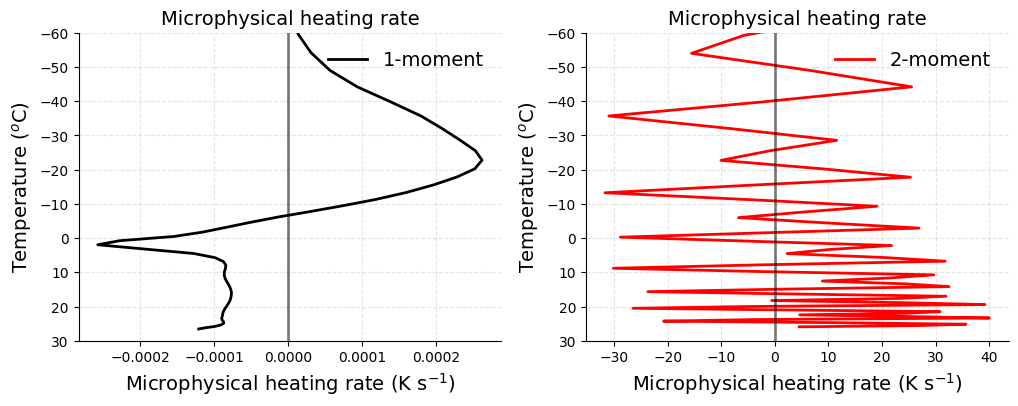

In [149]:

deg_faint_errbar = 0.6
lnwdth = 2
fontsize = 14


plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(ds_1mom.ddt_temp_gscp.mean(dim=('time','ncells')), ds_1mom.tempc.mean(dim=('time','ncells')), 'k-', label='1-moment', linewidth=lnwdth)

plt.axvline(x=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

#plt.xlim(-12, 12)
#plt.xticks([-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12])
plt.ylim(30, -60)
plt.yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60])
plt.xlabel('Microphysical heating rate (K s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Microphysical heating rate', fontsize=fontsize)
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.2, color='grey')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1,2,2)
plt.plot(ds_nosip.ddt_temp_gscp.mean(dim=('time','ncells')), ds_nosip.tempc.mean(dim=('time','ncells')), 'r-', label='2-moment', linewidth=lnwdth)

plt.axvline(x=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

#plt.xlim(-12, 12)
#plt.xticks([-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12])
plt.ylim(30, -60)
plt.yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60])
plt.xlabel('Microphysical heating rate (K s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Microphysical heating rate', fontsize=fontsize)
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.2, color='grey')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


In [14]:

#######
min_tempc_sip = ds_sip.tempc.min().values
max_tempc_sip = ds_sip.tempc.max().values

min_wvel_sip = ds_sip.w_vel.min().values
max_wvel_sip = ds_sip.w_vel.max().values

num_temp_bin = 20; num_w_bin = 20;

temp_bin = np.linspace(min_tempc_sip, max_tempc_sip, num_temp_bin+1)
wvel_bin = np.linspace(min_wvel_sip, max_wvel_sip, num_w_bin+1)
#######

#######
tempc_sip_flat = ds_sip.tempc.values.flatten()
wvel_sip_flat = ds_sip.w_vel.values.flatten()

qc_sip_flat = ds_sip.qc.values.flatten()
qi_sip_flat = ds_sip.qi.values.flatten()
qs_sip_flat = ds_sip.qs.values.flatten()
qg_sip_flat = ds_sip.qg.values.flatten()
qh_sip_flat = ds_sip.qh.values.flatten()
qr_sip_flat = ds_sip.qr.values.flatten()
tqi_sip_flat = ds_sip.tqi.values.flatten()
#######

hist_sip, temp_edges_sip, wvel_edges_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin))

#######
qc_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qc_sip_flat)[0]
qi_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qi_sip_flat)[0]
qs_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qs_sip_flat)[0]
qg_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qg_sip_flat)[0]
qh_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qh_sip_flat)[0]
qr_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qr_sip_flat)[0]
tqi_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = tqi_sip_flat)[0]
#######

#######
avg_qc_temp_w_sip = qc_sum_sip/hist_sip
avg_qc_temp_w_sip[avg_qc_temp_w_sip < 1.e-9] = np.nan

avg_qi_temp_w_sip = qi_sum_sip/hist_sip
avg_qi_temp_w_sip[avg_qi_temp_w_sip < 1.e-9] = np.nan

avg_qs_temp_w_sip = qs_sum_sip/hist_sip
avg_qs_temp_w_sip[avg_qs_temp_w_sip < 1.e-9] = np.nan

avg_qg_temp_w_sip = qg_sum_sip/hist_sip
avg_qg_temp_w_sip[avg_qg_temp_w_sip < 1.e-9] = np.nan

avg_qh_temp_w_sip = qh_sum_sip/hist_sip
avg_qh_temp_w_sip[avg_qh_temp_w_sip < 1.e-9] = np.nan

avg_qr_temp_w_sip = qr_sum_sip/hist_sip
avg_qr_temp_w_sip[avg_qr_temp_w_sip < 1.e-9] = np.nan

avg_tqi_temp_w_sip = tqi_sum_sip/hist_sip
avg_tqi_temp_w_sip[avg_tqi_temp_w_sip < 1.e-9] = np.nan
#######


/tmp/ipykernel_758819/3716124162.py:40: RuntimeWarning: invalid value encountered in divide
  avg_qc_temp_w_sip = qc_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:43: RuntimeWarning: invalid value encountered in divide
  avg_qi_temp_w_sip = qi_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:46: RuntimeWarning: invalid value encountered in divide
  avg_qs_temp_w_sip = qs_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:49: RuntimeWarning: invalid value encountered in divide
  avg_qg_temp_w_sip = qg_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:52: RuntimeWarning: invalid value encountered in divide
  avg_qh_temp_w_sip = qh_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:55: RuntimeWarning: invalid value encountered in divide
  avg_qr_temp_w_sip = qr_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:58: RuntimeWarning: invalid value encountered in divide
  avg_tqi_temp_w_sip = tqi_sum_sip/hist_sip


In [13]:

#######
min_tempc_nosip = ds_nosip.tempc.min().values
max_tempc_nosip = ds_nosip.tempc.max().values

min_wvel_nosip = ds_nosip.w_vel.min().values
max_wvel_nosip = ds_nosip.w_vel.max().values

num_temp_bin = 20; num_w_bin = 20;

temp_nosip_bin = np.linspace(min_tempc_nosip, max_tempc_nosip, num_temp_bin+1)
wvel_nosip_bin = np.linspace(min_wvel_nosip, max_wvel_nosip, num_w_bin+1)
#######

#######
tempc_nosip_flat = ds_nosip.tempc.values.flatten()
wvel_nosip_flat = ds_nosip.w_vel.values.flatten()

qc_nosip_flat = ds_nosip.qc.values.flatten()
qi_nosip_flat = ds_nosip.qi.values.flatten()
qs_nosip_flat = ds_nosip.qs.values.flatten()
qg_nosip_flat = ds_nosip.qg.values.flatten()
qh_nosip_flat = ds_nosip.qh.values.flatten()
qr_nosip_flat = ds_nosip.qr.values.flatten()
tqi_nosip_flat = ds_nosip.tqi.values.flatten()
#######

hist_nosip, temp_edges_nosip, wvel_edges_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin))

#######
qc_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qc_nosip_flat)[0]
qi_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qi_nosip_flat)[0]
qs_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qs_nosip_flat)[0]
qg_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qg_nosip_flat)[0]
qh_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qh_nosip_flat)[0]
qr_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qr_nosip_flat)[0]
tqi_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = tqi_nosip_flat)[0]
#######

#######
avg_qc_temp_w_nosip = qc_sum_nosip/hist_nosip
avg_qc_temp_w_nosip[avg_qc_temp_w_nosip < 1.e-9] = np.nan

avg_qi_temp_w_nosip = qi_sum_nosip/hist_nosip
avg_qi_temp_w_nosip[avg_qi_temp_w_nosip < 1.e-9] = np.nan

avg_qs_temp_w_nosip = qs_sum_nosip/hist_nosip
avg_qs_temp_w_nosip[avg_qs_temp_w_nosip < 1.e-9] = np.nan

avg_qg_temp_w_nosip = qg_sum_nosip/hist_nosip
avg_qg_temp_w_nosip[avg_qg_temp_w_nosip < 1.e-9] = np.nan

avg_qh_temp_w_nosip = qh_sum_nosip/hist_nosip
avg_qh_temp_w_nosip[avg_qh_temp_w_nosip < 1.e-9] = np.nan

avg_qr_temp_w_nosip = qr_sum_nosip/hist_nosip
avg_qr_temp_w_nosip[avg_qr_temp_w_nosip < 1.e-9] = np.nan

avg_tqi_temp_w_nosip = tqi_sum_nosip/hist_nosip
avg_tqi_temp_w_nosip[avg_tqi_temp_w_nosip < 1.e-9] = np.nan
#######


/tmp/ipykernel_758819/67448993.py:40: RuntimeWarning: invalid value encountered in divide
  avg_qc_temp_w_nosip = qc_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:43: RuntimeWarning: invalid value encountered in divide
  avg_qi_temp_w_nosip = qi_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:46: RuntimeWarning: invalid value encountered in divide
  avg_qs_temp_w_nosip = qs_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:49: RuntimeWarning: invalid value encountered in divide
  avg_qg_temp_w_nosip = qg_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:52: RuntimeWarning: invalid value encountered in divide
  avg_qh_temp_w_nosip = qh_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:55: RuntimeWarning: invalid value encountered in divide
  avg_qr_temp_w_nosip = qr_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:58: RuntimeWarning: invalid value encountered in divide
  avg_tqi_temp_w_nosip = tqi_sum_nosip/hist_nosip


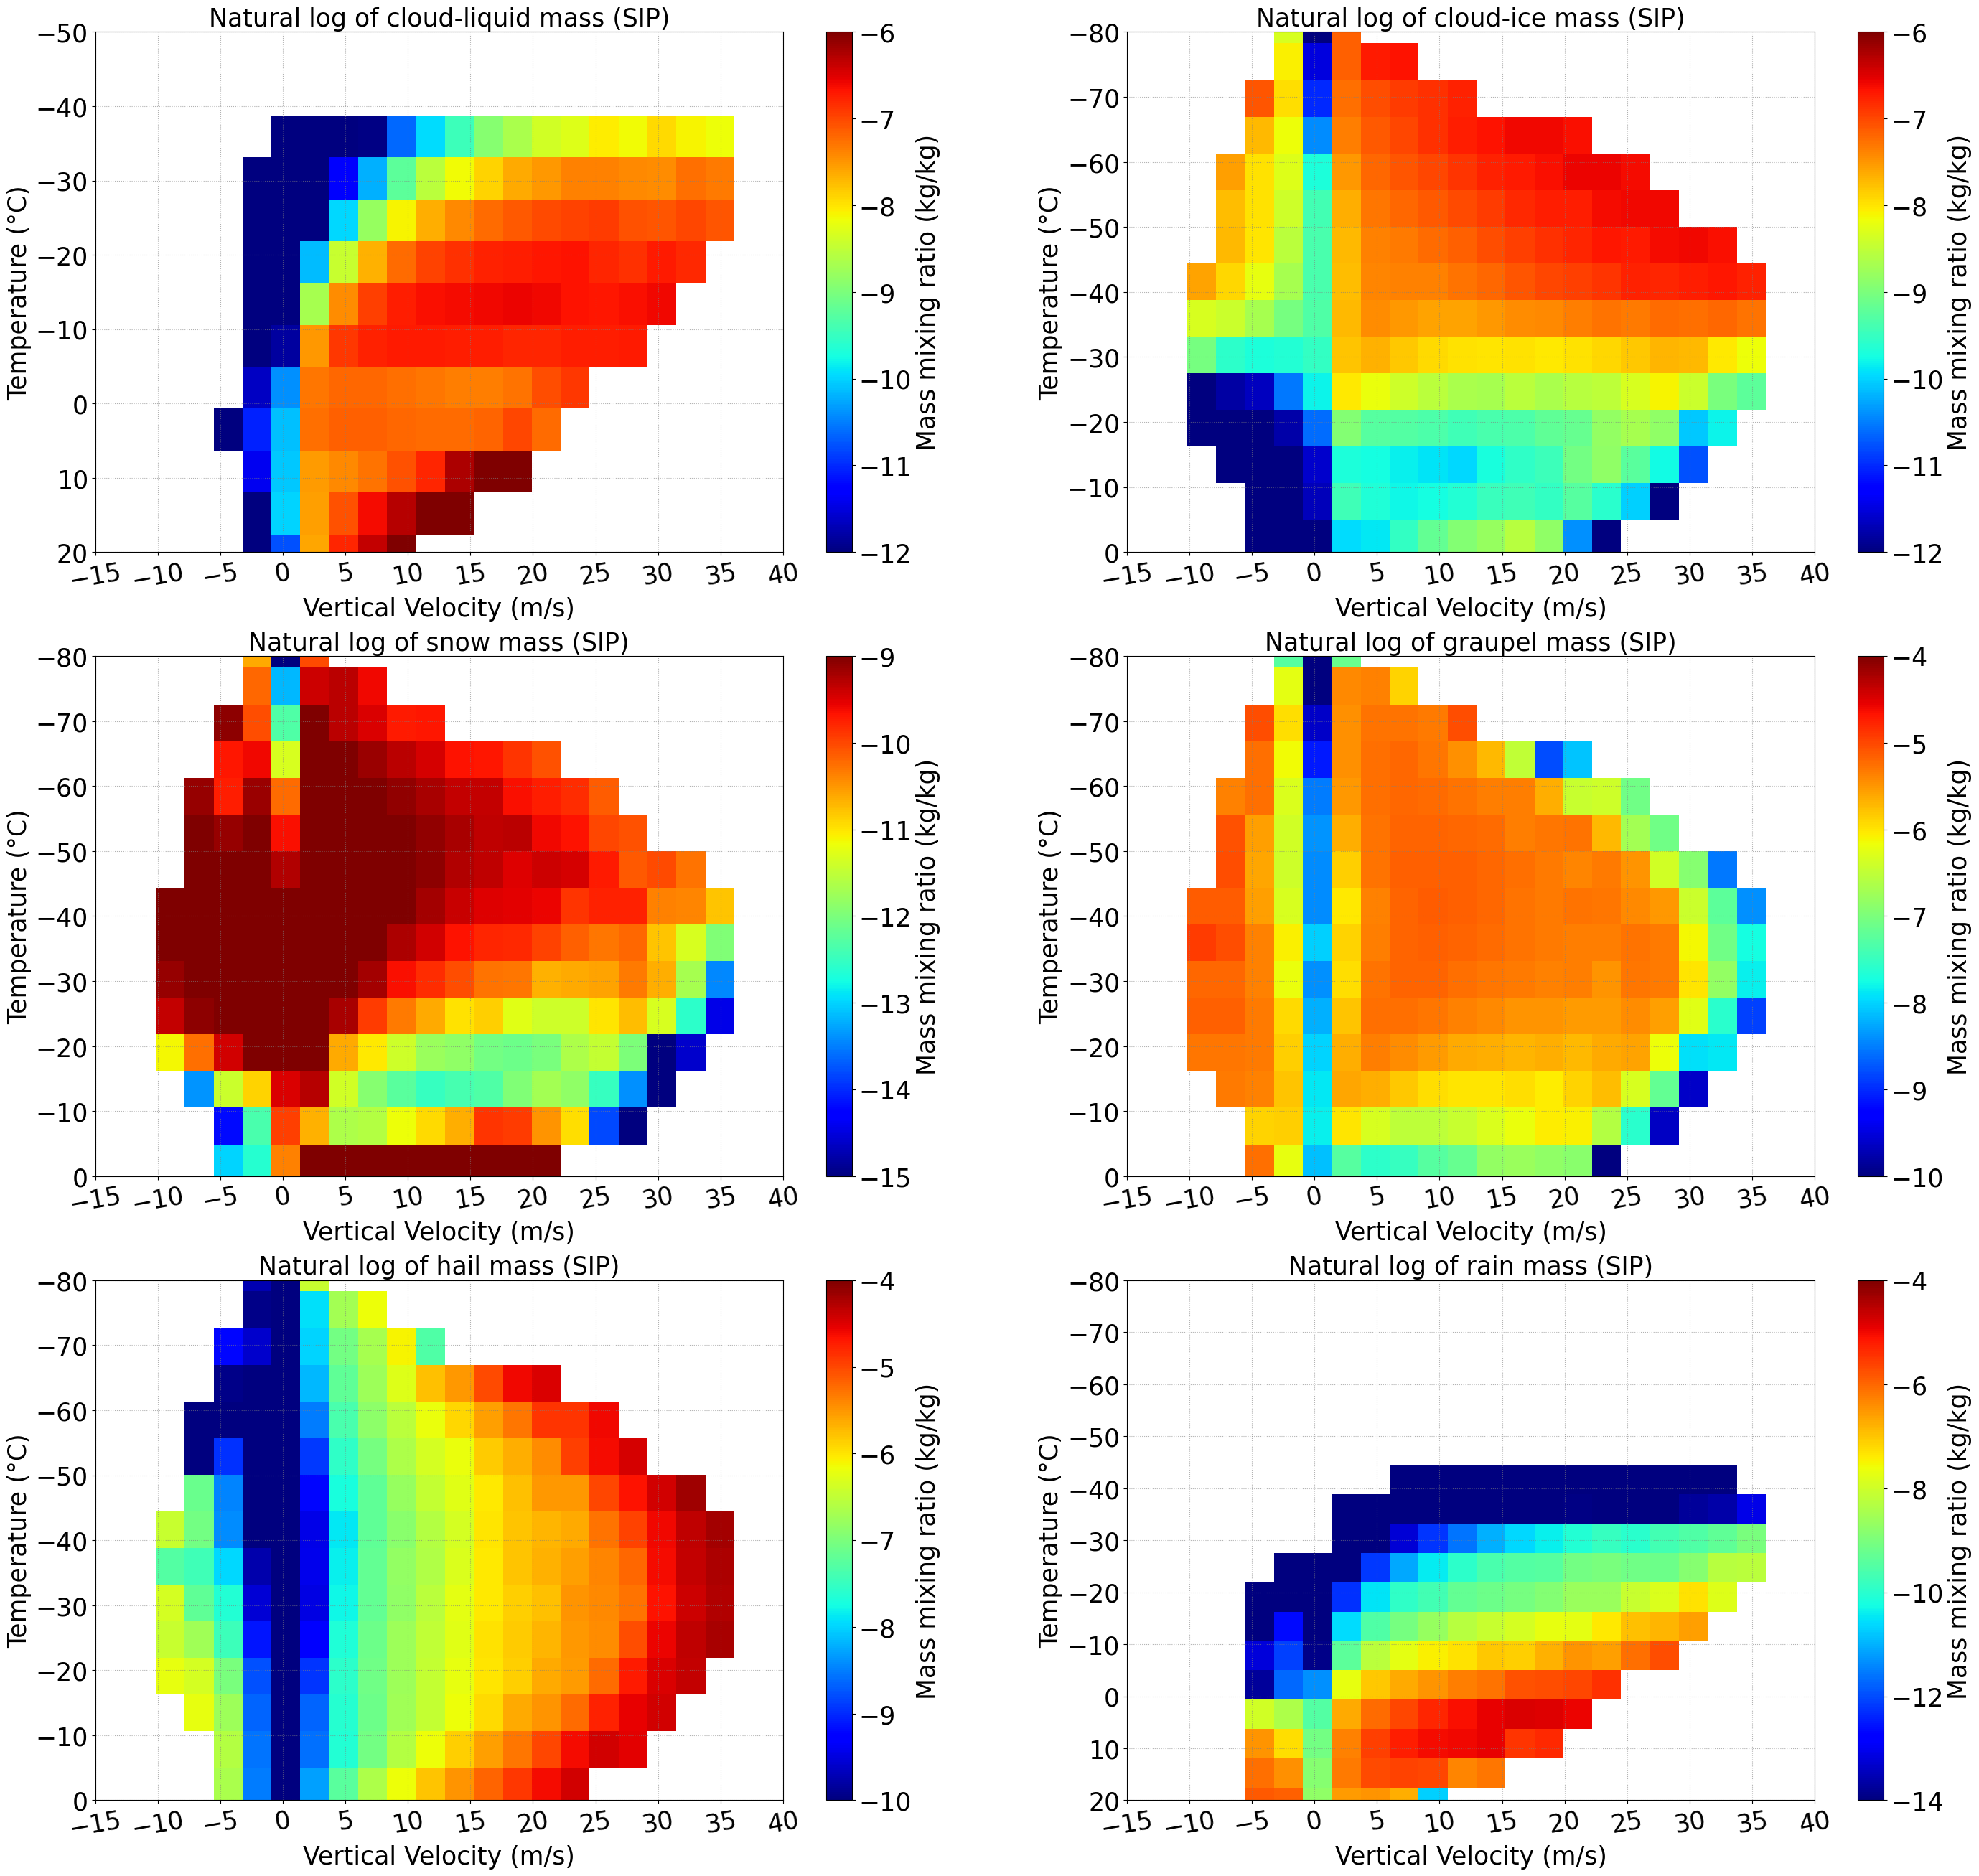

In [20]:


fontsize = 25;
rotation=10

plt.figure(figsize=(34, 32))
plt.subplot(3,2,1)
contour=plt.imshow(np.log(avg_qc_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-12, vmax=-6, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(20, -50)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of cloud-liquid mass (SIP)', fontsize=fontsize)

plt.subplot(3,2,2)
contour=plt.imshow(np.log(avg_qi_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-12, vmax=-6, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of cloud-ice mass (SIP)', fontsize=fontsize)
#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,3)
contour=plt.imshow(np.log(avg_qs_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-15, vmax=-9, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of snow mass (SIP)', fontsize=fontsize)

plt.subplot(3,2,4)
contour=plt.imshow(np.log(avg_qg_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-10, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of graupel mass (SIP)', fontsize=fontsize)

#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,5)
contour=plt.imshow(np.log(avg_qh_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-10, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of hail mass (SIP)', fontsize=fontsize)

plt.subplot(3,2,6)
contour=plt.imshow(np.log(avg_qr_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-14, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(20, -80)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of rain mass (SIP)', fontsize=fontsize)

plt.show()


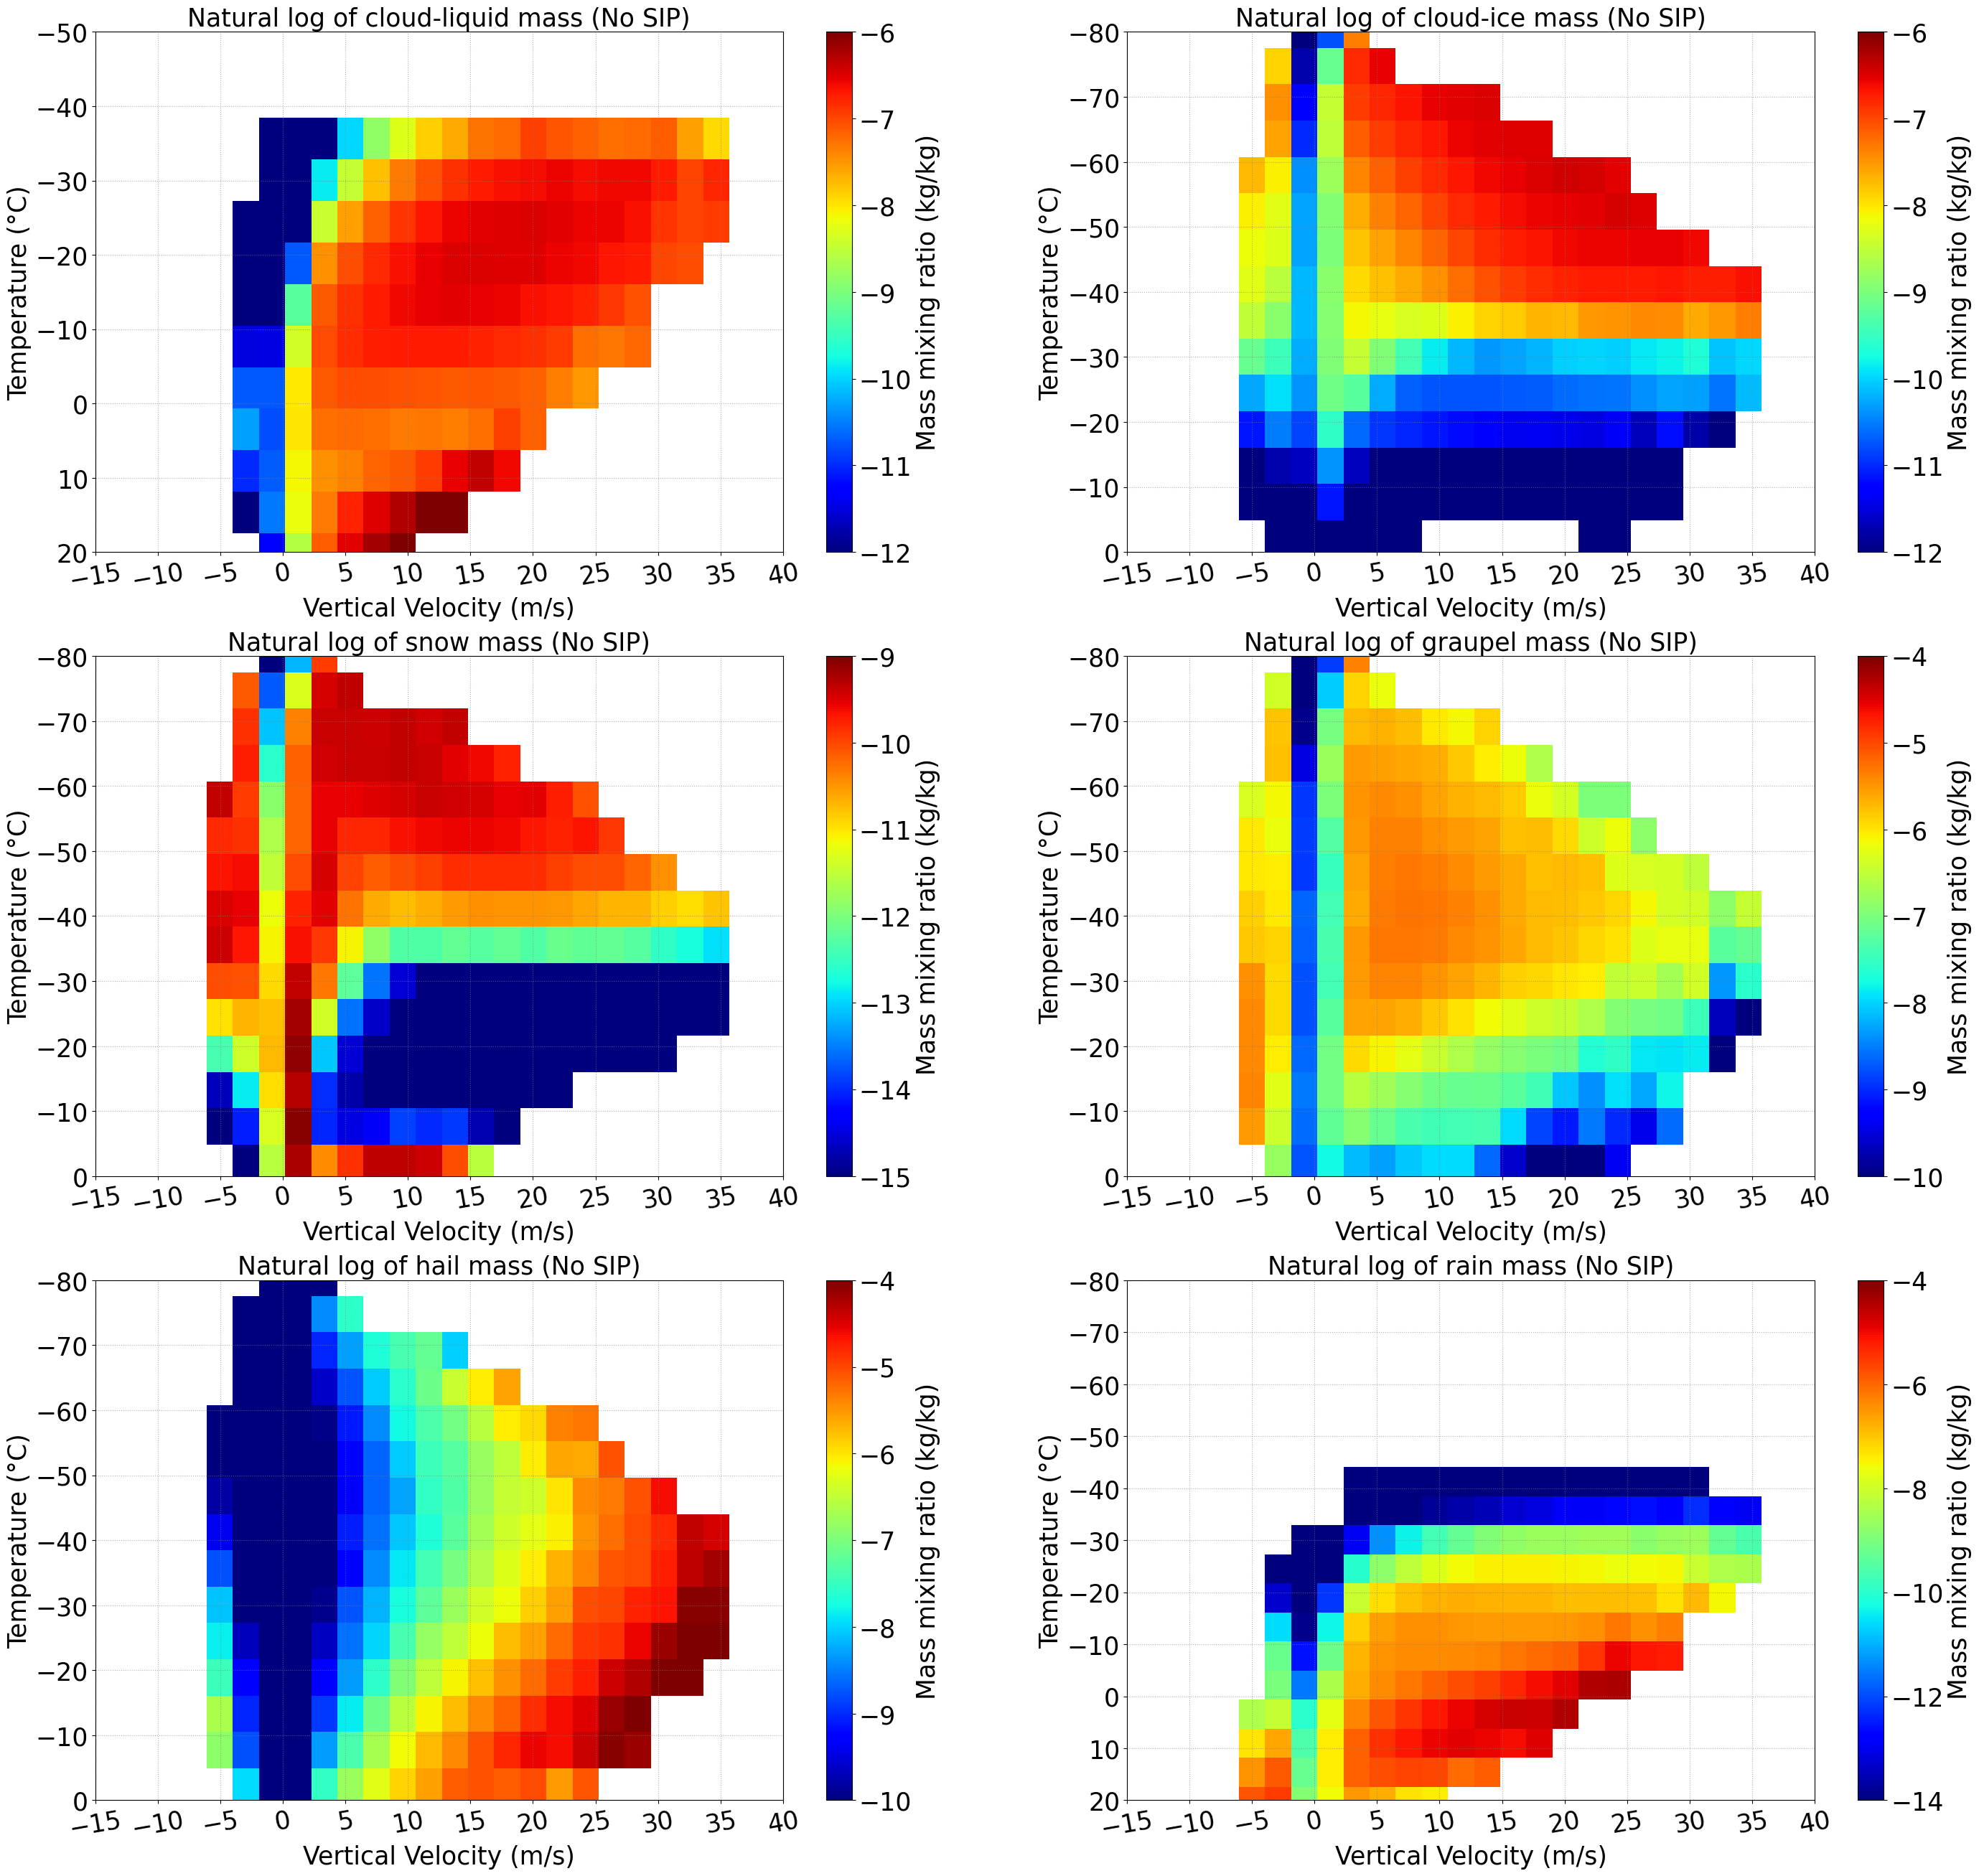

In [22]:


fontsize = 25;
rotation=10

plt.figure(figsize=(34, 32))
plt.subplot(3,2,1)
contour=plt.imshow(np.log(avg_qc_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-12, vmax=-6, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(20, -50)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of cloud-liquid mass (No SIP)', fontsize=fontsize)

plt.subplot(3,2,2)
contour=plt.imshow(np.log(avg_qi_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-12, vmax=-6, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of cloud-ice mass (No SIP)', fontsize=fontsize)
#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,3)
contour=plt.imshow(np.log(avg_qs_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-15, vmax=-9, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of snow mass (No SIP)', fontsize=fontsize)

plt.subplot(3,2,4)
contour=plt.imshow(np.log(avg_qg_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-10, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of graupel mass (No SIP)', fontsize=fontsize)

#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,5)
contour=plt.imshow(np.log(avg_qh_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-10, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of hail mass (No SIP)', fontsize=fontsize)

plt.subplot(3,2,6)
contour=plt.imshow(np.log(avg_qr_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-14, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(20, -80)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of rain mass (No SIP)', fontsize=fontsize)

plt.show()


In [315]:
#### CFAD plots


tempc = ds_sip['tempc'];
ht_km = 1.e-3 * ds_sip['z_mc'];
tempc_avg = tempc.mean(dim=('time', 'ncells'));
ht_avg = ht_km.mean(dim=('time','ncells'));

lwc_sip = ds_sip['lwc_gperm3'];
lwc_sip_filt = xr.where(ds_sip.lwc_gperm3 > 0., ds_sip.lwc_gperm3, np.nan);

lwc_sip_bins = np.linspace(lwc_sip_filt.min().values, lwc_sip_filt.max().values, 20);
cfad_lwc_sip = np.zeros((len(lwc_sip_bins) - 1, len(ht_avg)));
lwc_sip_values = lwc_sip_filt.values;

for i in range(len(lwc_sip_bins) - 1):
    mask = (lwc_sip_values >= lwc_sip_bins[i]) & (lwc_sip_values < lwc_sip_bins[i + 1])    
    cfad_lwc_sip[i, :] = np.sum(mask, axis=(0,2)) / len(ds_sip.time)


In [316]:

tiwc_sip = ds_sip['tiwc_gperm3'];
tiwc_sip_filt = xr.where(ds_sip.tiwc_gperm3 > 0., ds_sip.tiwc_gperm3, np.nan);

tiwc_sip_bins = np.linspace(tiwc_sip_filt.min().values, tiwc_sip_filt.max().values, 20);
cfad_tiwc_sip = np.zeros((len(tiwc_sip_bins) - 1, len(ht_avg)));
tiwc_sip_values = tiwc_sip_filt.values;

for i in range(len(tiwc_sip_bins) - 1):
    mask = (tiwc_sip_values >= tiwc_sip_bins[i]) & (tiwc_sip_values < tiwc_sip_bins[i + 1])    
    cfad_tiwc_sip[i, :] = np.sum(mask, axis=(0,2)) / len(ds_sip.time)



In [331]:
print(ds_sip.cdnc_percm3.min().values)
print(ds_sip.cdnc_percm3.max().values)

0.0
269.1216


In [336]:
print(cdnc_sip_bins)

[  0.          14.1642954   28.32859079  42.49288619  56.65718159
  70.82147699  84.98577238  99.15006778 113.31436318 127.47865858
 141.64295397 155.80724937 169.97154477 184.13584016 198.30013556
 212.46443096 226.62872636 240.79302175 254.95731715 269.12161255]


In [350]:

tempc = ds_sip['tempc'];
ht_km = 1.e-3 * ds_sip['z_mc'];
tempc_avg = tempc.mean(dim=('time', 'ncells'));
ht_avg = ht_km.mean(dim=('time','ncells'));

cdnc_sip = ds_sip['cdnc_percm3'];
cdnc_sip_filt = xr.where(ds_sip.cdnc_percm3 > 0., ds_sip.cdnc_percm3, np.nan);

cdnc_sip_bins = np.linspace(cdnc_sip_filt.min().values, cdnc_sip_filt.max().values, 20);
cfad_cdnc_sip = np.zeros((len(cdnc_sip_bins) - 1, len(ht_avg)));
cdnc_sip_values = cdnc_sip_filt.values;

for i in range(len(cdnc_sip_bins) - 1):
    mask = (cdnc_sip_values >= cdnc_sip_bins[i]) & (cdnc_sip_values < cdnc_sip_bins[i + 1])    
    cfad_cdnc_sip[i, :] = np.sum(mask, axis=(0,2)) / len(ds_sip.time)

(30.0, -60.0)

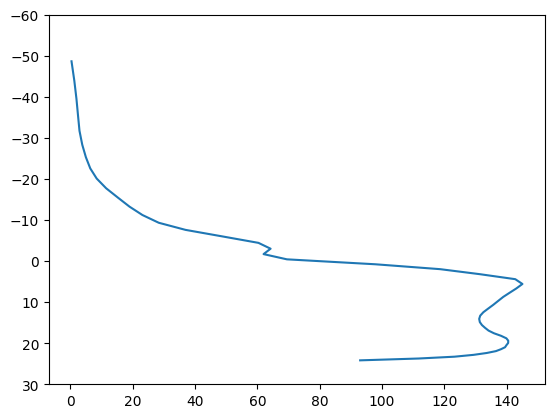

In [374]:

filt_qnc = xr.where((ds_sip.cdnc_percm3 > 0.) & (ds_sip.w_vel > 1.), ds_sip.cdnc_percm3, np.nan)

plt.plot(filt_qnc.mean(dim=('time','ncells')), ds_sip.tempc.mean(dim=('time','ncells')))
plt.ylim(30,-60)

In [352]:

cdnc_sip = ds_sip['cdnc_percm3'];
cdnc_sip_filt = xr.where(ds_sip.cdnc_percm3 > 0., ds_sip.cdnc_percm3, np.nan);

cdnc_sip_bins = np.linspace(ds_sip.cdnc_percm3.min().values, ds_sip.cdnc_percm3.max().values, 50);
cfad_cdnc_sip = np.zeros((len(cdnc_sip_bins) - 1, len(ht_avg)));
cdnc_sip_values = ds_sip.cdnc_percm3.values;

for i in range(len(cdnc_sip_bins) - 1):
    mask = (cdnc_sip_values >= cdnc_sip_bins[i]) & (cdnc_sip_values < cdnc_sip_bins[i + 1])    
    cfad_cdnc_sip[i, :] = np.sum(mask, axis=(0,2)) / len(ds_sip.time)
    

In [361]:

tinc_sip = ds_sip.inc_perl;
tinc_sip_filt = xr.where(ds_sip.inc_perl > 0., ds_sip.inc_perl, np.nan);
tinc_sip_bins = np.linspace(tinc_sip_filt.min().values, tinc_sip_filt.max().values, 40)

cfad_tinc_sip = np.zeros((len(tinc_sip_bins) - 1, len(ht_avg)))

tinc_sip_values = tinc_sip_filt.values  # shape (time, height, ncells)

# Loop through the tinc bins
for i in range(len(tinc_sip_bins) - 1):
    # Create a mask that selects the values within the current bin range
    mask = (tinc_sip_values >= tinc_sip_bins[i]) & (tinc_sip_values < tinc_sip_bins[i + 1])
    
    # Sum the mask along the 'time' (axis=0) and 'ncells' (axis=2) dimensions, keeping the height (axis=1)
    cfad_tinc_sip[i, :] = np.sum(mask, axis=(0, 2)) / len(ds_sip.time)

In [290]:

refl_sip = ds_sip['dbz'];
refl_sip_filt = xr.where(ds_sip.dbz > -50., ds_sip.dbz, np.nan);
refl_sip_filt_avg = refl_sip_filt.mean(dim='time');

refl_sip_bins = np.linspace(refl_sip_filt.min().values, refl_sip_filt.max().values, 50);
cfad_refl_sip = np.zeros((len(refl_sip_bins) - 1, len(ht_avg)));
refl_sip_values = refl_sip_filt.values;

for i in range(len(refl_sip_bins) - 1):
    mask = (refl_sip_values >= refl_sip_bins[i]) & (refl_sip_values < refl_sip_bins[i + 1])    
    cfad_refl_sip[i, :] = np.sum(mask, axis=(0, 2)) / len(ds_sip.time)



In [309]:

wvel_sip = ds_sip['w_vel'];
wvel_sip_filt = xr.where(np.abs(ds_sip.w_vel) < 60., ds_sip.w_vel, np.nan);

wvel_sip_bins = np.linspace(wvel_sip_filt.min().values, wvel_sip_filt.max().values, 10);
cfad_wvel_sip = np.zeros((len(wvel_sip_bins) - 1, len(ht_avg)));
wvel_sip_values = wvel_sip_filt.values;

for i in range(len(wvel_sip_bins) - 1):
    mask = (wvel_sip_values >= wvel_sip_bins[i]) & (wvel_sip_values <= wvel_sip_bins[i + 1])    
    cfad_wvel_sip[i, :] = np.sum(mask, axis=(0, 2)) / len(ds_sip.time)



In [305]:
print(wvel_sip_bins)

[-10.18049526  -5.0421185    0.09625827   5.23463504  10.3730118
  15.51138857  20.64976533  25.7881421   30.92651886  36.06489563]


In [302]:
print(wvel_sip_bins)

[-10.18049526  -5.55595617  -0.93141708   3.69312201   8.31766109
  12.94220018  17.56673927  22.19127836  26.81581745  31.44035654
  36.06489563]


In [379]:
print(ht_avg.values)

[2.0700926e+01 1.8707630e+01 1.7459837e+01 1.6432219e+01 1.5538088e+01
 1.4738070e+01 1.4009794e+01 1.3338899e+01 1.2715508e+01 1.2132399e+01
 1.1584106e+01 1.1066360e+01 1.0575746e+01 1.0109476e+01 9.6652365e+00
 9.2410746e+00 8.8353434e+00 8.4466105e+00 8.0736399e+00 7.7153478e+00
 7.3707871e+00 7.0391073e+00 6.7195578e+00 6.4114618e+00 6.1142201e+00
 5.8272796e+00 5.5501485e+00 5.2823749e+00 5.0235476e+00 4.7732930e+00
 4.5312686e+00 4.2971573e+00 4.0706716e+00 3.8515470e+00 3.6395345e+00
 3.4344137e+00 3.2359767e+00 3.0440290e+00 2.8583987e+00 2.6789262e+00
 2.5054605e+00 2.3378699e+00 2.1760328e+00 2.0198364e+00 1.8691847e+00
 1.7239914e+00 1.5841790e+00 1.4496853e+00 1.3204583e+00 1.1964580e+00
 1.0776585e+00 9.6404749e-01 8.5562992e-01 7.5242615e-01 6.5447932e-01
 5.6185573e-01 4.7465226e-01 3.9300293e-01 3.1709218e-01 2.4717167e-01
 1.8359199e-01 1.2685774e-01 7.7744730e-02 3.7606236e-02 1.0000001e-02]


In [384]:


cdnc_sip = ds_sip['cdnc_percm3'];
cdnc_sip_filt = xr.where(ds_sip.cdnc_percm3 > 0., ds_sip.cdnc_percm3, np.nan);

cdnc_sip_bins = np.linspace(cdnc_sip.min().values, cdnc_sip.max().values, 5);
cfad_cdnc_sip = np.zeros((len(cdnc_sip_bins) - 1, len(ht_avg)));
cdnc_sip_values = cdnc_sip.values;

for i in range(len(cdnc_sip_bins) - 1):
    mask = (cdnc_sip_values >= cdnc_sip_bins[i]) & (cdnc_sip_values < cdnc_sip_bins[i + 1])    
    cfad_cdnc_sip[i, :] = np.sum(mask, axis=(0,2)) / len(ds_sip.time)
    

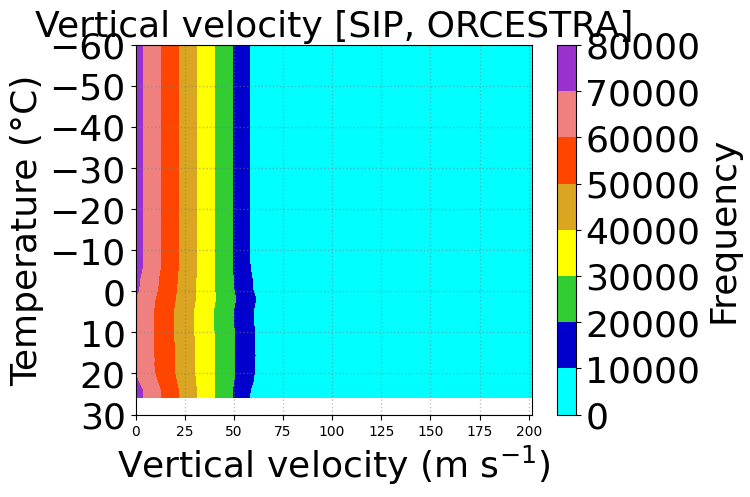

In [386]:

contour = plt.contourf(cdnc_sip_bins[:-1], tempc_avg, cfad_cdnc_sip.T,  cmap=cmap)  
#plt.xlim(-10, 5)
#plt.xticks([-3, -2, -1, 0., 1, 2, 3], rotation=rotation, fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Vertical velocity (m s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Vertical velocity [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)


In [ ]:

plt.plot(ds_nosip.cdnc_percm3.mean(dim=('time','ncells')), ds_nosip.tempc.mean(dim=('time','ncells')))
plt.ylim(30,-60)

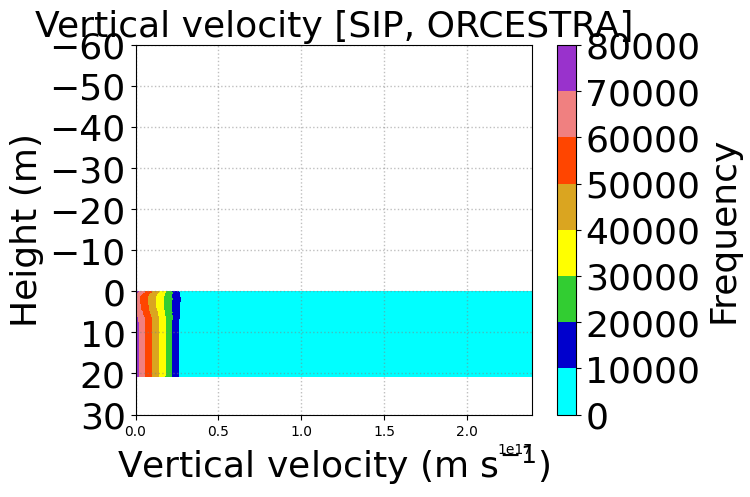

In [370]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

cdnc_sip = ds_sip['cdnc_percm3']
cdnc_sip_filt = xr.where(ds_sip.cdnc_percm3 > 0., ds_sip.cdnc_percm3, np.nan)

# Create bins for cdnc_sip
cdnc_sip_bins = np.linspace(ds_sip.cdnc_percm3.min().values, ds_sip.cdnc_percm3.max().values, 10)
cfad_cdnc_sip = np.zeros((len(cdnc_sip_bins) - 1, len(ht_avg)))

# Convert to numpy for easier manipulation
cdnc_sip_values = ds_sip.cdnc_percm3.values

# Loop through each bin of CDNC
for i in range(len(cdnc_sip_bins) - 1):
    # Create a mask for CDNC values within the current bin
    mask = (cdnc_sip_values >= cdnc_sip_bins[i]) & (cdnc_sip_values < cdnc_sip_bins[i + 1])
    
    # Sum over the time and ncells axes for each height, and normalize by time length
    cfad_cdnc_sip[i, :] = np.sum(mask, axis=(0, 2)) / len(ds_sip.time)

# Create the plot
contour = plt.contourf(cdnc_sip_bins[:-1], ht_avg, cfad_cdnc_sip.T, cmap=cmap)
plt.ylim(30, -60.)  # adjust y-axis limits
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
plt.xlabel('Vertical velocity (m s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Height (m)', fontsize=fontsize)  # Assuming you want 'Height' on the y-axis
cbar = plt.colorbar(contour, label='Frequency', orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Vertical velocity [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)

# Show the plot
plt.show()


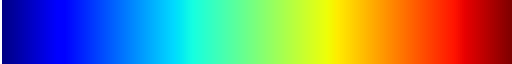

In [123]:
cmap_new

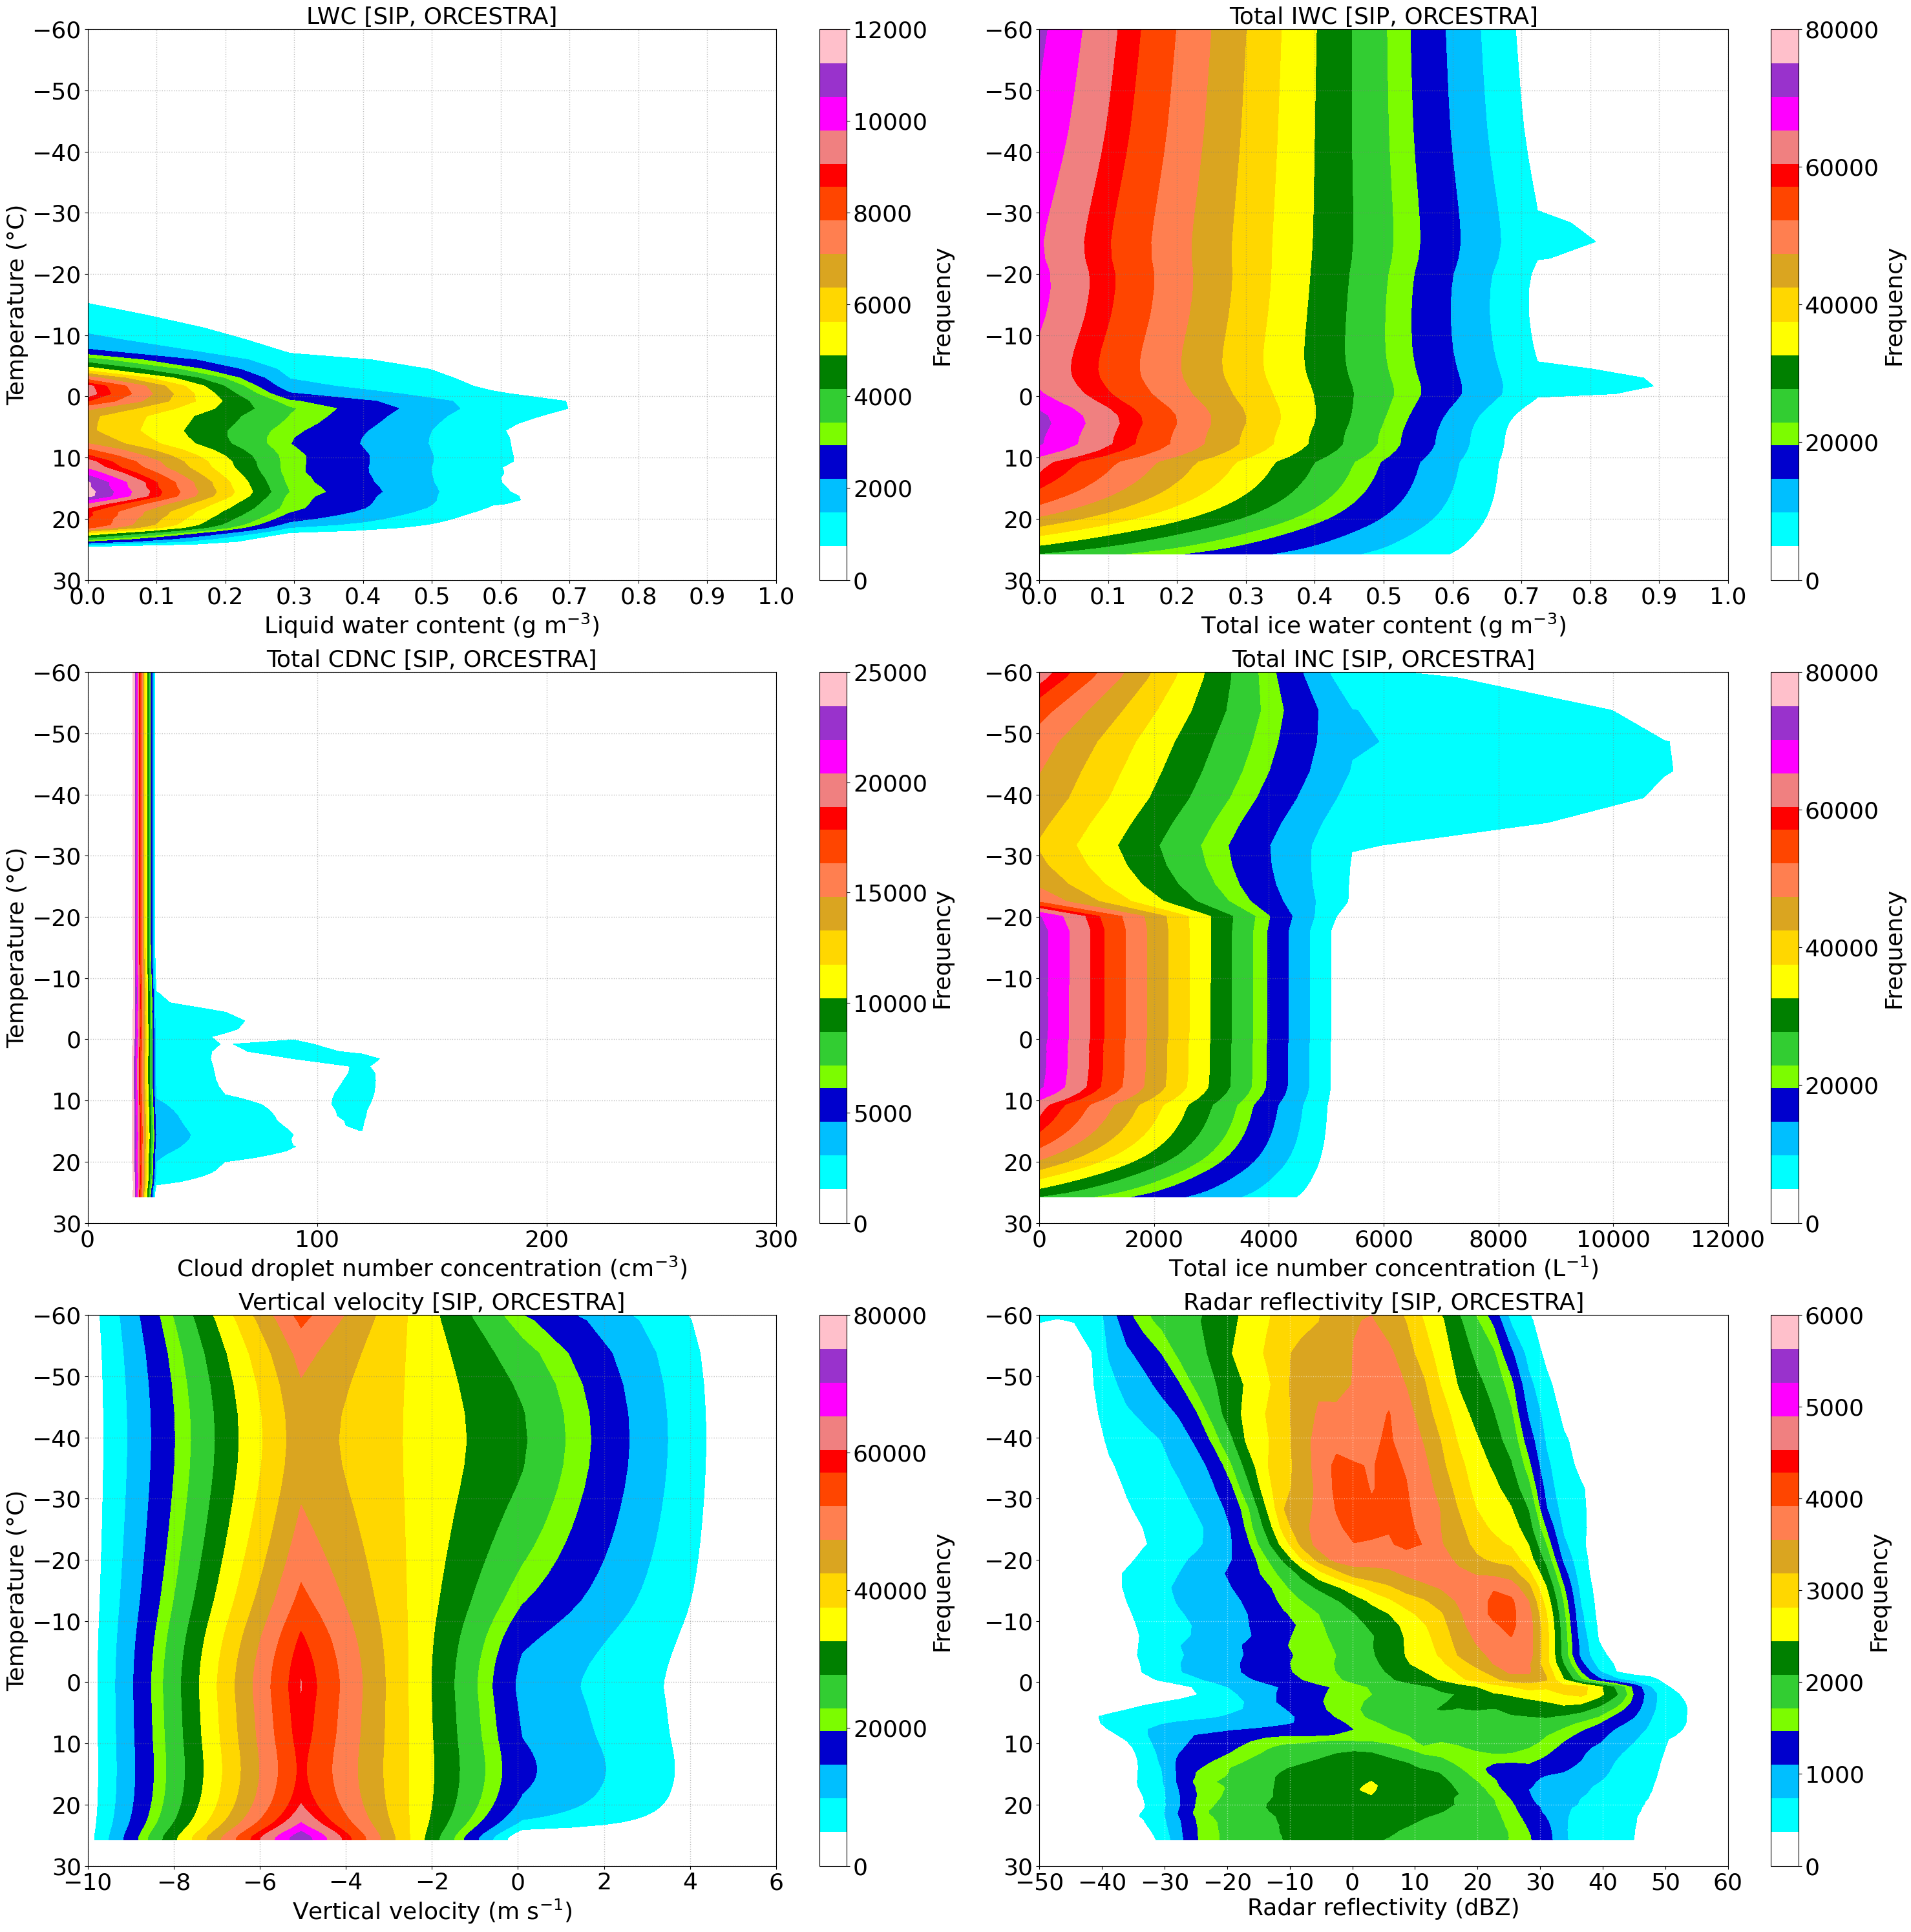

In [364]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#cmap = plt.cm.jet
#cmap_new = mcolors.ListedColormap(['white'] + [cmap(i) for i in range(1, cmap.N)])

fontsize = 26.;
linewidth = 1.
rotation=0
#cmap = mcolors.ListedColormap(['white', 'blue', 'green', 'yellow', 'red', 'purple'])
lev_lwc = np.linspace(0., 12000, 50)
lev_tiwc = np.linspace(0., 80000, 50)
lev_cdnc = np.linspace(0., 25000, 50)
lev_tinc = np.linspace(0., 80000, 50)
lev_wvel = np.linspace(0., 80000, 50)
lev_refl = np.linspace(0., 6000, 50)

#cfad[cfad < 0.0005]=np.nan

colors = ['white', 'cyan', 'deepskyblue', 'mediumblue', 'lawngreen', 'limegreen', 'green', 'yellow', 'gold', 'goldenrod', 
          'coral', 'orangered', 'red', 'lightcoral', 'magenta', 'darkorchid', 'pink']

cmap = ListedColormap(colors)

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
contour = plt.contourf(lwc_sip_bins[:-1], tempc_avg, cfad_lwc_sip.T, vmin=0, vmax=12000, levels=lev_lwc, cmap=cmap)  
#plt.xscale('log')
#plt.xlim(1.e-3, 1.e0)
#plt.xticks([1.e-3, 1.e-2, 1.e-1, 1.e0], fontsize=fontsize)
plt.xlim(0, 1.)
plt.xticks([0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=fontsize)

plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Liquid water content (g m$^{-3}$)', fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 2000, 4000, 6000, 8000, 10000, 12000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('LWC [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)

plt.subplot(3, 2, 2)
contour = plt.contourf(tiwc_sip_bins[:-1], tempc_avg, cfad_tiwc_sip.T, vmin=0, vmax=80000, levels=lev_tiwc, cmap=cmap)  
plt.xlim(0, 1.)
plt.xticks([0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Total ice water content (g m$^{-3}$)', fontsize=fontsize)
#plt.ylabel('Height (km)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 20000, 40000, 60000, 80000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Total IWC [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)

plt.subplot(3, 2, 3)
contour = plt.contourf(cdnc_sip_bins[:-1], tempc_avg, cfad_cdnc_sip.T, vmin=0, vmax=25000, levels=lev_cdnc, cmap=cmap)  
#plt.xscale('log')
plt.xlim(0., 300)
plt.xticks([0, 100, 200, 300], fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Cloud droplet number concentration (cm$^{-3}$)', fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 5000, 10000, 15000, 20000, 25000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Total CDNC [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)


plt.subplot(3, 2, 4)
contour = plt.contourf(tinc_sip_bins[:-1], tempc_avg, cfad_tinc_sip.T, vmin=0, vmax=80000, levels=lev_tinc, cmap=cmap)  
#plt.xscale('log')
#plt.xlim(1.e-12, 1.e4)
plt.xlim(0., 12000)
plt.xticks([0, 2.e3, 4.e3, 6.e3, 8.e3, 1.e4, 1.2e4], fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Height (km)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 20000, 40000, 60000, 80000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Total INC [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)


plt.subplot(3, 2, 5)
contour = plt.contourf(wvel_sip_bins[:-1], tempc_avg, cfad_wvel_sip.T, vmin=0., vmax=80000, levels=lev_wvel, cmap=cmap)  
plt.xlim(-10, 6)
plt.xticks([-10, -8, -6, -4, -2, 0., 2, 4, 6], rotation=rotation, fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Vertical velocity (m s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 20000, 40000, 60000, 80000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Vertical velocity [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)

plt.subplot(3, 2, 6)
contour = plt.contourf(refl_sip_bins[:-1], tempc_avg, cfad_refl_sip.T, vmin=0, vmax=6000, levels=lev_refl, cmap=cmap)  
plt.xlim(-50, 60)
plt.xticks([-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60], rotation=rotation, fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Radar reflectivity (dBZ)', fontsize=fontsize)
#plt.ylabel('Height (km)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 1000, 2000, 3000, 4000, 5000, 6000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Radar reflectivity [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='white', linewidth=linewidth, alpha=0.5)
plt.tight_layout()
plt.show()

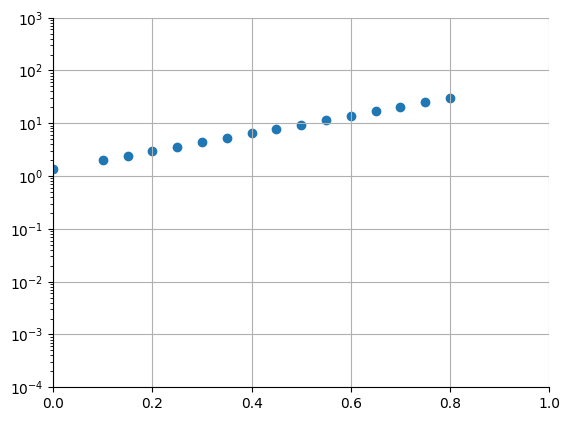

In [4]:
def inp_demott_2003(ss_i):
    inp_demott_2003 = (12.96*(ss_i-0.1))
    #inp_demott_2003 = (1.*2./0.76)* (np.exp(inp_demott_2003))**0.3
    inp_demott_2003 = (1.*2.)* (np.exp(inp_demott_2003))**0.3
    return inp_demott_2003

#ss_i = [-0.25, -0.2, -0.15, -0.1, -0.05, 0., 0.05, 0.1, 0.15, 0.2]
ss_i = [0., 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
#ss_i = [-25., -20., -15., -10., -5., 0., 5., 10., 15., 20.]
ss_i = np.array(ss_i)

plt.scatter(ss_i, inp_demott_2003(ss_i))
plt.yscale('log')
plt.ylim(0.0001, 1000)
plt.xlim(0.,1.0)
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)